# My Movie Database (MMDb)

In [1]:
# Created by: Luís Miranda

## Structure
- Sources
    - Trakt : Track what you watch and when
        - Zenobase : Platform for personal data analysis (extract Trakt data)
    - OMDb : Open Movie Database
    - IMDb : Internet Movie Database 
    
- Merge OMDb data with IMDb data based on Trakt's watched movies history

---

# Hard settings

In [2]:
## Check data before analysis
data_check = False
## Force OMDB request? Get all info
force_request = False

## Export data
export = False
## Export data to pickle file
export_pickle = False

# Imports

In [3]:
# https://stackoverflow.com/questions/66920753/running-a-justpy-web-app-on-jupyter-returns-runtimeerror
import nest_asyncio
nest_asyncio.apply()

import os
import time

# Import functions
#https://stackoverflow.com/questions/20186344/ipynb-import-another-ipynb-file
%run MMDb_functions.ipynb

In [4]:
path = os.getcwd()
src_path = path + '\\Desktop\\Data Analysis\\'

## Load Files

### Pickle

In [5]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure. 
# “Pickling” is the process whereby a Python object hierarchy is converted into a byte stream, and “unpickling” is the inverse operation, 
# whereby a byte stream (from a binary file or bytes-like object) is converted back into an object hierarchy.
pkl_file = 'movies.pkl'
pkl_path = src_path+pkl_file

try:
    foo = pickle.load(open(pkl_path, "rb"))
except (OSError, IOError) as e:
    foo = 3
    pickle.dump(foo, open(pkl_path, "wb"))
    
if type(foo) == pd.core.frame.DataFrame:
    foo = foo.reset_index(drop=True)
    foo.info()
else:
    print('No pickle')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Title       721 non-null    object        
 1   Year        721 non-null    object        
 2   Rated       721 non-null    object        
 3   Released    721 non-null    object        
 4   Runtime     721 non-null    int32         
 5   Genre       721 non-null    object        
 6   Director    721 non-null    object        
 7   Writer      721 non-null    object        
 8   Actors      721 non-null    object        
 9   Plot        721 non-null    object        
 10  Language    721 non-null    object        
 11  Country     721 non-null    object        
 12  Awards      721 non-null    object        
 13  Poster      721 non-null    object        
 14  Ratings     721 non-null    object        
 15  Metascore   721 non-null    object        
 16  imdbRating  718 non-null  

### Trakt

In [6]:
# Future change to pytrakt
# https://pytrakt.readthedocs.io/en/latest/getstarted.html

In [7]:
# Initialize Trakt class and import trakt file
trakt = Trakt()
trkt_file_import = 'trakt.json'
trkt_path_import = src_path+trkt_file_import
df_trakt = trakt.load(trkt_path_import)

# Clean trakt df
df_trakt = trakt.convert_columns(df_trakt)
df_trakt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   title      730 non-null    object        
 1   tag        730 non-null    object        
 2   timestamp  730 non-null    datetime64[ns]
 3   duration   730 non-null    int32         
 4   year       730 non-null    object        
dtypes: datetime64[ns](1), int32(1), object(3)
memory usage: 25.8+ KB


In [8]:
# Last movies added
df_trakt.tail()

title                              tag           timestamp  \
725             Amadeus   [movie, drama, history, music] 2022-02-06 23:09:53   
726           Swan Song  [movie, drama, science-fiction] 2022-02-07 23:16:14   
727        King Richard          [movie, drama, history] 2022-02-08 23:32:50   
728                Flee  [movie, animation, documentary] 2022-02-09 22:23:53   
729  Last and First Men  [movie, science-fiction, drama] 2022-02-09 23:44:28   

     duration  year  
725       160  1984  
726       116  2021  
727       145  2021  
728        89  2021  
729        72  2020

In [9]:
# Duplicated movies in the dataset (rewatched movies within date range)
df_trakt[df_trakt.duplicated(['title','year'], keep=False)]

title                                                tag  \
19   Jojo Rabbit                        [movie, comedy, war, drama]   
517  Jojo Rabbit                        [movie, comedy, war, drama]   
572         Dune  [movie, science-fiction, adventure, drama, act...   
573         Dune  [movie, science-fiction, adventure, drama, act...   
579     The Trip          [movie, action, comedy, thriller, horror]   
587     The Trip          [movie, action, comedy, thriller, horror]   

              timestamp  duration  year  
19  2020-02-10 23:45:44       108  2019  
517 2021-09-05 17:42:27       108  2019  
572 2021-10-23 20:11:00       155  2021  
573 2021-10-24 23:06:41       155  2021  
579 2021-10-26 23:26:31       113  2021  
587 2021-11-01 22:41:58       113  2021

### IMDb

In [10]:
# Initialize IMDB class and import imdb file
imdb = IMDB()
imdb_file = 'imdb.txt'
imdb_path = src_path+imdb_file
df_imdb = imdb.load(imdb_path)

# Clean imdb df
df_imdb = imdb.convert_columns(df_imdb)
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   og                    726 non-null    object 
 1   title                 726 non-null    object 
 2   year                  726 non-null    int32  
 3   imdbID                726 non-null    object 
 4   runtimes              726 non-null    int32  
 5   genres                726 non-null    object 
 6   director              726 non-null    object 
 7   writer                726 non-null    object 
 8   cinematographers      726 non-null    object 
 9   cast                  726 non-null    object 
 10  countries             726 non-null    object 
 11  languages             726 non-null    object 
 12  rating                726 non-null    float64
 13  votes                 726 non-null    int32  
 14  plot outline          614 non-null    object 
 15  production companies  7

In [11]:
# Last addition to the dataset
df_imdb.tail(1)

og    title  year imdbID  runtimes                   genres  \
725  Amadeus  Amadeus  1984  86879       160  Biography, Drama, Music   

         director                        writer cinematographers  \
725  Milos Forman  Zdenek Mahler, Peter Shaffer              N/A   

                                                  cast              countries  \
725  F. Murray Abraham, Tom Hulce, Elizabeth Berrid...  United States, France   

                           languages  rating   votes  \
725  English, Italian, Latin, German     8.3  389221   

                                          plot outline  \
725  Antonio Salieri believes that Wolfgang Amadeus...   

              production companies  
725  AMLF, The Saul Zaentz Company

# New movies watched?

In [12]:
# Difference between lists (trakt vs imdb)
# Check if new movies were added movies (trakt vs imdb)
add_movies = imdb.add_movies(df_trakt, df_imdb)

list_to_add = imdb.request_df(add_movies)
df_add_movies = imdb.clean_df(list_to_add)
df_add_movies = imdb.convert_columns(df_add_movies)

# Add original movie titles
df_add_movies['og'] = add_movies

In [13]:
# Add new movies to imdb df
df_imdb = df_imdb.append(df_add_movies, ignore_index = True)
df_imdb.tail()

og               title  year    imdbID  runtimes  \
725                    Amadeus             Amadeus  1984     86879       160   
726           Swan Song (2021)           Swan Song  2021  13207508       112   
727        King Richard (2021)        King Richard  2021   9620288       144   
728                Flee (2021)                Flee  2021   8430054        89   
729  Last and First Men (2020)  Last and First Men  2020   8015444        70   

                            genres               director  \
725        Biography, Drama, Music           Milos Forman   
726         Drama, Romance, Sci-Fi        Benjamin Cleary   
727        Biography, Drama, Sport  Reinaldo Marcus Green   
728  Documentary, Animation, Drama  Jonas Poher Rasmussen   
729       Fantasy, Mystery, Sci-Fi      Jóhann Jóhannsson   

                                                writer cinematographers  \
725                       Zdenek Mahler, Peter Shaffer              N/A   
726                                    Benjamin Cleary              N/A   
727                                        Zach Baylin              N/A   
728                 Amin Nawabi, Jonas Poher Rasmussen              N/A   
729  José Enrique Macián, Jóhann Jóhannsson, Olaf S...              N/A   

                                                  cast  \
725  F. Murray Abraham, Tom Hulce, Elizabeth Berrid...   
726  Mahershala Ali, Naomie Harris, Awkwafina, Glen...   
727  Will Smith, Aunjanue Ellis, Jon Bernthal, Sani...   
728  Daniel Karimyar, Fardin Mijdzadeh, Milad Eskan...   
729                                      Tilda Swinton   

                                             countries  \
725                              United States, France   
726                                      United States   
727                                      United States   
728  Denmark, Sweden, Norway, France, United States...   
729                                            Iceland   

                                   languages  rating   votes  \
725          English, Italian, Latin, German     8.3  389221   
726                                  English     6.8   10245   
727                                  English     7.6   45408   
728  Danish, English, Dari, Russian, Swedish     8.1    3941   
729                                  English     6.7    2773   

                                          plot outline  \
725  Antonio Salieri believes that Wolfgang Amadeus...   
726  Set in the near future, "Swan Song" is a power...   
727  Richard Williams is determined to write his tw...   
728  An animated documentary telling the true story...   
729                                                N/A   

                                  production companies  
725                      AMLF, The Saul Zaentz Company  
726  Anonymous Content, Apple, Concordia Studio, Kn...  
727  Warner Bros., Star Thrower Entertainment, West...  
728  Final Cut for Real, Sun Creature Studio, Vivem...  
729              Zik Zak Filmworks, Zik Zak Kvikmyndir

In [14]:
# Check if size is different (new movies watched)
# last exported file size (new json file from zenobase)
data = []
newMovies = 0

data, newMovies = check_new_movies(foo, df_trakt)

if force_request == True:
    print('Forcing request...')    
    ## Select data to search in OMDb
    data = df_trakt[['title','year']]
else:
    print('New Movies: ', newMovies) # trakt vs pickle

New Movies:  9


## Select which movies to query

In [15]:
# New movies
if newMovies != 0 :
    df_new = df_trakt.sort_values(by='timestamp').tail(newMovies)
    show_all(df_new)
else:
    pass

# Connect with OMDb

In [16]:
# Initialize OMDB class
omdb = OMDB()

# request OMDB API
movies = []
index = 0

if newMovies != 0 and force_request == False:
    movies = omdb.request_db(df_new)
    index = df_new.set_index('index').index.values
    df_trakt.iloc[index]['timestamp']
    
elif type(foo) != pd.core.frame.DataFrame or force_request == True: # no pickle saved OR force db request (all movies)
    movies = omdb.request_db(data)
else:
    print('Leave OMDB alone!')
    pass

In [17]:
## Copy foo if pickle exists and there's no new movies
df_saved = look_iama_pickle(foo, df_trakt, movies, newMovies, index, force_request)

# Get all columns
all_cols = df_saved.columns

df_saved.reset_index(drop=True, inplace=True)     
df_saved.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Title       730 non-null    object        
 1   Year        730 non-null    object        
 2   Rated       730 non-null    object        
 3   Released    730 non-null    object        
 4   Runtime     730 non-null    object        
 5   Genre       730 non-null    object        
 6   Director    730 non-null    object        
 7   Writer      730 non-null    object        
 8   Actors      730 non-null    object        
 9   Plot        730 non-null    object        
 10  Language    730 non-null    object        
 11  Country     730 non-null    object        
 12  Awards      730 non-null    object        
 13  Poster      730 non-null    object        
 14  Ratings     730 non-null    object        
 15  Metascore   730 non-null    object        
 16  imdbRating  727 non-null  

## Check for errors

In [18]:
# Bad movie info
if 'Error' in df_saved.columns:
    print('Errors: ', len(df_saved[df_saved.Error.notnull()]))
    
    # analyze query errors
    errorlist= df_saved[~df_saved.Error.isna()].index
    show_all(df_trakt.iloc[errorlist])
else:
    pass

## Select data

In [19]:
# Filter columns for view
view_cols = ['Title','Year','Runtime','Genre','Director','Actors',
             'Plot','Language','Metascore','imdbRating','Timestamp']

# Force organize by date watched
df_last = df_saved.loc[:, view_cols]

# Check last entries
N = 10
if newMovies < N:
    show_all(df_last.drop('Plot', axis=1).tail(N))
else:
    show_all(df_last.drop('Plot', axis=1).tail(newMovies))

---

### Correct entry in pickle file

In [20]:
## If no foo (brand new pickle)
if type(foo) == int:
## single movie request
# there are two different Dune movies (1984 & 2021)
# this corrects the entries
    title = "Dune" 
    idd = 'tt1160419'
    
    params = {
        't':title,
        'type':'movie',
        #'y': 2021 #syear
        #'i':idd
    }
    
    responseTest = requests.get(data_URL, params=params).json()
    
    add_ = pd.DataFrame(responseTest)
    add_ = add_.head(1)[all_cols[:-3]]
    
    # indexes to be corrected (new Dune movie)
    df_saved.loc[572:573, all_cols[:-3]] = add_.values
    df_saved.loc[572:573, all_cols[:-3]]

In [21]:
# To correct a particular entry
to_correct = False
if to_correct:
    title2change = '14 Peaks: Nothing Is Impossible'
    id2change = 'tt14079374'    
    
    # pair og title and id of movie to change
    pair2change = [title2change, id2change] 
    
    df_saved = correct_pickle(df_saved, all_cols, pair2change)    
else:
    pass

In [22]:
## Pre check all data
#cols = ['Title','Year','Runtime','Genre','Director','Actors','Plot','Date']
#show_all(df_saved[cols].sort_values('Date', ascending=False))

## Clean df_saved

In [23]:
## Retranslate titles - change back movie names for analysis
# original titles : translated titles
# https://stackoverflow.com/questions/62429677/how-to-use-str-replace-to-replace-multiple-pairs-at-once
df_saved = omdb.retranslate_titles(df_saved)

## Clean dataframe
df_saved= omdb.convert_columns(df_saved)

## Drop duplicates just in case - such as Jojo Rabbit and Dune
df_saved.drop_duplicates(['Title','Year','Date'], keep='first', inplace=True)
df_saved.tail();

In [24]:
# Copy df_saved to df_omdb
df_omdb = df_saved.copy()
df_omdb.shape

(730, 28)

---

# Merge Datasets (OMDb & IMDb)

In [25]:
# different title names between dbs
dif_titles = list(set(df_imdb.title) - set(df_omdb.Title))

if dif_titles != []:
    df_dif_titles = df_imdb[df_imdb.title.str.contains('|'.join(dif_titles))]
    show_all(df_dif_titles)
else:
    print('Nothing to report.')

Nothing to report.


In [26]:
# OMDb
df_omdb.tail(3)

Title  Year  Rated     Released  Runtime  \
727        King Richard  2021  PG-13  19 Nov 2021      144   
728                Flee  2021  PG-13  17 Jun 2021       89   
729  Last and First Men  2020    N/A  21 Sep 2020       70   

                        Genre               Director  \
727   Biography, Drama, Sport  Reinaldo Marcus Green   
728    Documentary, Animation  Jonas Poher Rasmussen   
729  Fantasy, Mystery, Sci-Fi      Jóhann Jóhannsson   

                                                Writer  \
727                                        Zach Baylin   
728                 Amin Nawabi, Jonas Poher Rasmussen   
729  Olaf Stapledon, Jóhann Jóhannsson, José Enriqu...   

                                                Actors  \
727           Will Smith, Aunjanue Ellis, Jon Bernthal   
728  Daniel Karimyar, Fardin Mijdzadeh, Milad Eskan...   
729                                      Tilda Swinton   

                                                  Plot  ...   imdbID   Type  \
727  A look at how tennis superstars Venus and Sere...  ...  9620288  movie   
728  FLEE tells the extraordinary true story of a m...  ...  8430054  movie   
729  Two billion years ahead of us, a future race o...  ...  8015444  movie   

             DVD    BoxOffice Production  Website  Response  \
727  19 Nov 2021  $14,849,075        N/A      N/A      True   
728          N/A     $100,094        N/A      N/A      True   
729          N/A          N/A        N/A      N/A      True   

              Timestamp       Date      Time  
727 2022-02-08 23:32:50 2022-02-08  23:32:50  
728 2022-02-09 22:23:53 2022-02-09  22:23:53  
729 2022-02-09 23:44:28 2022-02-09  23:44:28  

[3 rows x 28 columns]

In [27]:
# IMDb
df_imdb.tail(3)

og               title  year   imdbID  runtimes  \
727        King Richard (2021)        King Richard  2021  9620288       144   
728                Flee (2021)                Flee  2021  8430054        89   
729  Last and First Men (2020)  Last and First Men  2020  8015444        70   

                            genres               director  \
727        Biography, Drama, Sport  Reinaldo Marcus Green   
728  Documentary, Animation, Drama  Jonas Poher Rasmussen   
729       Fantasy, Mystery, Sci-Fi      Jóhann Jóhannsson   

                                                writer cinematographers  \
727                                        Zach Baylin              N/A   
728                 Amin Nawabi, Jonas Poher Rasmussen              N/A   
729  José Enrique Macián, Jóhann Jóhannsson, Olaf S...              N/A   

                                                  cast  \
727  Will Smith, Aunjanue Ellis, Jon Bernthal, Sani...   
728  Daniel Karimyar, Fardin Mijdzadeh, Milad Eskan...   
729                                      Tilda Swinton   

                                             countries  \
727                                      United States   
728  Denmark, Sweden, Norway, France, United States...   
729                                            Iceland   

                                   languages  rating  votes  \
727                                  English     7.6  45408   
728  Danish, English, Dari, Russian, Swedish     8.1   3941   
729                                  English     6.7   2773   

                                          plot outline  \
727  Richard Williams is determined to write his tw...   
728  An animated documentary telling the true story...   
729                                                N/A   

                                  production companies  
727  Warner Bros., Star Thrower Entertainment, West...  
728  Final Cut for Real, Sun Creature Studio, Vivem...  
729              Zik Zak Filmworks, Zik Zak Kvikmyndir

## Merging

In [28]:
# Prepare key to merge

# OMDb format imdb id (remove tt from id)
df_omdb['imdbID'] = df_omdb['imdbID'].str.replace(r'tt', '')
# IMDb format imdb id (always get 7 numbers)
df_imdb['imdbID'] = df_imdb['imdbID'].str.zfill(7)

In [29]:
# Merge dataframes on key = 'imdbID'
df_merge = df_omdb.merge(df_imdb, on='imdbID')

# Drop duplicates
df_merge.drop_duplicates(['Title','Year','Date'], keep='first', inplace=True)
df_merge.reset_index(drop=True, inplace=True)

In [30]:
# Select columns
col = ['title','year','Rated','runtimes',
       'genres','director','writer','cinematographers',
       'cast','Plot','languages','countries',
       'Metascore','rating','votes','production companies']

# date/time related columns
col.extend(list(df_omdb.columns[-3:]))
df_merge = df_merge[col]

In [31]:
# List of columns
all_cols = df_saved.columns
all_cols = list(all_cols)

# Delete columns
del all_cols[3] # 'Released'     
del all_cols[11:14] # 'Awards', 'Poster', 'Ratings'
del all_cols[14:18] # 'imdbID', 'Type', 'DVD', 'BoxOffice'

# Rename columns
rename_cols = all_cols[:7]
rename_cols.extend(['Cinematographers'])
rename_cols.extend(all_cols[7:15])
rename_cols.extend(list(df_omdb.columns[-3:]))
df_merge.columns = rename_cols

df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Title             728 non-null    object        
 1   Year              728 non-null    int32         
 2   Rated             728 non-null    object        
 3   Runtime           728 non-null    int32         
 4   Genre             728 non-null    object        
 5   Director          728 non-null    object        
 6   Writer            728 non-null    object        
 7   Cinematographers  728 non-null    object        
 8   Actors            728 non-null    object        
 9   Plot              728 non-null    object        
 10  Language          728 non-null    object        
 11  Country           728 non-null    object        
 12  Metascore         728 non-null    int32         
 13  imdbRating        728 non-null    float64       
 14  imdbVotes         728 non-

In [32]:
# Last data from merged df
df_merge.tail()

Title  Year  Rated  Runtime                          Genre  \
723             Amadeus  1984     PG      160        Biography, Drama, Music   
724           Swan Song  2021      R      112         Drama, Romance, Sci-Fi   
725        King Richard  2021  PG-13      144        Biography, Drama, Sport   
726                Flee  2021  PG-13       89  Documentary, Animation, Drama   
727  Last and First Men  2020    N/A       70       Fantasy, Mystery, Sci-Fi   

                  Director                                             Writer  \
723           Milos Forman                       Zdenek Mahler, Peter Shaffer   
724        Benjamin Cleary                                    Benjamin Cleary   
725  Reinaldo Marcus Green                                        Zach Baylin   
726  Jonas Poher Rasmussen                 Amin Nawabi, Jonas Poher Rasmussen   
727      Jóhann Jóhannsson  José Enrique Macián, Jóhann Jóhannsson, Olaf S...   

    Cinematographers                                             Actors  \
723              N/A  F. Murray Abraham, Tom Hulce, Elizabeth Berrid...   
724              N/A  Mahershala Ali, Naomie Harris, Awkwafina, Glen...   
725              N/A  Will Smith, Aunjanue Ellis, Jon Bernthal, Sani...   
726              N/A  Daniel Karimyar, Fardin Mijdzadeh, Milad Eskan...   
727              N/A                                      Tilda Swinton   

                                                  Plot  \
723  The life, success and troubles of Wolfgang Ama...   
724  In the near future, a terminally ill man explo...   
725  A look at how tennis superstars Venus and Sere...   
726  FLEE tells the extraordinary true story of a m...   
727  Two billion years ahead of us, a future race o...   

                                    Language  \
723          English, Italian, Latin, German   
724                                  English   
725                                  English   
726  Danish, English, Dari, Russian, Swedish   
727                                  English   

                                               Country  Metascore  imdbRating  \
723                              United States, France         88         8.3   
724                                      United States         66         6.8   
725                                      United States         76         7.6   
726  Denmark, Sweden, Norway, France, United States...         90         8.1   
727                                            Iceland         80         6.7   

     imdbVotes                                         Production  \
723     389221                      AMLF, The Saul Zaentz Company   
724      10245  Anonymous Content, Apple, Concordia Studio, Kn...   
725      45408  Warner Bros., Star Thrower Entertainment, West...   
726       3941  Final Cut for Real, Sun Creature Studio, Vivem...   
727       2773              Zik Zak Filmworks, Zik Zak Kvikmyndir   

              Timestamp       Date      Time  
723 2022-02-06 23:09:53 2022-02-06  23:09:53  
724 2022-02-07 23:16:14 2022-02-07  23:16:14  
725 2022-02-08 23:32:50 2022-02-08  23:32:50  
726 2022-02-09 22:23:53 2022-02-09  22:23:53  
727 2022-02-09 23:44:28 2022-02-09  23:44:28

In [33]:
# Work with this df
df = df_merge.copy()

---

In [34]:
if data_check:
    input("Press Enter to continue...")
else:
    pass

---

# Export data

In [35]:
# Setup to export OMDb data (and therefore import - pickle file) and IMDb data
if export: 
    ## Export trakt file
    trkt_file_export = 'trakt.txt'
    trkt_path_export = src_path + trkt_file_export
    
    if newMovies != 0:
        df_omdb.to_csv(trkt_path_export, encoding='utf-8', mode='a', header=False, index=False)    
    else:
        df_omdb.to_csv(trkt_path_export, encoding='utf-8', index=False)
               
    ## Export pickle
    if export_pickle:
        df_omdb.to_pickle(pkl_path)
        
    ## Export imdb file
    imdb_file_export = 'imdb.txt'
    imdb_path_export = src_path + imdb_file_export    
    
    df_imdb['og'] = df_trakt.sort_values('timestamp', ignore_index=True)['title']
    df_imdb.to_csv(imdb_path_export, encoding='utf-8', index=False)       
else:
    pass

---

# Analysis

In [36]:
# Set plot style
plt.style.use('fivethirtyeight')

In [37]:
# Check if there's movies with no rating in the dataset
df[df.imdbRating.isnull()]

Empty DataFrame
Columns: [Title, Year, Rated, Runtime, Genre, Director, Writer, Cinematographers, Actors, Plot, Language, Country, Metascore, imdbRating, imdbVotes, Production, Timestamp, Date, Time]
Index: []

In [38]:
# Work with top 10
N = 10

In [39]:
# Any shorts?
short_cols = ['Title','Year','Runtime','Genre']

# Movies with less than 60 minute still in the dataset
show_all(df[df.Runtime < 60].sort_values(by=['Runtime'])[short_cols])

# Remove genre='short' movies from the df
shorts = df[df['Genre'].str.contains("Short")]

print('There are ' + str(len(shorts)) + ' shorts in the dataset.')
#show_all(df[df['Genre'].str.contains("Short")][short_cols])
df = df[~df['Genre'].str.contains("Short")]

There are 9 shorts in the dataset.


In [40]:
# Show df after filtering
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719 entries, 0 to 727
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Title             719 non-null    object        
 1   Year              719 non-null    int32         
 2   Rated             719 non-null    object        
 3   Runtime           719 non-null    int32         
 4   Genre             719 non-null    object        
 5   Director          719 non-null    object        
 6   Writer            719 non-null    object        
 7   Cinematographers  719 non-null    object        
 8   Actors            719 non-null    object        
 9   Plot              719 non-null    object        
 10  Language          719 non-null    object        
 11  Country           719 non-null    object        
 12  Metascore         719 non-null    int32         
 13  imdbRating        719 non-null    float64       
 14  imdbVotes         719 non-

In [41]:
# Describe df (only object columns)
df[df.columns.difference(['Title', 'Actors', 'Plot', 'imdbID'])].describe(include=['object'])

Cinematographers        Country     Director  Genre Language  \
count               719            719          719    719      719   
unique              503            192          552    304      212   
top                 N/A  United States  David Lynch  Drama  English   
freq                 32            286           10     51      341   

       Production Rated      Time Writer  
count         719   719       719    719  
unique        700    16       698    640  
top           N/A     R  23:36:59    N/A  
freq            7   331         3     21

In [42]:
# Rows with 'N/A' entries
df[df.apply(lambda row: row.astype(str).str.contains('N/A').any(), axis=1)].shape[0]

96

## Show entire DataFrame

In [43]:
#####
data_check = False
if data_check:
    cols = ['Title','Year','Runtime','Genre','Director','Actors','Plot','Date']
    display(HTML(df[cols].sort_values('Date', ascending=False).to_html()))
else:
    pass
#####

---

## Let the games begin... 

In [44]:
# Get actual date
now = pd.Timestamp('now')

# Get list of years (originally from timestamp of date viewed - starts in 2020)
years = list(df.Date.dt.year.unique())
years.sort()

# Retain all info for timestamp analysis
df_all = df.copy()

### All watched

In [45]:
# All by year
df_all_year = df[['Title','Genre','Date']].copy()
df_all_watched = df_all_year.copy()

df_all_watched['Year'] = df_all_watched.Date.dt.year
df_all_watched.drop(columns='Date', inplace=True)

# All 
df_all_watched_year = df_all_watched.groupby(by='Year').count()
# Number of unique and all watched
df_year_uc = df_all_watched.groupby(by='Year').agg({'Title':['nunique','count']})

# Add total row
rowtotal = df_year_uc.sum()
rowtotal.name = 'All'
df_year_uc.append(rowtotal)

Title      
     nunique count
Year              
2020     252   252
2021     403   405
2022      62    62
All      717   719

In [46]:
# Difference of movies watched from previous year
df_all_watched_year.diff().drop('Genre', axis=1).fillna(0).astype(int)

Title
Year       
2020      0
2021    153
2022   -343

In [47]:
# Movies + Documentaries per day in year
[
    [
        movies_per_day(df_all_watched_year, year)
    ] for year in years
];

0.69 movies per day in 2020
1.11 movies per day in 2021
1.51 movies per day in 2022


In [48]:
# Movies & documentaries by month/year
show_all(crosstab_by_year(df))

In [49]:
# Difference of movies & documentaries watched from previous year
crosstab_by_year(df).diff().drop('All').fillna(0).astype(int)

Month           1        2     3     4   5    6    7      8         9      10  \
MonthName January February March April May June July August September October   
DateYear                                                                        
2020            0        0     0     0   0    0    0      0         0       0   
2021           26       21    18    13  -8   -1   15     10        15      17   
2022            9      -25   -33   -34 -32  -27  -24    -29       -31     -38   

Month           11       12  All  
MonthName November December       
DateYear                          
2020             0        0    0  
2021            22        5  153  
2022           -40      -39 -343

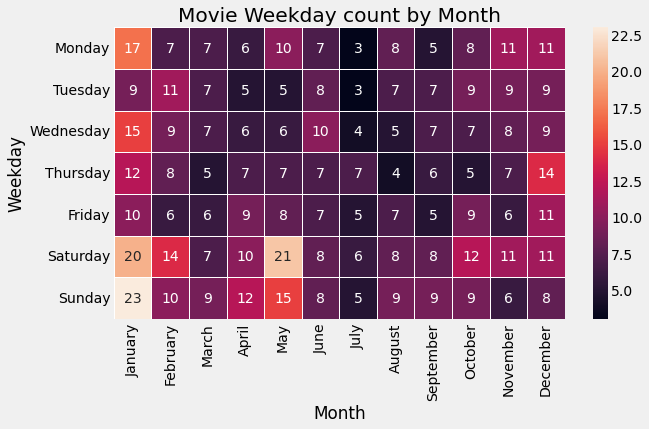

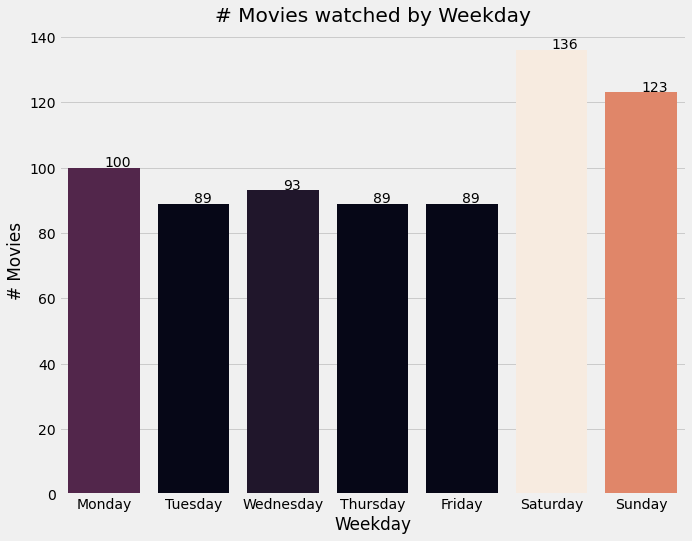

36% of the movies were watched on the weekend!


In [50]:
# Overview
plot_ct_heatmap(df, 'Weekday', None)
plot_weekday_bar(df, None)
plt.show()

ratio_weekend(df, None)

#### Movies only

In [51]:
# Movies (only) by year
df_movies_year, df_show_movies = totals_by_year(df_all_year, docs=False)
df_show_movies

Title      
     nunique count
Year              
2020     232   232
2021     383   385
2022      57    57

In [52]:
# Difference from previous year of movies watched
df_movies_year.diff().drop('Genre', axis=1).fillna(0).astype(int)

Title
Year       
2020      0
2021    153
2022   -328

#### Documentaries only

In [53]:
# Documentaries (only) by year
df_docs_year, df_show_docs = totals_by_year(df_all_year, docs=True)
df_show_docs

Title      
     nunique count
Year              
2020      20    20
2021      20    20
2022       5     5

In [54]:
# Difference from previous year of documentaries watched
df_docs_year.diff().drop('Genre', axis=1).fillna(0).astype(int)

Title
Year       
2020      0
2021      0
2022    -15

### By Year 

In [55]:
# Setup timestamp here - to be used later
cols = ['Title','Year','Rated','Genre','Timestamp','Date','Time']
df_timestamp = df_all[cols].copy()
explode_date(df_timestamp)
df_timestamp['Hour'] = df_timestamp.Timestamp.dt.hour
df_timestamp['Minute'] = df_timestamp.Timestamp.dt.minute

# https://stackoverflow.com/questions/62915974/pandas-group-by-time-interval-5min-10min-1day-1year-and-count-amount-of-ent
period = '15Min'
# divide hour into blocks of x minutes
df_timestamp['Period'] = pd.DataFrame(df_timestamp.Timestamp.dt.floor(period)).Timestamp.dt.minute

2020 



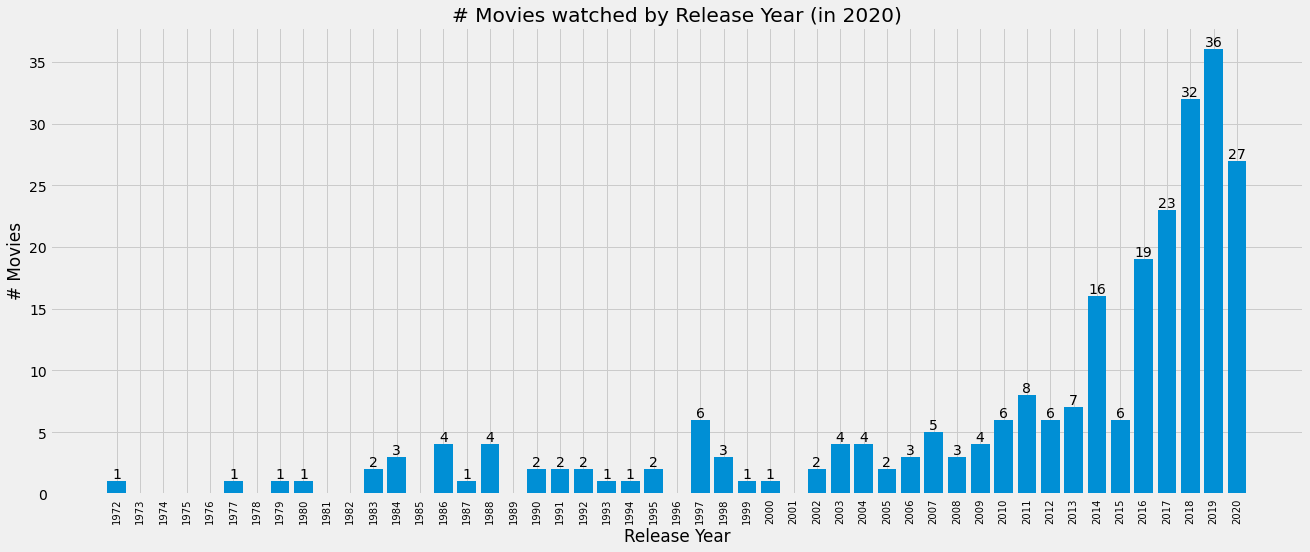

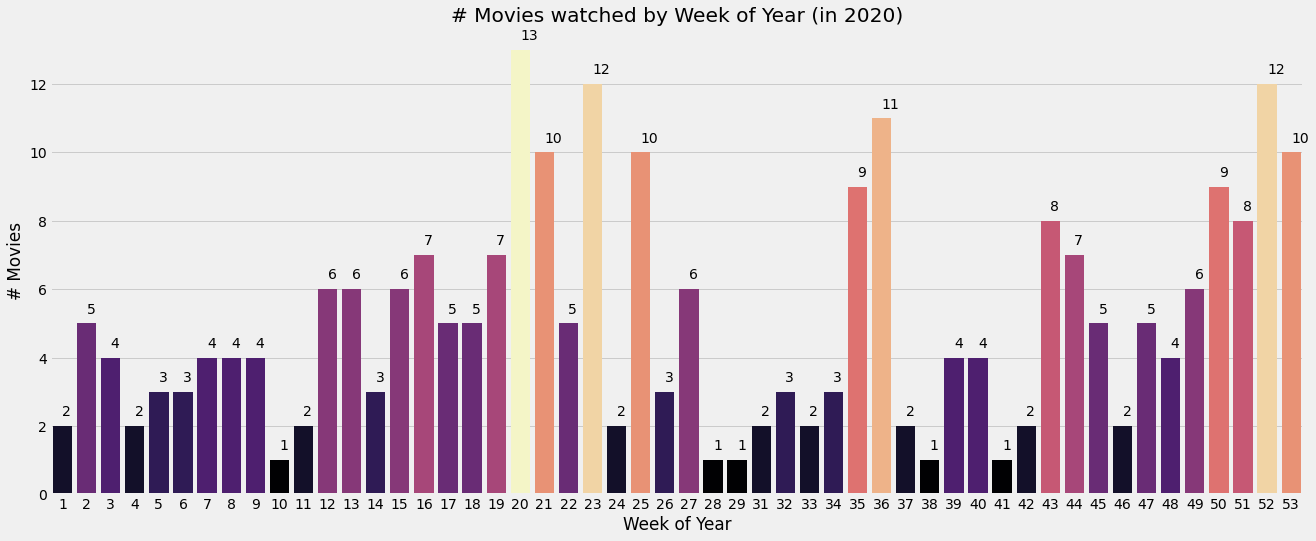

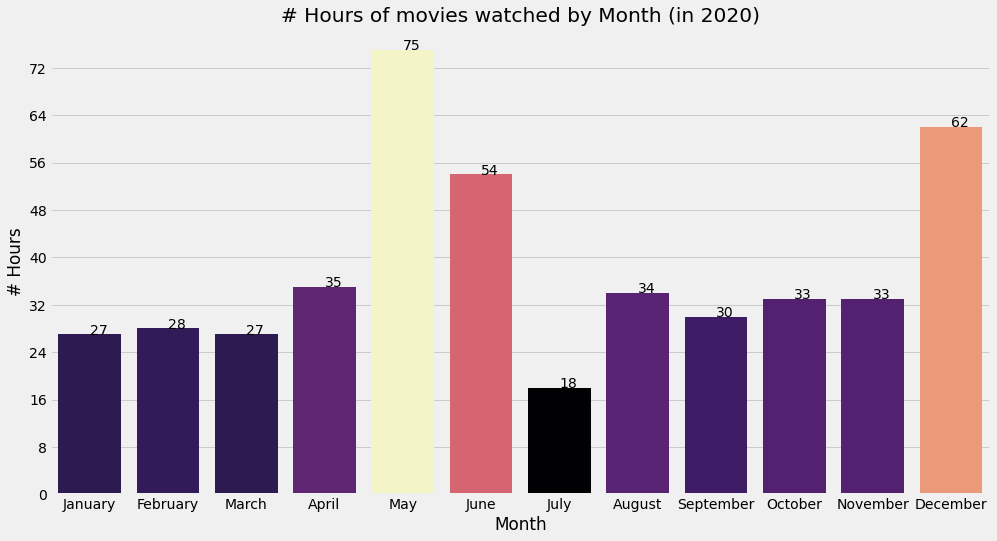

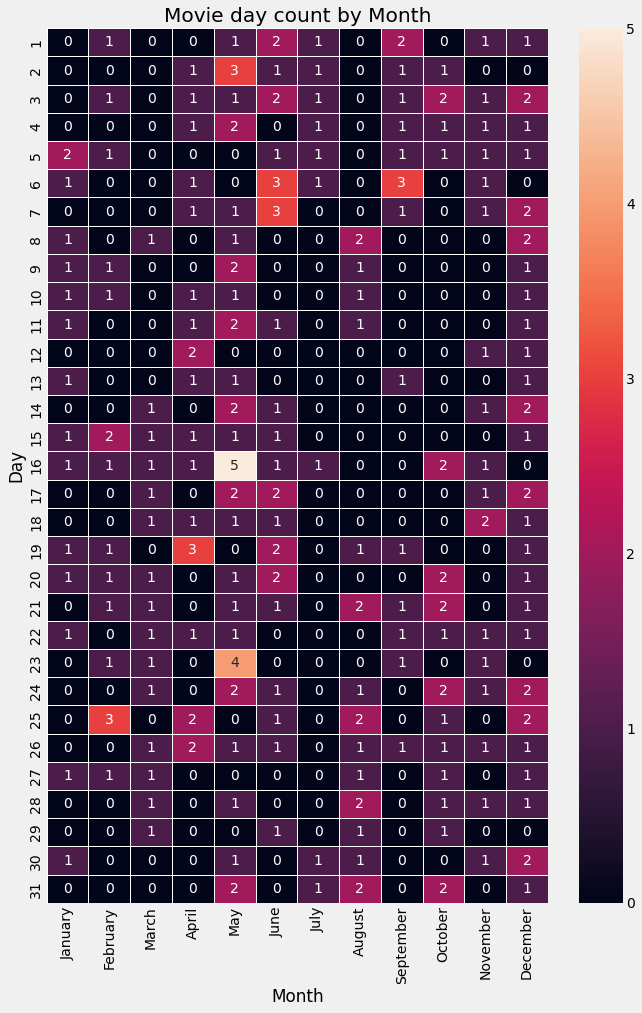

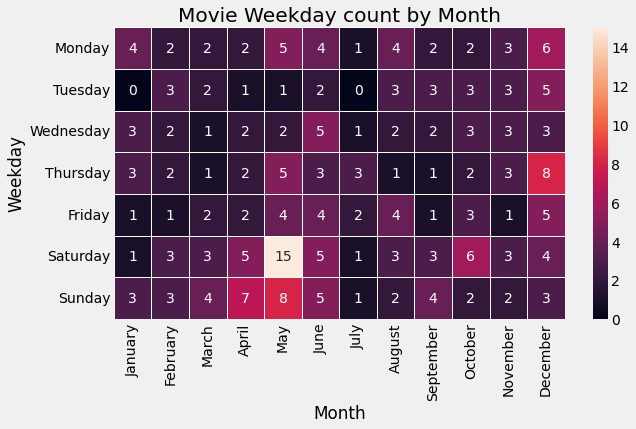

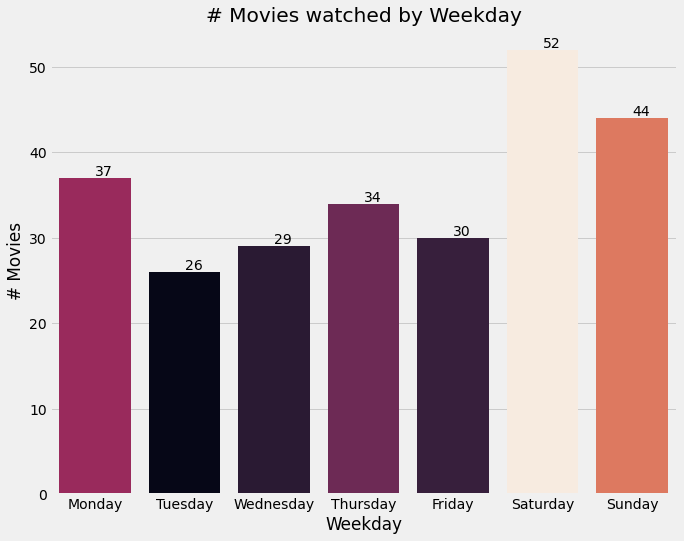

38% of the movies were watched on the weekend!



2021 



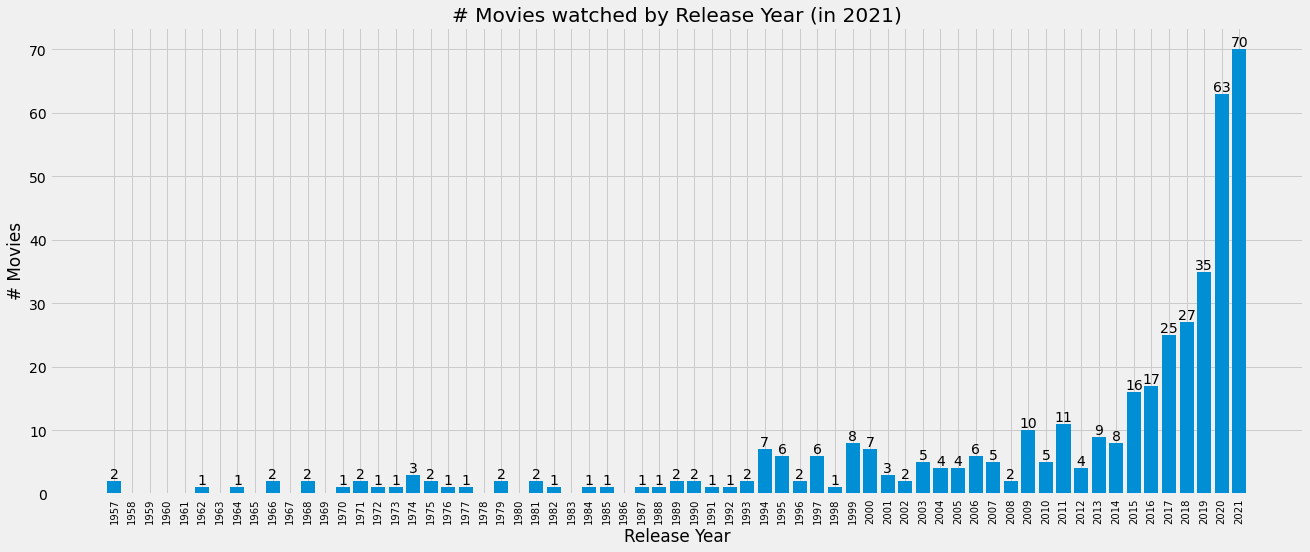

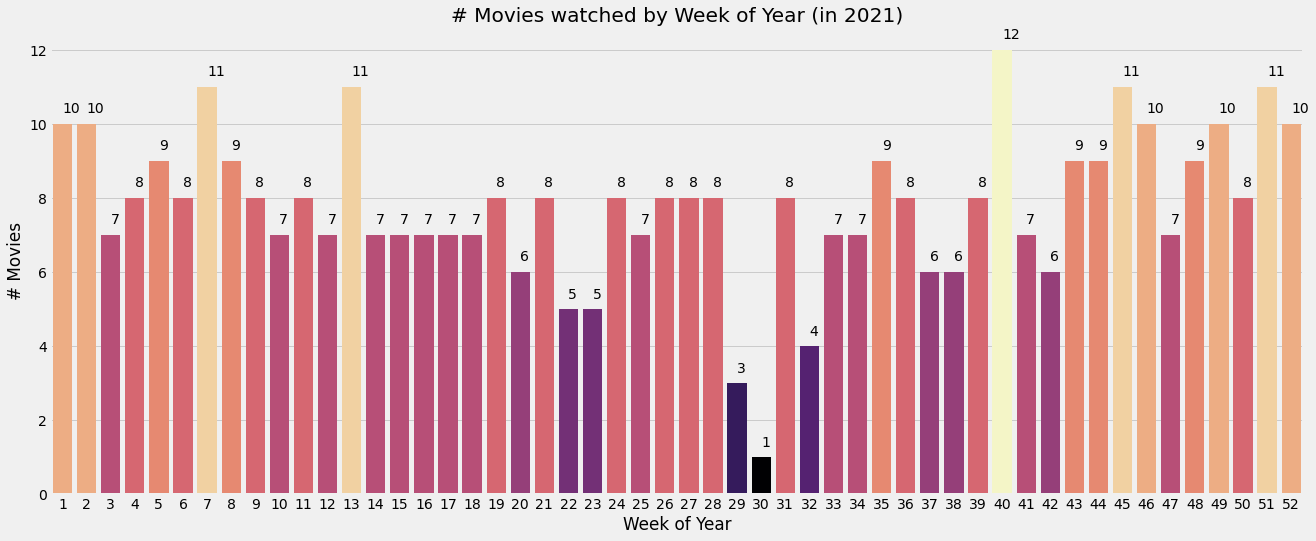

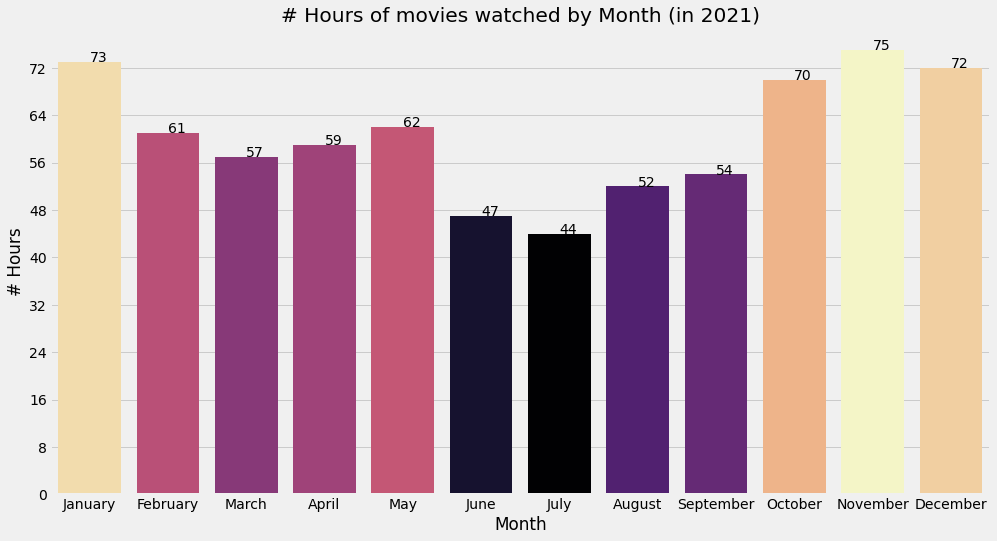

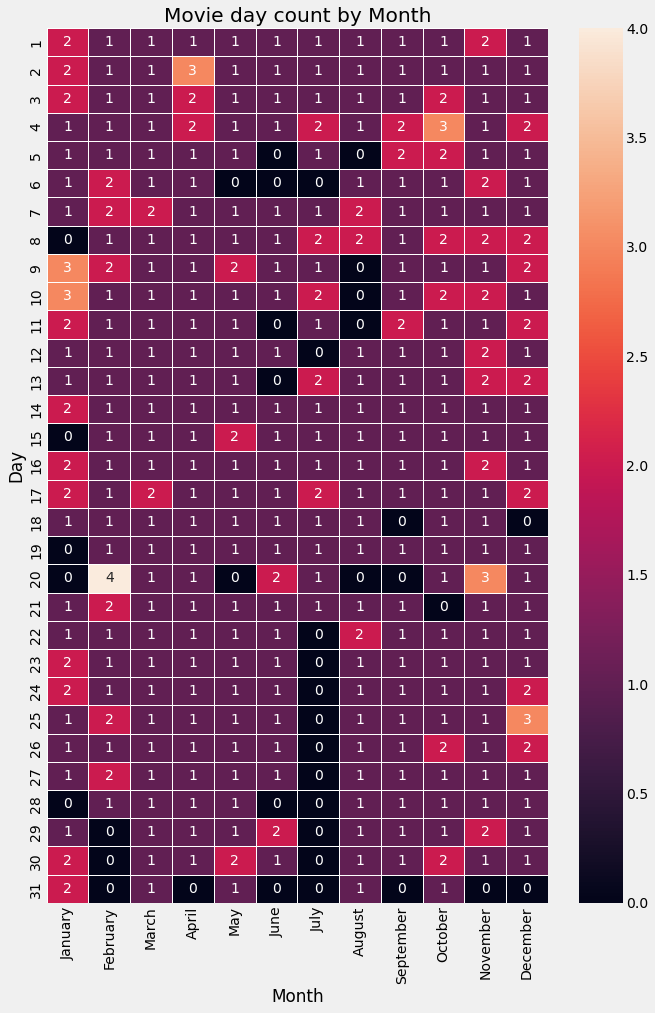

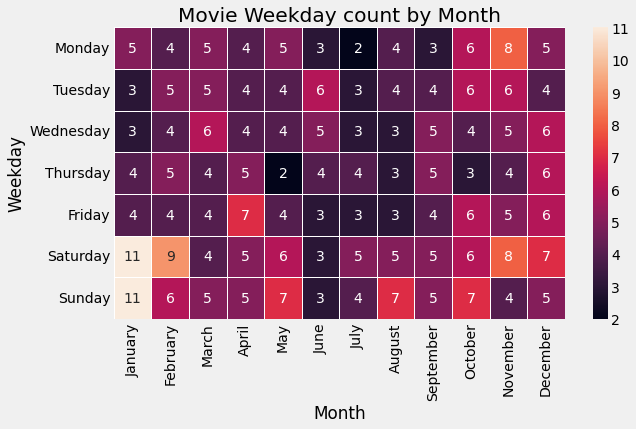

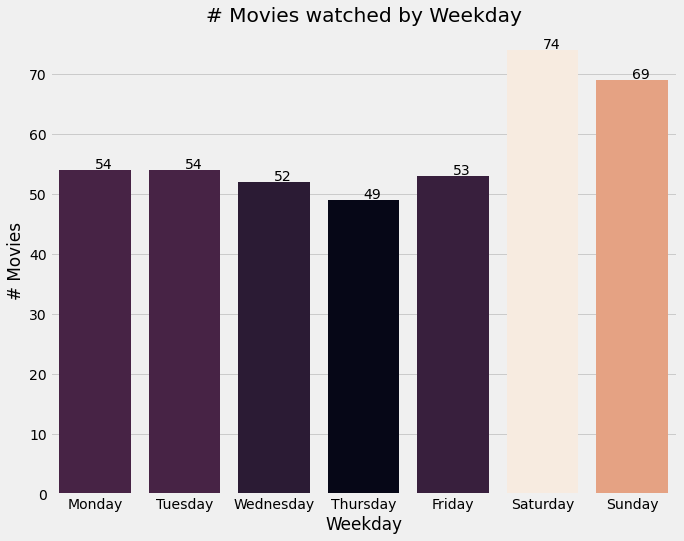

35% of the movies were watched on the weekend!



2022 



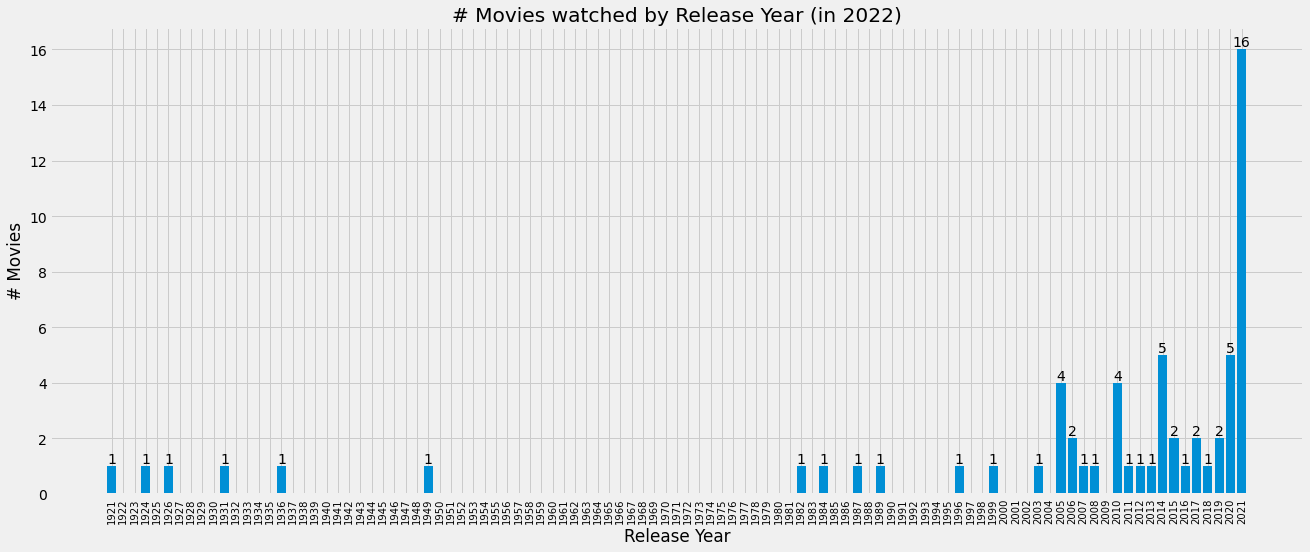

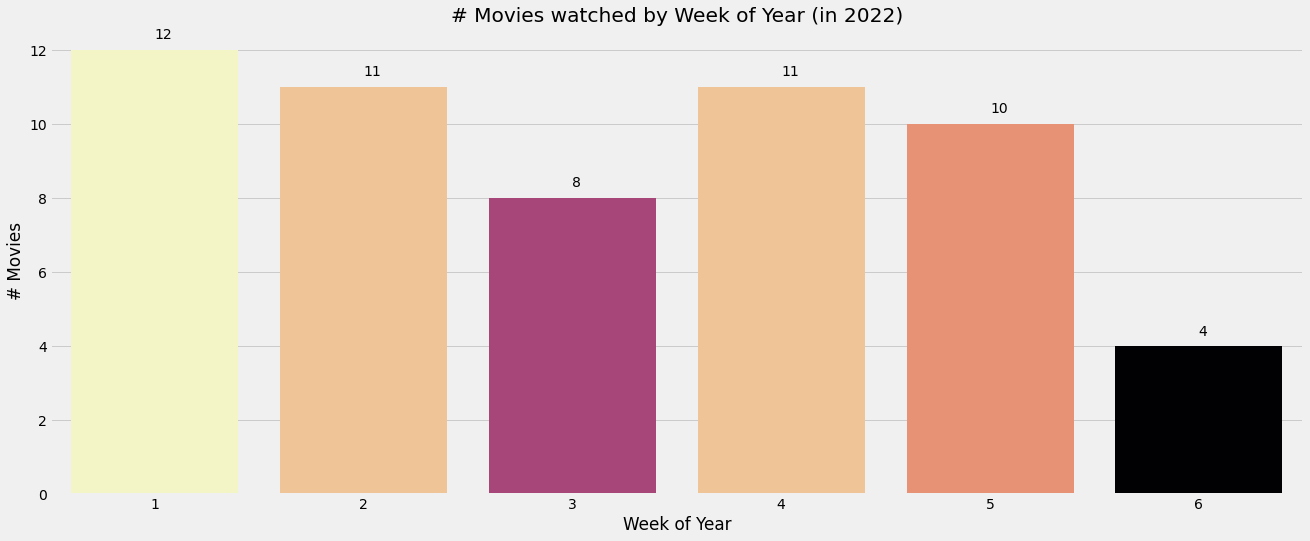

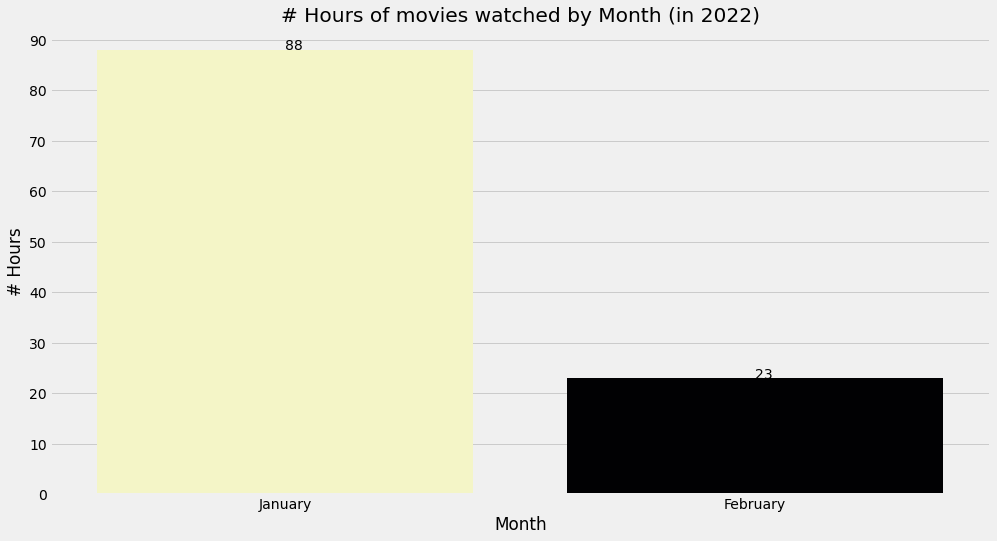

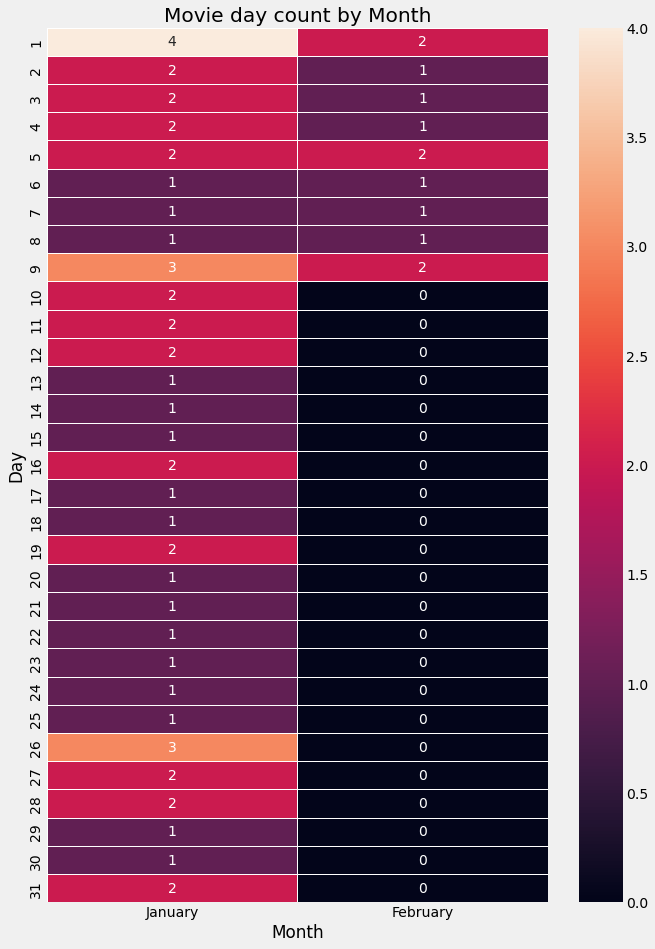

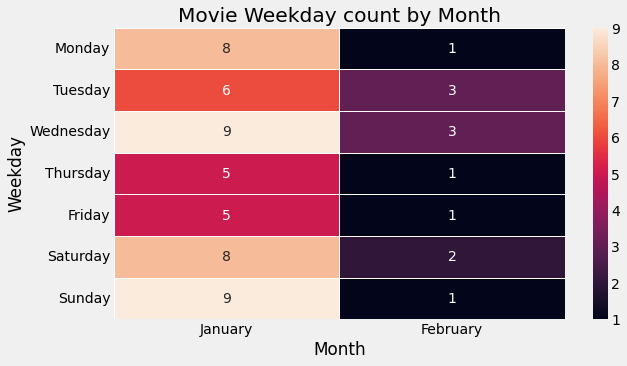

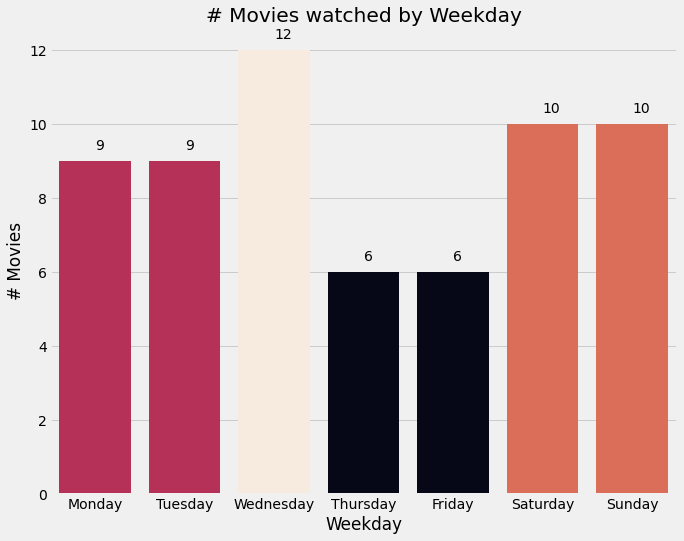

32% of the movies were watched on the weekend!





In [56]:
# Get overview by year (since 2020)
cols = ['Title','Year','Genre','Director','imdbRating','Date']
df_top_movies = df[~df.Genre.str.contains('Documentary')][~df.duplicated(['Title','Year'], keep='first')]

[
    [print(year,'\n'), 
     # remove movies watched more than once for this view
     show_all(df_top_movies[df_top_movies.Date.dt.year == year][cols].nlargest(N, 'imdbRating', keep='all')),
          
     plot_movie_trend(df, year),
     
     plot_week_bar(df, year),
     plot_month_bar(df, year),

     plot_ct_heatmap(df, 'Month', year),
     plot_ct_heatmap(df, 'Weekday', year),
     plot_weekday_bar(df, year), 

     plt.show(),
     ratio_weekend(df, year),
     print('\n\n')] 
    for year in years
];

In [57]:
# Calendar - month days
calendar = pd.DataFrame({'date': pd.date_range('2020-01', now, freq='M')})
calendar['daysinmonths'] = calendar['date'].apply(lambda t: pd.Period(t, freq='S').days_in_month)

print('Days without any movie watched\n')
[
    [
        skip_days(df, calendar, year),
    ] 
    for year in years
];

Days without any movie watched

2020
By month: [17, 16, 16, 14, 7, 11, 22, 17, 17, 16, 13, 5]
Total: 171
46 %


2021
By month: [5, 0, 0, 0, 2, 5, 12, 5, 2, 1, 0, 2]
Total: 34
9 %


2022
By month: [0]
Total: 0
0 %




In [58]:
# Days wiht most movies watched
df_temp = df.copy()
df_date = explode_date(df_temp)
df_date_movies = df_date.groupby('Date').agg({'WeekdayName':'unique', 
                                              'Title':['count',list], 
                                              'Time':list, 
                                              'Runtime':[list,'sum']})

show_all(df_date_movies[df_date_movies['Title']['count'] > 2]) # days with more than 2 movies watched

In [59]:
# Best movies watched (based on imdbRating) by month
cols = ['Year','Month','MonthName','Title','imdbRating','DateYear']
df_movies_by_month = df_date[~df_date.duplicated(['Title','Year'], keep='first')][cols]
df_movies_by_month = df_movies_by_month.groupby(['DateYear','Month','MonthName'], as_index=False)

df_best_movies_by_month = df_movies_by_month.apply(lambda x: x.nlargest(3, 'imdbRating', keep='last'))
df_best_movies_by_month = pd.DataFrame(df_best_movies_by_month.set_index(['DateYear','MonthName','Title'])['imdbRating'])

show_all(df_best_movies_by_month)

In [60]:
# Average movie rating by Month
df_best_month = df_date[~df_date.duplicated(['Title','Year'], keep='first')][cols]

df_best_month = pd.crosstab(index=df_best_month.DateYear, 
                            columns=[df_best_month.Month, df_best_month.MonthName], 
                            values=df_best_month.imdbRating, 
                            aggfunc='mean').round(1)
df_best_month

Month          1        2     3     4    5    6    7      8         9   \
MonthName January February March April  May June July August September   
DateYear                                                                 
2020          7.1      7.6   6.9   7.0  7.1  7.5  7.3    7.4       7.2   
2021          7.0      7.0   6.9   7.2  7.0  7.1  6.9    6.9       7.2   
2022          7.2      7.3   NaN   NaN  NaN  NaN  NaN    NaN       NaN   

Month          10       11       12  
MonthName October November December  
DateYear                             
2020          7.2      7.2      7.1  
2021          7.1      7.4      7.3  
2022          NaN      NaN      NaN

---

## Last watched tendency

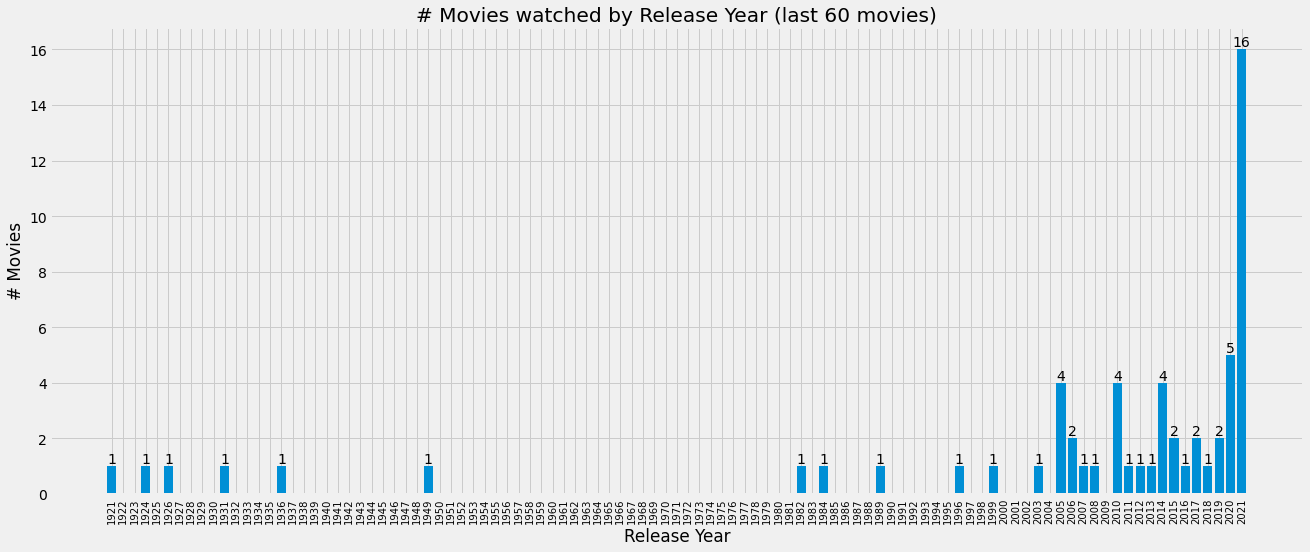

In [61]:
# Movies by Release Year (last watched tendency)
N_last_watched = 60 # trakt shows last 60 movies
df_last_watched = df.tail(N_last_watched)
plot_movies_year = df_last_watched.groupby(by='Year').agg({'Title': 'count'}).reset_index()

x = plot_movies_year.Year
y = plot_movies_year.Title

# https://towardsdatascience.com/how-to-make-bar-and-hbar-charts-with-labels-using-matplotlib-b701ce70ba9c
_, ax = plt.subplots(figsize=(20, 8))
add_ticks_vbarplot(x, y, ax)
plt.title('# Movies watched by Release Year (last ' + str(N_last_watched) + ' movies)')
plt.xlabel('Release Year')
plt.ylabel('# Movies')
plt.show()

In [62]:
# Last movies watched
df.tail(N_last_watched).groupby(['Year','Title']).agg({'imdbRating':'mean'})

imdbRating
Year Title                                         
1921 The Kid                                    8.3
1924 Sherlock Jr.                               8.2
1926 The General                                8.1
1931 City Lights                                8.5
1936 Modern Times                               8.5
1949 The Third Man                              8.1
1982 Koyaanisqatsi                              8.3
1984 Amadeus                                    8.3
1989 Baxter                                     6.9
1996 Hard Eight                                 7.2
1999 Ghost Dog: The Way of the Samurai          7.5
2003 The Dreamers                               7.2
2005 Angel-A                                    7.1
     Broken Flowers                             7.2
     Kingdom of Heaven                          7.2
     Sin City                                   8.0
2006 Half Nelson                                7.2
     Lucky Number Slevin                        7.7
2007 Urban Explorers: Into the Darkness         6.8
2008 Transsiberian                              6.7
2010 13 Assassins                               7.6
     Blue Valentine                             7.3
     Submarine                                  7.3
     Womb                                       6.4
2011 We Need to Talk About Kevin                7.5
2012 Frances Ha                                 7.5
2013 Metalhead                                  7.1
2014 Lost River                                 5.8
     Out of Nature                              6.9
     The Salvation                              6.7
     Transcendence                              6.2
2015 The Martian                                8.0
     The Survivalist                            6.4
2016 The Greasy Strangler                       5.8
2017 Bodied                                     7.1
     Wheelman                                   6.4
2018 The House That Jack Built                  6.8
2019 Dark Waters                                7.6
     First Love                                 6.8
2020 Holler                                     6.2
     Last and First Men                         6.7
     Some Kind of Heaven                        7.2
     The Paper Tigers                           6.4
     Tripping with Nils Frahm                   8.1
2021 Annette                                    6.4
     Benedetta                                  6.7
     Boiling Point                              7.5
     Eternals                                   6.6
     Flee                                       8.1
     Ghostbusters: Afterlife                    7.3
     King Richard                               7.6
     Nightmare Alley                            7.3
     Old Henry                                  7.3
     Prisoners of the Ghostland                 4.2
     Swan Song                                  6.8
     The Harder They Fall                       6.6
     The Innocents                              7.0
     The Man with the Answers                   6.8
     The Tragedy of Macbeth                     7.5
     The Worst Person in the World              8.0

In [63]:
# Any rewatched movie in the previous 60?
df_last_watched[df_last_watched.duplicated('Title', keep=False)]

Empty DataFrame
Columns: [Title, Year, Rated, Runtime, Genre, Director, Writer, Cinematographers, Actors, Plot, Language, Country, Metascore, imdbRating, imdbVotes, Production, Timestamp, Date, Time, DateYear, Month, MonthName, Weekday, WeekdayName, Day]
Index: []

[0 rows x 25 columns]

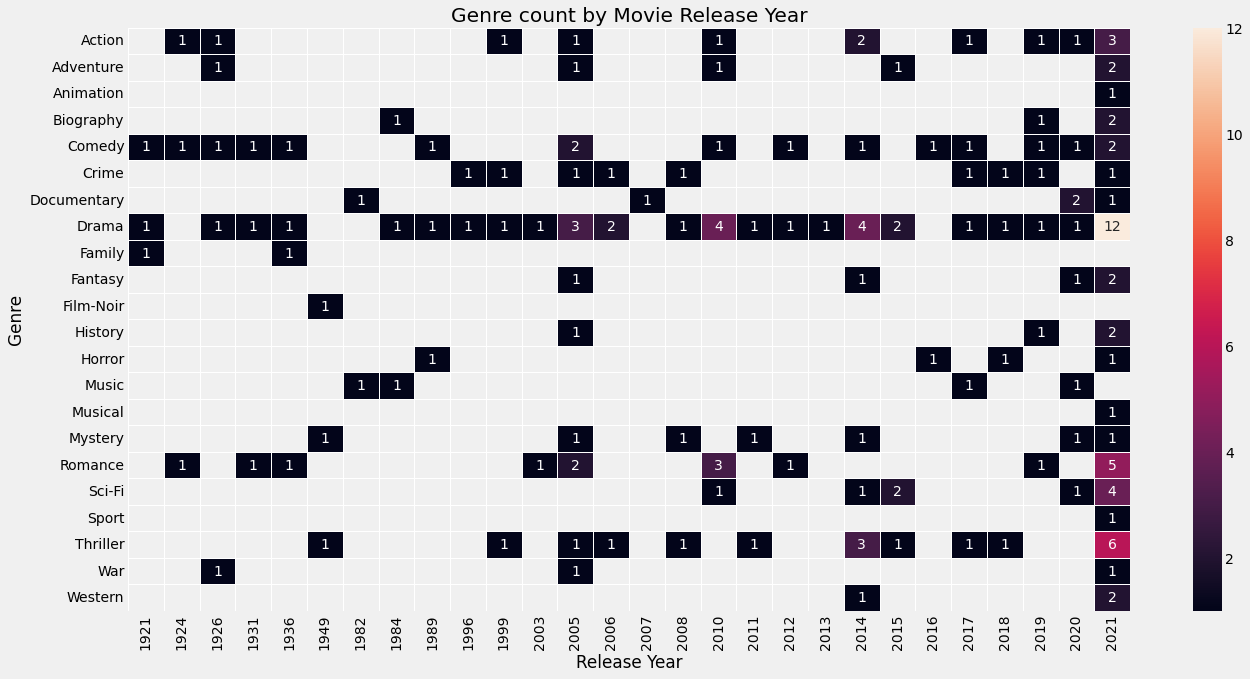

In [64]:
# Movies by Genre per Release Year (last watched tendency)
cols = ['Title','Year','Genre','imdbRating']
df_genre_year = df[cols].copy()
df_genre_year.Genre = df_genre_year.Genre.str.split(',').apply(lambda x: [e.strip() for e in x])

df_plot_genres = df_genre_year.tail(N_last_watched)
plot_last_genres = explode(df_plot_genres, ['Genre'])
plot_last_genres = plot_last_genres.groupby(['Year','Genre']).agg({'Title':'count'}).sort_values(['Year','Title'], ascending=False)
plot_ct_last_genres = plot_last_genres.unstack().T.reset_index().set_index('Genre').drop(['level_0'], axis=1)

# Plot
_, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(plot_ct_last_genres, annot=True, linewidths=.5, ax=ax)
ax.set_xticklabels(plot_ct_last_genres.columns, rotation=90) 

plt.title('Genre count by Movie Release Year')
plt.xlabel('Release Year');

In [65]:
# Movies by Genre (last watched tendency)
df_plot_genres = df_genre_year.tail(N_last_watched)

plot_last_genres = explode(df_plot_genres, ['Genre'])
plot_last_genres = plot_last_genres.groupby(['Genre']).agg({'Title':'count'}).sort_values(['Title'], ascending=False)
plot_last_genres

Title
Genre             
Drama           44
Thriller        18
Comedy          17
Romance         16
Action          13
Sci-Fi           9
Crime            9
Mystery          7
Adventure        6
Documentary      5
Fantasy          5
Music            4
History          4
Horror           4
Biography        4
War              3
Western          3
Family           2
Musical          1
Film-Noir        1
Sport            1
Animation        1

In [66]:
# Movies by Director (last watched tendency)
gb_last = df.tail(N_last_watched).groupby('Director').agg({'Title':[list,'count'], 'imdbRating':'mean'})
gb_last = gb_last.sort_values([('Title','count'), ('imdbRating','mean')], ascending=False).head(N)
gb_last[('imdbRating','mean')] = gb_last[('imdbRating','mean')].round(1)

show_all(gb_last)

In [67]:
## Last watched movies timestamp
df_last_ts = df_timestamp.tail(N_last_watched).copy()
ct_last_ts_hour = pd.crosstab([df_last_ts.Weekday, df_last_ts.WeekdayName], df_last_ts.Hour)
ct_last_ts_hour = ct_last_ts_hour.droplevel(0)
## if period less than 60 min [df_timestamp.Hour, df_timestamp.Period]

# Crosstab heatmap-like visualization
cm = sns.light_palette("green", as_cmap=True)
ct_last_ts_hour.style.background_gradient(cmap=cm, axis=None)

---

## Timestamp

In [68]:
ct_ts_week_hour = pd.crosstab([df_timestamp.Weekday, df_timestamp.WeekdayName], df_timestamp.Hour)
## if period less than 60 min [df_timestamp.Hour, df_timestamp.Period]
ct_ts_week_hour = ct_ts_week_hour.droplevel(0)

# Crosstab heatmap-like visualization
cm = sns.light_palette("green", as_cmap=True)
ct_ts_week_hour.style.background_gradient(cmap=cm, axis=None)

## Equivalent as above but as a true heatmap visualization
#_, ax = plt.subplots(figsize=(9, 4))
#sns.heatmap(ct_timestamp_hour, annot=True, fmt="d", linewidths=.5, ax=ax);
#ax.set_yticklabels(ax.get_yticklabels(), rotation=0);

In [69]:
ct_ts_month_hour = pd.crosstab([df_timestamp.Month, df_timestamp.MonthName], df_timestamp.Hour)
## if period less than 60 min [df_timestamp.Hour, df_timestamp.Period]
ct_ts_month_hour = ct_ts_month_hour.droplevel(0)

# Crosstab heatmap-like visualization
cm = sns.light_palette("green", as_cmap=True)
ct_ts_month_hour.style.background_gradient(cmap=cm, axis=1)

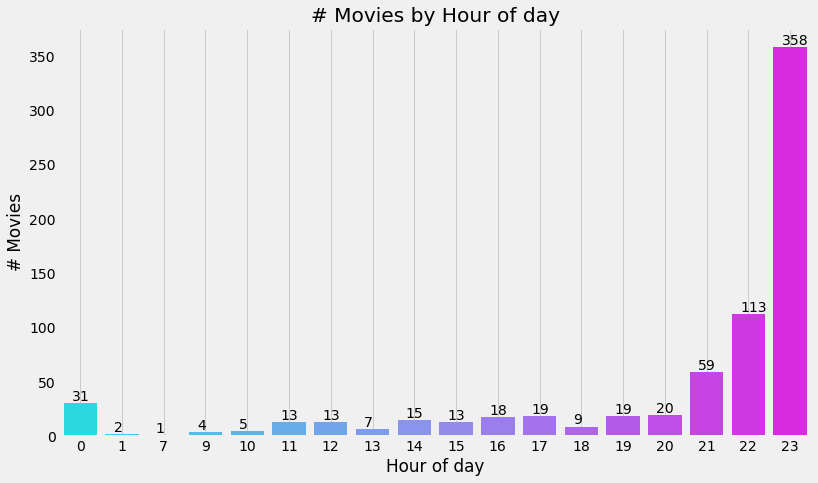

In [70]:
# Movies watched by hour of day (0-24)
plot_hour_day = df_timestamp.groupby('Hour').agg({'Title':'count'}).reset_index()

plt.figure(figsize=(12,7))
sns.barplot('Hour', 'Title', data=plot_hour_day, palette='cool', orient='v');
plt.grid()

plt.xlabel('Hour of day')
plt.ylabel('# Movies')
plt.title('# Movies by Hour of day')

for i, rate in enumerate(plot_hour_day["Title"]):
    plt.text(i-0.2, rate+2, rate)

2020 



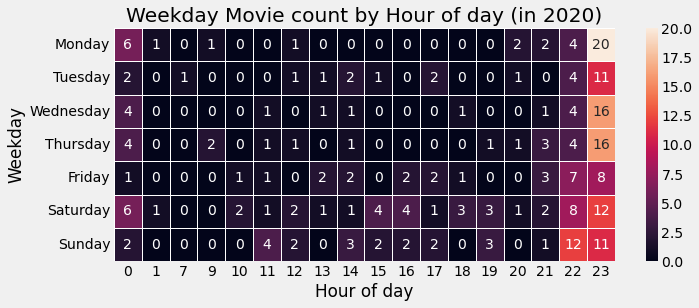



2021 



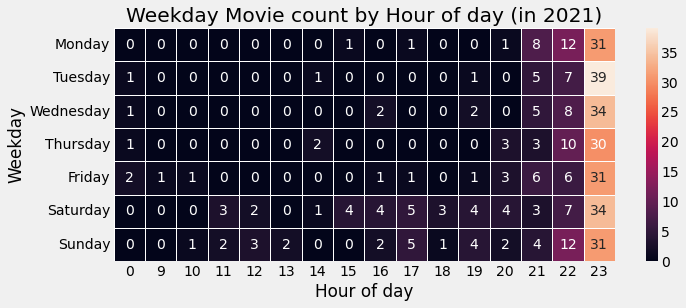



2022 



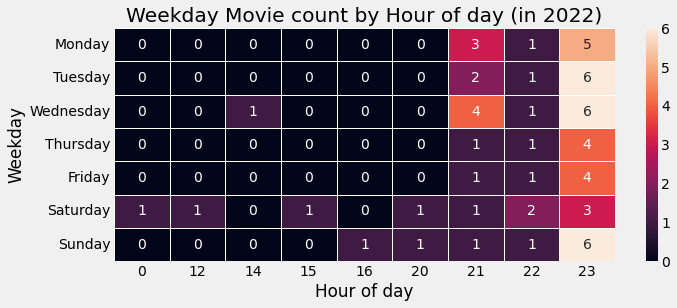

In [71]:
# Get overview by Year (since 2020)
for year in years:
    plot_hour_weekday_year = df_timestamp[df_timestamp.Timestamp.dt.year == year]
    
    print(year,'\n') 
    plot_hour_weekday_year = pd.crosstab([plot_hour_weekday_year.Weekday, plot_hour_weekday_year.WeekdayName], plot_hour_weekday_year.Hour)
    plot_hour_weekday_year = plot_hour_weekday_year.droplevel(0)
    
    # Plot
    _, ax = plt.subplots(figsize=(10, 4))
    sns.heatmap(plot_hour_weekday_year, annot=True, fmt="d", linewidths=.5, ax=ax)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0);
    plt.title('Weekday Movie count by Hour of day (in ' + str(year) + ')')
    plt.xlabel('Hour of day')
    plt.ylabel('Weekday')
    plt.show()

    print('\n')

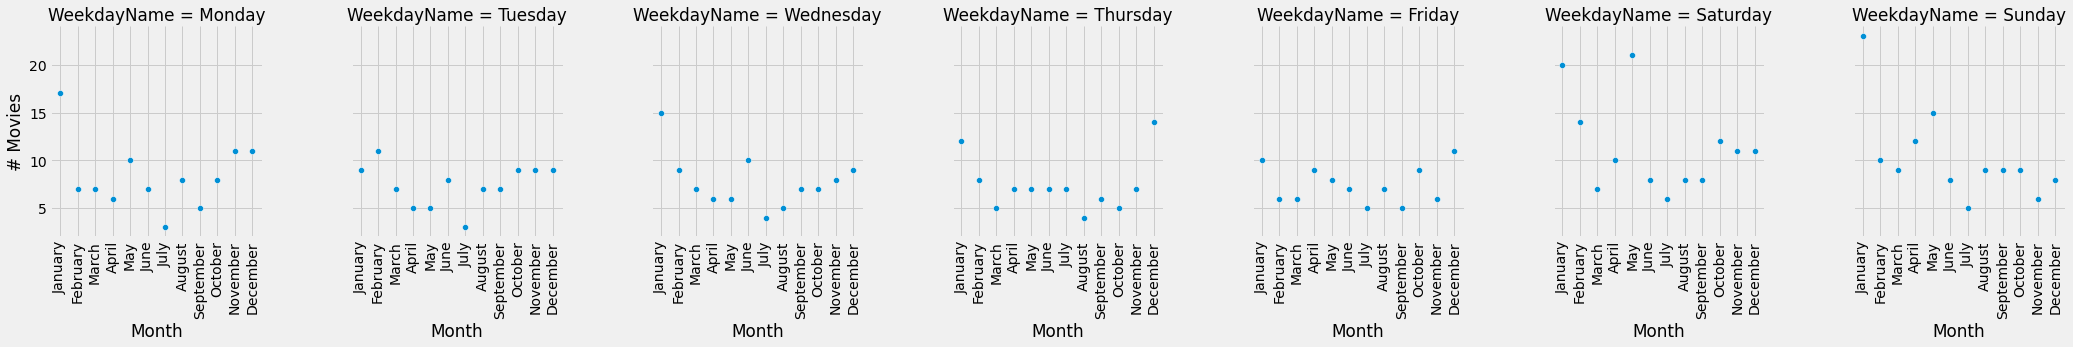

In [72]:
# Movies watched by Weekday / Month
cols = ['Month','MonthName','Weekday','WeekdayName']
gb_timestamp = df_timestamp.groupby(cols).agg({'Title':'count'}).reset_index()

g = sns.FacetGrid(gb_timestamp, col="WeekdayName")
g.map(sns.scatterplot, "MonthName", "Title")
g.set_axis_labels("Month", "# Movies")
g.fig.set_figheight(5)
g.fig.set_figwidth(30);

for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

In [73]:
# Weekdays
df_time_genre = df_timestamp.copy()
# strip multiple genre
df_time_genre.Genre = df_time_genre.Genre.str.split(',').apply(lambda x: [e.strip() for e in x])
df_time_genre = explode(df_time_genre, ['Genre'])

week_unique_days = df_time_genre.groupby(['Weekday','WeekdayName']).agg({'Date':'nunique', 'Title':'nunique'})
week_unique_days = week_unique_days.droplevel(0)

# Sum days and movies
total_days = week_unique_days.Date.sum()
total_movies = week_unique_days.Title.sum()

print('Total days:', total_days)
print('Total movies watched:', total_movies)
show_all(week_unique_days)

Total days: 566
Total movies watched: 719


In [74]:
xcol = df_time_genre['Genre']

# Genre by Weekday
ycol = [df_time_genre['Weekday'], df_time_genre['WeekdayName']]
pd.crosstab(xcol, ycol).droplevel(0, axis=1).style.background_gradient(axis=1) # 1 - horizontal

In [75]:
# Genre by Month
ycol = [df_time_genre['Month'], df_time_genre['MonthName']]
pd.crosstab(xcol, ycol).droplevel(0, axis=1).style.background_gradient(axis=1) #0 - vertical

## Release Year

In [76]:
# Last watched movies
df[['Title','Year']].tail(N)

Title  Year
718              Nightmare Alley  2021
719                    Old Henry  2021
720  We Need to Talk About Kevin  2011
721                      Annette  2021
722               Blue Valentine  2010
723                      Amadeus  1984
724                    Swan Song  2021
725                 King Richard  2021
726                         Flee  2021
727           Last and First Men  2020

In [77]:
# Movies by Release Year
df_group_year = df.groupby(by='Year').agg({'Title': 'count',
                                           'Runtime': np.mean, 
                                           'imdbRating': 'mean'}
                                          ).sort_values(by=['Title'], ascending=False).round(1)

df_group_year['Runtime'] = df_group_year.Runtime.round(0).astype(int)
show_all(df_group_year)

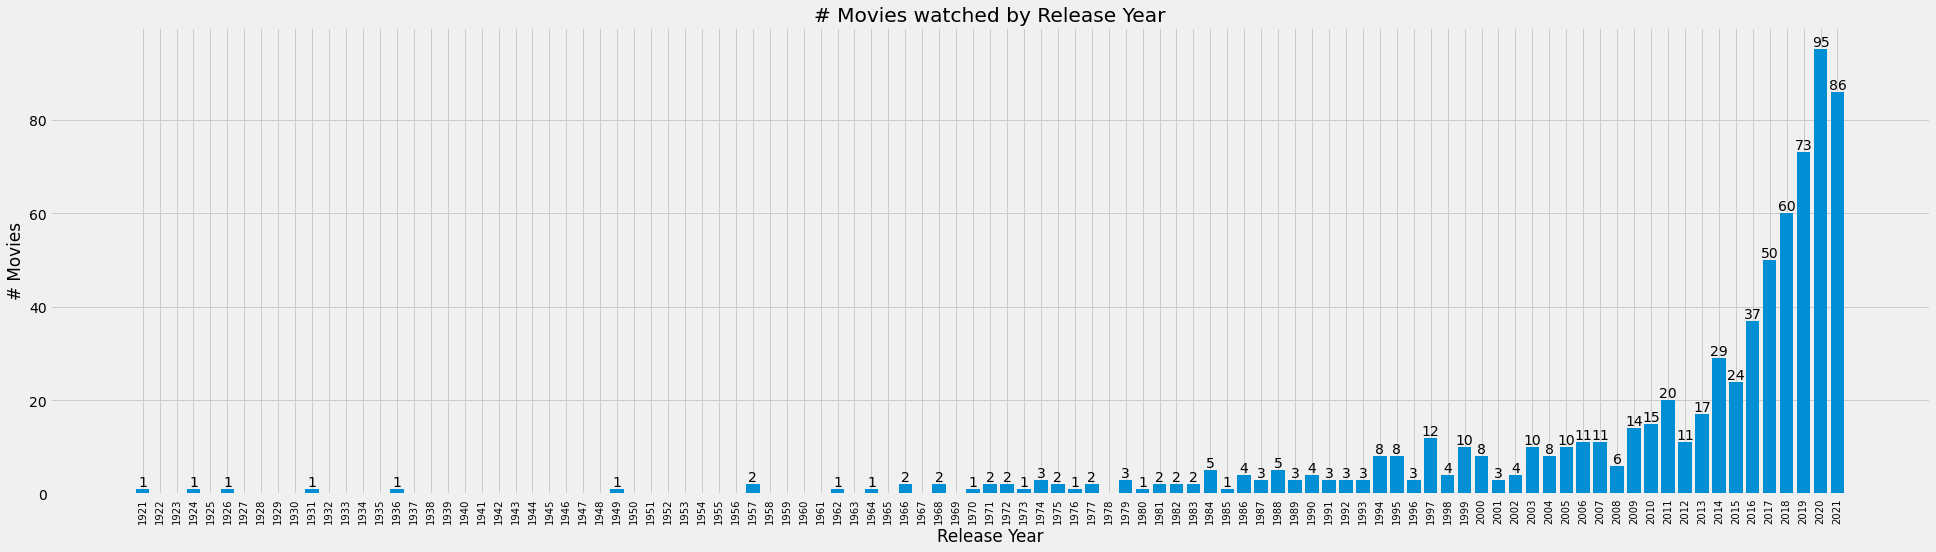

In [78]:
# Movies by Release Year
plot_movies_year = df_group_year.reset_index().sort_values('Year') #df.groupby(by='Year').agg({'Title': 'count'}).reset_index()

x = plot_movies_year.Year
y = plot_movies_year.Title

# https://towardsdatascience.com/how-to-make-bar-and-hbar-charts-with-labels-using-matplotlib-b701ce70ba9c
_, ax = plt.subplots(figsize=(30, 8))
add_ticks_vbarplot(x, y, ax)

plt.title('# Movies watched by Release Year')
plt.xlabel('Release Year')
plt.ylabel('# Movies')
plt.show()

In [79]:
# Search by specific year
YEAR = 2008
df.groupby(by='Year').get_group(YEAR).iloc[:,:-6] # don't include exploded date

Title  Year      Rated  Runtime  \
40                    Bronson  2008          R       92   
128                     Ponyo  2008          G      101   
163      Synecdoche, New York  2008          R      124   
541  Vicky Cristina Barcelona  2008      PG-13       96   
644                The Chaser  2008  Not Rated      125   
701             Transsiberian  2008          R      111   

                                             Genre              Director  \
40                 Action, Biography, Crime, Drama  Nicolas Winding Refn   
128  Animation, Adventure, Comedy, Family, Fantasy        Hayao Miyazaki   
163                                          Drama       Charlie Kaufman   
541                         Comedy, Drama, Romance           Woody Allen   
644                 Action, Crime, Drama, Thriller           Na Hong-jin   
701                Crime, Drama, Mystery, Thriller         Brad Anderson   

                                       Writer      Cinematographers  \
40   Nicolas Winding Refn, Brock Norman Brock           Larry Smith   
128          Melissa Mathison, Hayao Miyazaki          Atsushi Okui   
163                           Charlie Kaufman       Frederick Elmes   
541                               Woody Allen  Javier Aguirresarobe   
644                Won-Chan Hong, Na Hong-jin           Sung-je Lee   
701                Brad Anderson, Will Conroy          Xavi Giménez   

                                                Actors  \
40   Tom Hardy, Kelly Adams, Luing Andrews, Katy Ba...   
128  Tomoko Yamaguchi, Kazushige Nagashima, Yûki Am...   
163  Philip Seymour Hoffman, Catherine Keener, Sadi...   
541  Rebecca Hall, Scarlett Johansson, Christopher ...   
644  Kim Yoon-seok, Ha Jung-woo, Yeong-hie Seo, Kim...   
701  Woody Harrelson, Emily Mortimer, Ben Kingsley,...   

                                                  Plot  \
40   A young man who was sentenced to seven years i...   
128  A five-year-old boy develops a relationship wi...   
163  A theatre director struggles with his work, an...   
541  Two friends on a summer holiday in Spain becom...   
644  A disgraced ex-policeman who runs a small ring...   
701  A Transsiberian train journey from China to Mo...   

                                        Language  \
40                              English, Spanish   
128                                     Japanese   
163                              English, German   
541                             English, Spanish   
644                                       Korean   
701  English, Russian, Spanish, Mandarin, French   

                                       Country  Metascore  imdbRating  \
40                              United Kingdom         71         7.1   
128                                      Japan         86         7.7   
163                              United States         67         7.6   
541                       Spain, United States         70         7.1   
644                                South Korea         64         7.8   
701  United Kingdom, Germany, Spain, Lithuania         72         6.7   

     imdbVotes                                         Production  \
40      127439  Vertigo Films, Aramid Entertainment Fund, Str8...   
128     136308  Studio Ghibli, Nippon Television Network, Dent...   
163      88652  Sidney Kimmel Entertainment, Likely Story, Pro...   
541     250889  The Weinstein Company, Mediapro, Gravier Produ...   
644      63651  Big House, Vantage Holdings, Showbox Entertain...   
701      52460  Filmax International, Canal+ España, Filmax Gr...   

              Timestamp       Date      Time  
40  2020-03-22 22:05:12 2020-03-22  22:05:12  
128 2020-06-19 13:09:48 2020-06-19  13:09:48  
163 2020-08-30 23:43:28 2020-08-30  23:43:28  
541 2021-09-29 23:40:12 2021-09-29  23:40:12  
644 2021-12-14 22:56:51 2021-12-14  22:56:51  
701 2022-01-22 23:25:41 2022-01-22  23:25:41

In [80]:
# Top movies watched from last year (release year == last year)
latest_cols = ['Title','Runtime','Director','Metascore','imdbRating','imdbVotes','Date']
latest_year = now.year - 1 

if len(df[df.Year == latest_year]) != 0:
    print(str(latest_year))
    df_latest_year = df.groupby(by='Year').get_group(latest_year)[df.Year == latest_year][latest_cols].drop_duplicates('Title')
    df_latest_year = df_latest_year.sort_values(['imdbRating','imdbVotes'], ascending=[False, False])
    
    show_all(df_latest_year)
else:
    None

2021


In [81]:
### CHANGE THIS
#
## Check witch movies from current year were watched in the last 2 months
## May need an OMDB data update 
#fltr = []
#
#if now.month == 1:
#    last_year = now.year - 1
#    fltr = [last_year, 12]
#else:
#    fltr = [now.year, now.month - 1]
#    #last_month = now.month - 1
#
#if 'df_latest_year' in globals():
#    update_this_data = df_latest_year[df_latest_year.Date.dt.year >= fltr[0]][df_latest_year.Date.dt.month >= fltr[1]]
#    show_all(update_this_data.sort_values('Date'))
#else:
#    None

In [82]:
# Best movies by Release Year
BEST = 3
condition = 'Documentary' # remove this genre
cols = ['Title','Year','Runtime','imdbRating','imdbVotes']

# Top movies
df_top_movies_year = df[~df.Genre.str.contains(condition)][cols].groupby(['Year','Title']).mean().sort_values(['Year','imdbRating'], ascending=False)
df_top_movies_year = df_top_movies_year.groupby(level=0, as_index=False).apply(lambda x: 
                                                                       x.nlargest(BEST, 'imdbRating', keep='all')).reset_index(level=0, drop=True)

df_top_movies_year[['Runtime','imdbVotes']] = df_top_movies_year[['Runtime','imdbVotes']].astype(int)

show_all(df_top_movies_year)

In [83]:
# Top documentaries by Release Year
cols = ['Title','Year','Runtime','imdbRating','imdbVotes']
df_top_docs_year = df[df.Genre.str.contains(condition)][cols].groupby(['Year','Title']).mean().sort_values(['Year','imdbRating'], ascending=False)
df_top_docs_year = df_top_docs_year.groupby(level=0, as_index=False).apply(lambda x: 
                                                                   x.nlargest(N, 'imdbRating', keep='all')).reset_index(level=0, drop=True)

df_top_docs_year[['Runtime','imdbVotes']] = df_top_docs_year[['Runtime','imdbVotes']].astype(int)

show_all(df_top_docs_year)

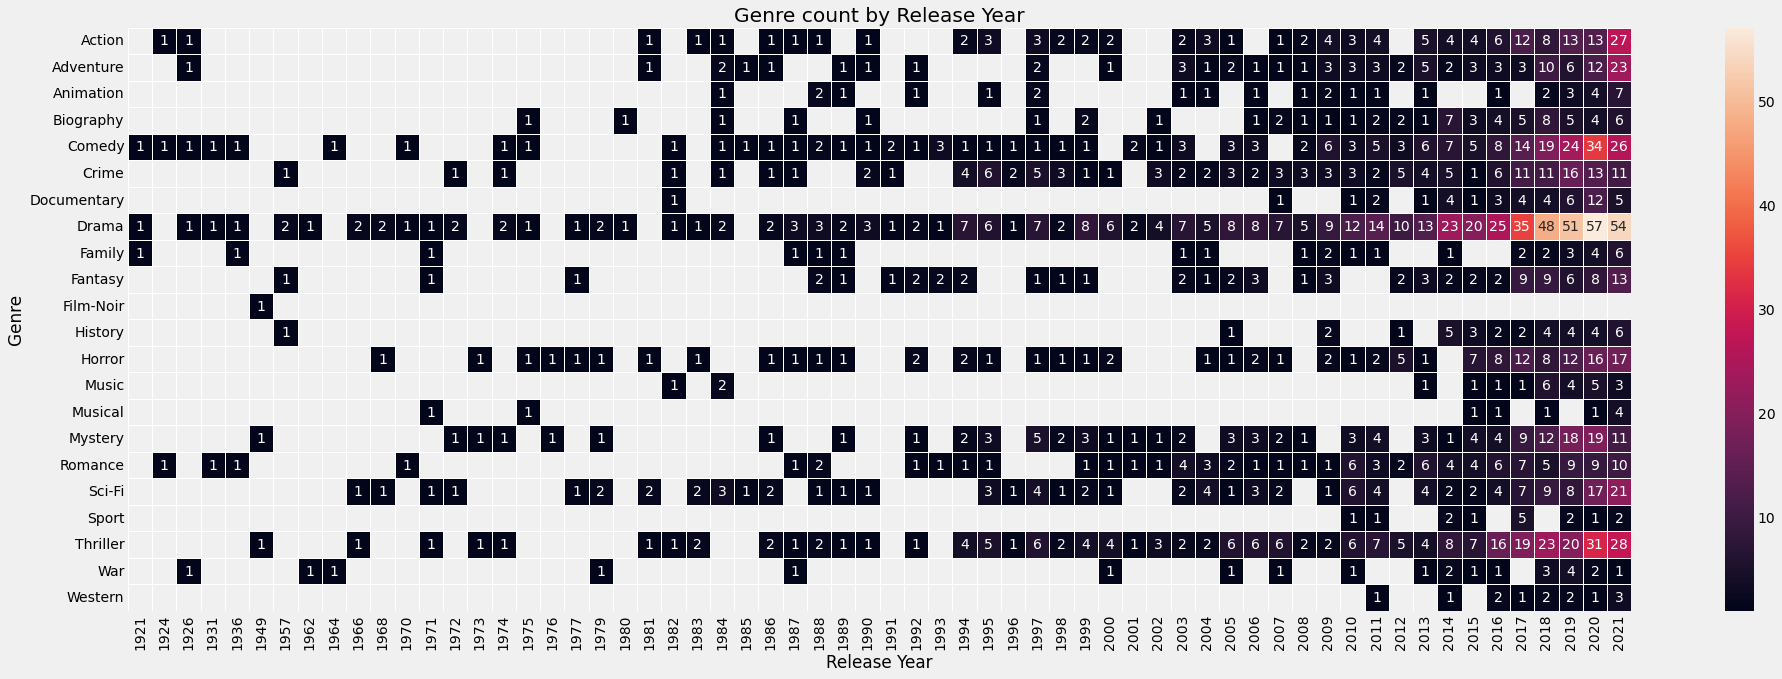

In [84]:
# Genre count by Release Year
plot_genre_year = explode(df_genre_year, ['Genre'])
plot_genre_year = plot_genre_year.groupby(['Year','Genre']).agg({'Title':'count'}).sort_values(['Year','Title'], ascending=False)
plot_genre_year_ct = plot_genre_year.unstack().T.reset_index().set_index('Genre').drop(['level_0'], axis=1)

# Plot
_, ax = plt.subplots(figsize=(30, 10))
ax = sns.heatmap(plot_genre_year_ct, annot=True, linewidths=.5, ax=ax)
plt.title('Genre count by Release Year')
plt.xlabel('Release Year')

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);

In [85]:
# Prepare plotting
year_list = plot_movies_year.Year
x = 'Year'

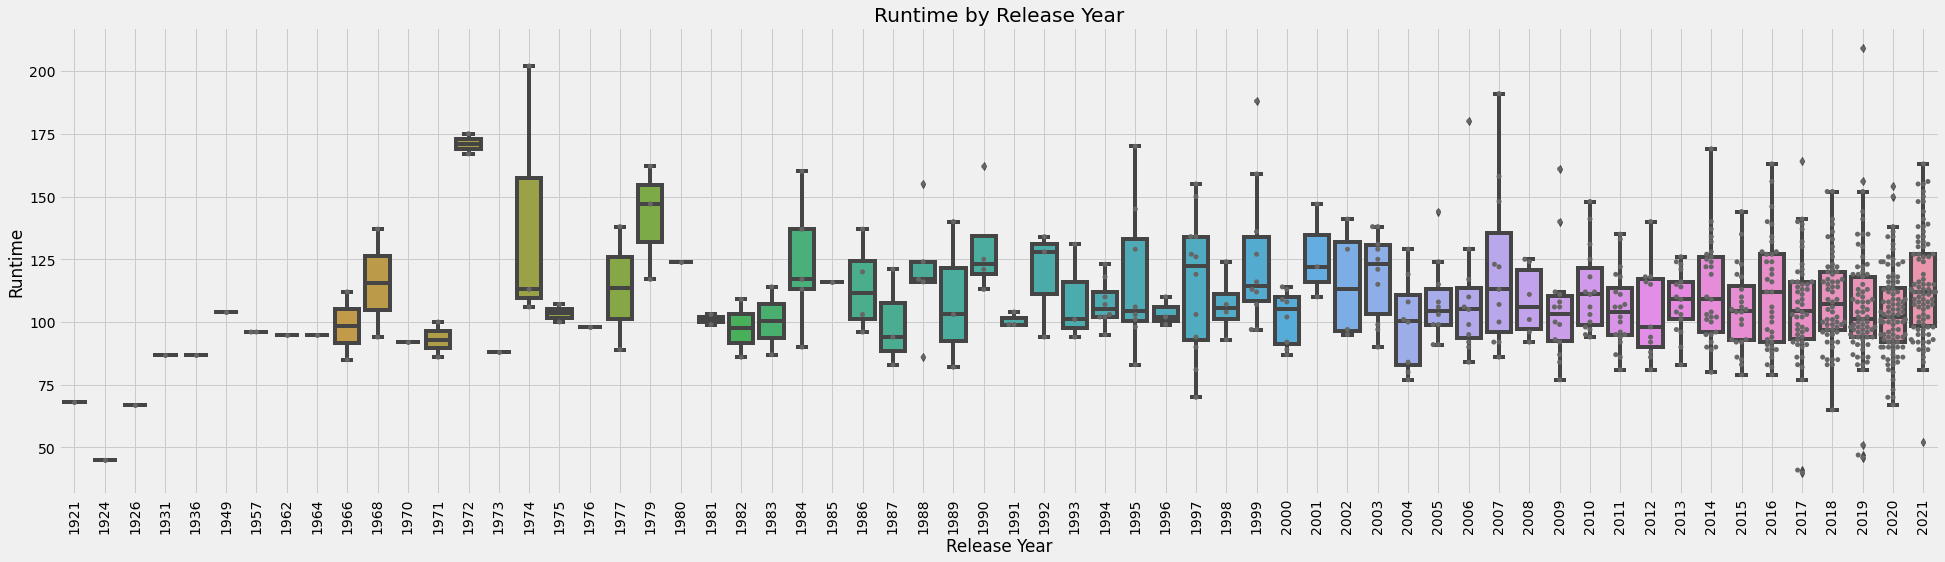

In [86]:
# Runtime by Release Year
y = 'Runtime'
plot_box_swarm(x, y, df, year_list)

In [87]:
# Time spent watching movies
runtime = df.Runtime.sum()
print(runtime.astype(int), 'minutes')
print((runtime / 60).astype(int), 'hours')
print((runtime / (60*24)).astype(int), 'days')

78357 minutes
1305 hours
54 days


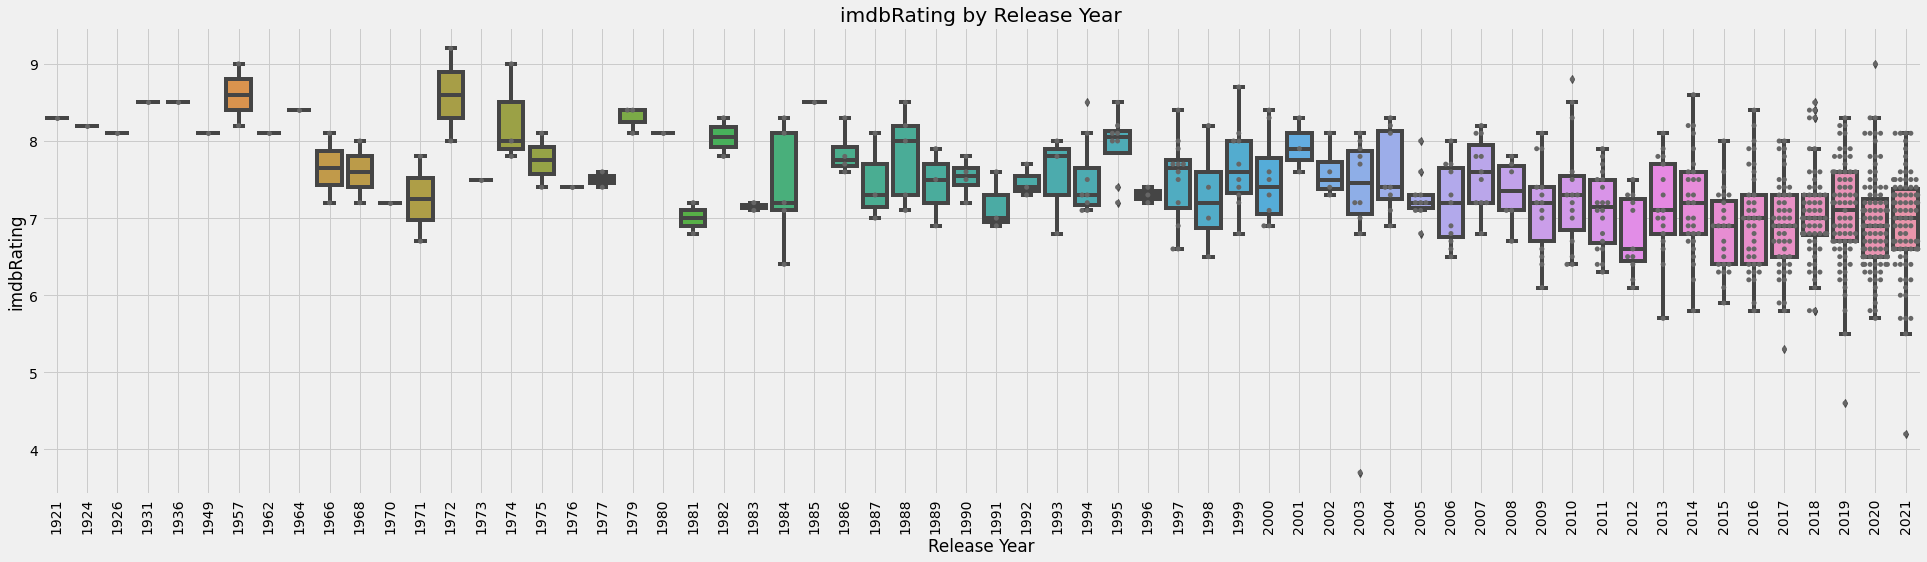

In [88]:
# imdbRating by Release Year
y = 'imdbRating'
plot_box_swarm(x, y, df, year_list)

In [89]:
df['imdbRating'].describe().round(2)

count    719.00
mean       7.15
std        0.67
min        3.70
25%        6.70
50%        7.20
75%        7.60
max        9.20
Name: imdbRating, dtype: float64

In [90]:
# Movies ranked in the 25th percentile minus 2 standard deviations
qtl_2std = df['imdbRating'].quantile(0.25) - 2*df['imdbRating'].std()
df[df['imdbRating'] < qtl_2std].iloc[:,:-6]

Title  Year  Rated  Runtime  \
39                         Geostorm  2017  PG-13      109   
63                         The Room  2003      R       99   
74   The First Temptation of Christ  2019    N/A       46   
711      Prisoners of the Ghostland  2021    N/A      103   

                        Genre             Director  \
39   Action, Sci-Fi, Thriller          Dean Devlin   
63                      Drama         Tommy Wiseau   
74                     Comedy  Rodrigo Van Der Put   
711  Action, Sci-Fi, Thriller            Sion Sono   

                             Writer  Cinematographers  \
39          Dean Devlin, Paul Guyot  Roberto Schaefer   
63                     Tommy Wiseau       Todd Barron   
74   Fábio Porchat, Gustavo Martins  Rodrigo Graciosa   
711   Reza Sixo Safai, Aaron Hendry               N/A   

                                                Actors  \
39   Gerard Butler, Jim Sturgess, Abbie Cornish, Al...   
63   Tommy Wiseau, Juliette Danielle, Greg Sestero,...   
74   Gregório Duvivier, Fábio Porchat, Antonio Tabe...   
711  Nicolas Cage, Sofia Boutella, Nick Cassavetes,...   

                                                  Plot  \
39   When the network of satellites designed to con...   
63   Johnny is a successful bank executive who live...   
74   Jesus, who's hitting the big 3-0, brings a sur...   
711  A notorious criminal must break an evil curse ...   

                                        Language               Country  \
39   English, Cantonese, Russian, Hindi, Spanish         United States   
63                                       English         United States   
74                                    Portuguese                Brazil   
711          English, Japanese, Mandarin, French  United States, Japan   

     Metascore  imdbRating  imdbVotes  \
39          21         5.3     103366   
63           9         3.7      87000   
74           0         4.6       3370   
711         53         4.2       9032   

                                            Production           Timestamp  \
39   Warner Bros., Skydance Media, RatPac-Dune Ente... 2020-03-21 21:27:03   
63                                        Wiseau-Films 2020-04-22 13:09:00   
74                                    Porta dos Fundos 2020-05-04 20:43:37   
711  Patriot Pictures, Eleven Arts, Baked Studios, ... 2022-01-28 23:40:23   

          Date      Time  
39  2020-03-21  21:27:03  
63  2020-04-22  13:09:00  
74  2020-05-04  20:43:37  
711 2022-01-28  23:40:23

### Decade

In [91]:
# Movies by Decade
cols = ['Title', 'Year', 'Runtime', 'imdbRating', 'Genre', 'Language']
df_decade = df[cols].copy()
# convert to decade
df_decade['Decade'] = df_decade['Year'].astype(int)//10*10

movies_decade = df_decade.groupby('Decade').agg({'Title': 'count', 
                                                 'Runtime': 'mean', 
                                                 'imdbRating': 'mean'}).round(1)

movies_decade['Runtime'] = movies_decade.Runtime.round(0).astype(int)
movies_decade

Title  Runtime  imdbRating
Decade                            
1920        3       60         8.2
1930        2       87         8.5
1940        1      104         8.1
1950        2       96         8.6
1960        6      103         7.8
1970       17      123         7.9
1980       28      112         7.6
1990       58      115         7.5
2000       85      110         7.4
2010      336      108         7.0
2020      181      108         6.9

In [92]:
# Top movies by Decade
cols = ['Decade','Title','Year','imdbRating']
condition = 'Documentary' # filter this out

BEST = 3
top_by_decade = df_decade[(~df_decade.Genre.str.contains(condition))][cols]
top_by_decade = top_by_decade.groupby(['Decade','Title']).mean().sort_values(['Decade','imdbRating'], ascending=False)

top_by_decade = top_by_decade.groupby(level=0, as_index=False).apply(lambda x: 
                                                                     x.nlargest(BEST, 'imdbRating', keep='all')).reset_index(level=0, drop=True)

top_by_decade['Year'] = top_by_decade['Year'].astype(int)
top_by_decade

Year  imdbRating
Decade Title                                                               
1920   The Kid                                             1921         8.3
       Sherlock Jr.                                        1924         8.2
       The General                                         1926         8.1
1930   City Lights                                         1931         8.5
       Modern Times                                        1936         8.5
1940   The Third Man                                       1949         8.1
1950   12 Angry Men                                        1957         9.0
       The Seventh Seal                                    1957         8.2
1960   Dr. Strangelove or: How I Learned to Stop Worry...  1964         8.4
       Ivan's Childhood                                    1962         8.1
       Persona                                             1966         8.1
1970   The Godfather                                       1972         9.2
       The Godfather: Part II                              1974         9.0
       Alien                                               1979         8.4
       Apocalypse Now                                      1979         8.4
1980   Back to the Future                                  1985         8.5
       Cinema Paradiso                                     1988         8.5
       Aliens                                              1986         8.3
       Amadeus                                             1984         8.3
1990   The Matrix                                          1999         8.7
       Léon: The Professional                              1994         8.5
       The Usual Suspects                                  1995         8.5
2000   Memento                                             2000         8.4
       Amélie                                              2001         8.3
       Eternal Sunshine of the Spotless Mind               2004         8.3
       Requiem for a Dream                                 2000         8.3
2010   Inception                                           2010         8.8
       Interstellar                                        2014         8.6
       Capernaum                                           2018         8.4
       Spider-Man: Into the Spider-Verse                   2018         8.4
       Your Name.                                          2016         8.4
2020   The Father                                          2020         8.3
       CODA                                                2021         8.1
       Dune                                                2021         8.1
       Soul                                                2020         8.1

In [93]:
# Return cross-section
DEC = 1970
top_by_decade.xs(DEC)

Year  imdbRating
Title                                   
The Godfather           1972         9.2
The Godfather: Part II  1974         9.0
Alien                   1979         8.4
Apocalypse Now          1979         8.4

In [94]:
# Prepare plotting
x = 'Decade'
decade_list = df_decade.sort_values('Decade').Decade.unique()

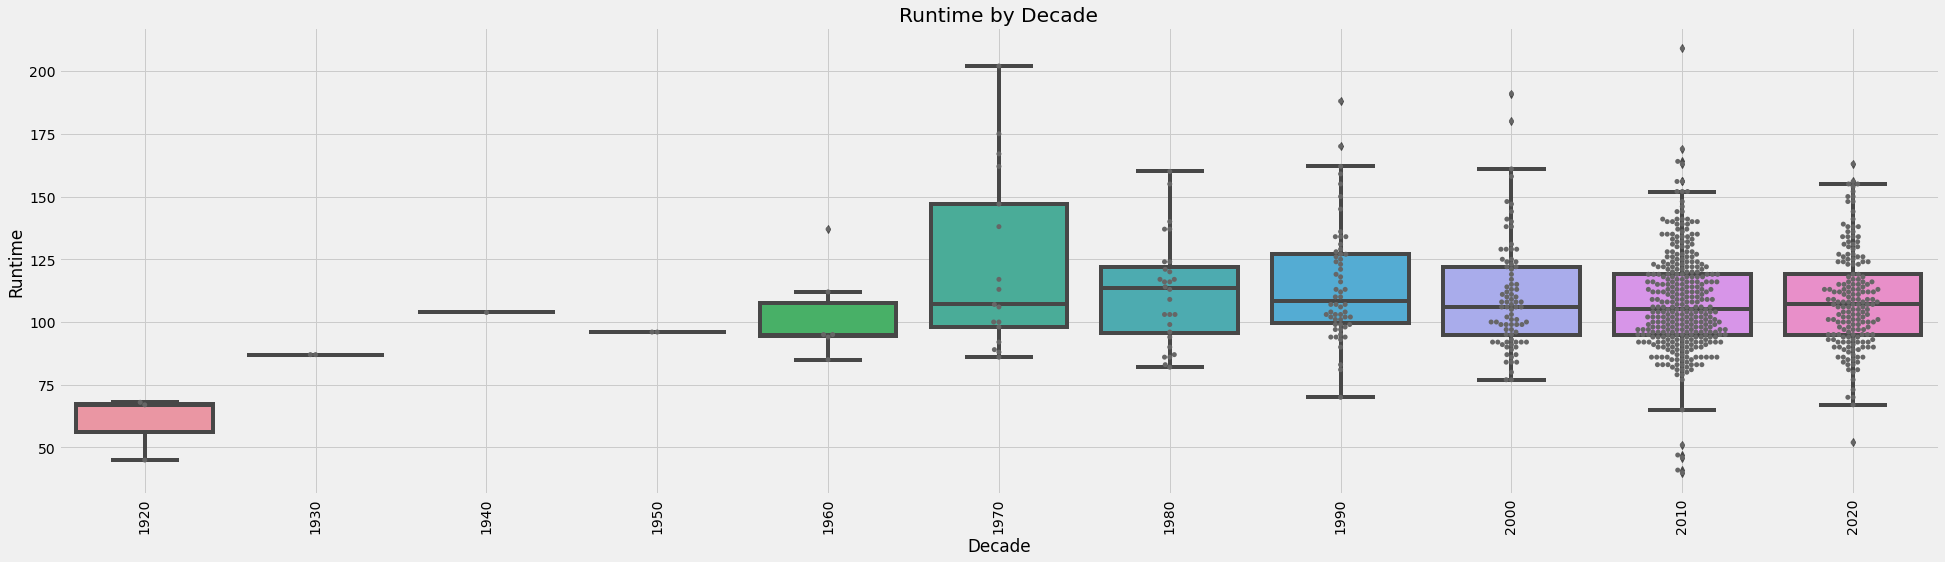

In [95]:
# Runtime by Decade
y = 'Runtime'
plot_box_swarm(x, y, df_decade, decade_list)

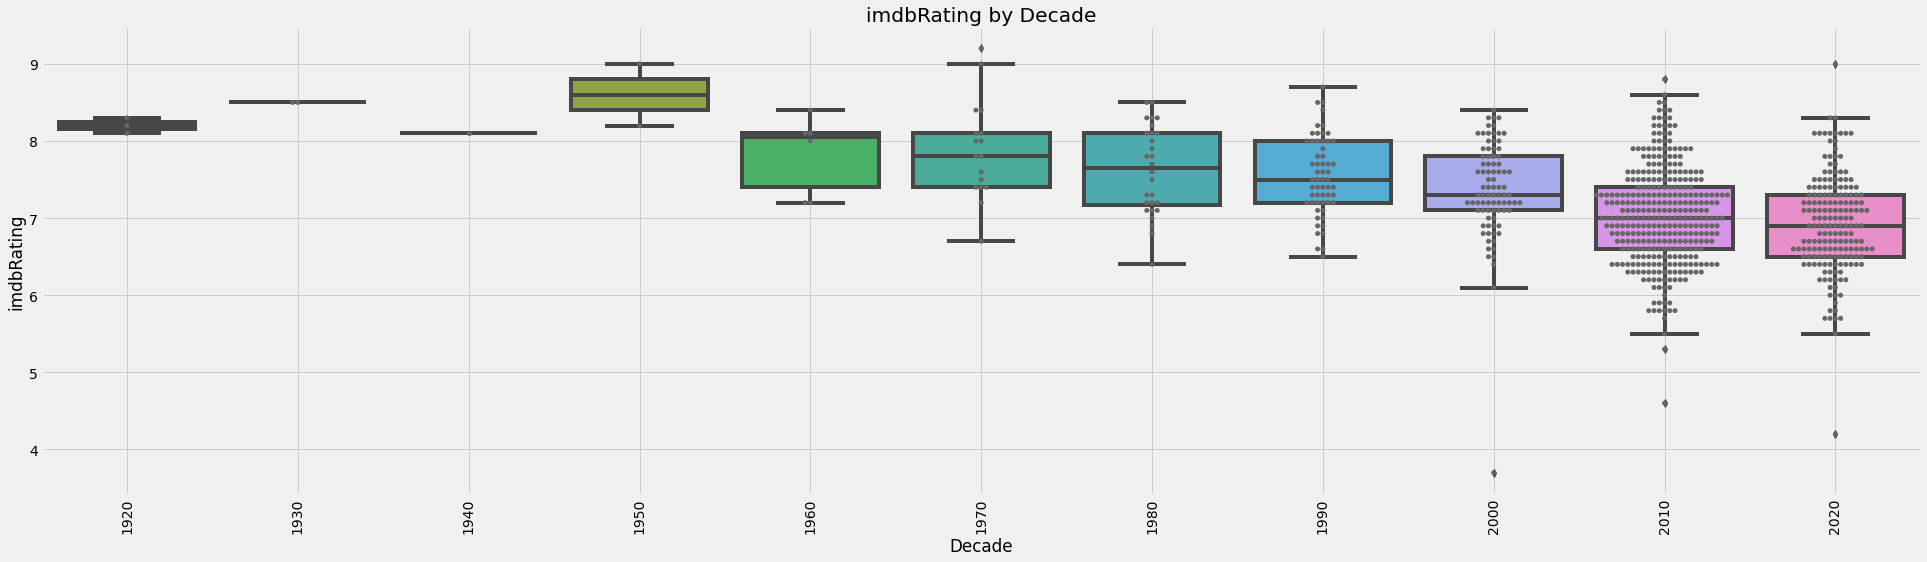

In [96]:
# imdbRating by Decade
y = 'imdbRating'
plot_box_swarm(x, y, df_decade, decade_list)

In [97]:
# Highest rating movie by Decade
df_top_rating_decade = df_decade.set_index(['Decade','Title']).sort_values(['Decade','imdbRating'], ascending=False)
df_top_rating_decade = df_top_rating_decade[~df_top_rating_decade.Genre.str.contains('Documentary')] # filter out documentary
df_top_rating_decade.groupby(level=0, as_index=False).apply(lambda x: x.head(1)).reset_index(level=0, drop=True)

Year  Runtime  \
Decade Title                                                               
1920   The Kid                                             1921       68   
1930   City Lights                                         1931       87   
1940   The Third Man                                       1949      104   
1950   12 Angry Men                                        1957       96   
1960   Dr. Strangelove or: How I Learned to Stop Worry...  1964       95   
1970   The Godfather                                       1972      175   
1980   Cinema Paradiso                                     1988      155   
1990   The Matrix                                          1999      136   
2000   Memento                                             2000      113   
2010   Inception                                           2010      148   
2020   The Father                                          2020       97   

                                                           imdbRating  \
Decade Title                                                            
1920   The Kid                                                    8.3   
1930   City Lights                                                8.5   
1940   The Third Man                                              8.1   
1950   12 Angry Men                                               9.0   
1960   Dr. Strangelove or: How I Learned to Stop Worry...         8.4   
1970   The Godfather                                              9.2   
1980   Cinema Paradiso                                            8.5   
1990   The Matrix                                                 8.7   
2000   Memento                                                    8.4   
2010   Inception                                                  8.8   
2020   The Father                                                 8.3   

                                                                                         Genre  \
Decade Title                                                                                     
1920   The Kid                                                           Comedy, Drama, Family   
1930   City Lights                                                      Comedy, Drama, Romance   
1940   The Third Man                                              Film-Noir, Mystery, Thriller   
1950   12 Angry Men                                                               Crime, Drama   
1960   Dr. Strangelove or: How I Learned to Stop Worry...                          Comedy, War   
1970   The Godfather                                                              Crime, Drama   
1980   Cinema Paradiso                                                          Drama, Romance   
1990   The Matrix                                                               Action, Sci-Fi   
2000   Memento                                                               Mystery, Thriller   
2010   Inception                                           Action, Adventure, Sci-Fi, Thriller   
2020   The Father                                                               Drama, Mystery   

                                                                                   Language  
Decade Title                                                                                 
1920   The Kid                                                                      English  
1930   City Lights                                                            None, English  
1940   The Third Man                                       English, German, Russian, French  
1950   12 Angry Men                                                                 English  
1960   Dr. Strangelove or: How I Learned to Stop Worry...                  English, Russian  
1970   The Godfather                                                English, Italian, Latin  
1980   Cinema Paradiso                                                              Italian  

## Rated

In [98]:
# Movie analysis by Rated
df_rated = get_mean_value(df, 'Rated', 'Runtime')
df_rated['imdbRating'] = get_mean_value(df, 'Rated', 'imdbRating')['imdbRating']

In [99]:
# Prepare plotting
rated_list = df_rated.index.sort_values()
x = 'Rated'

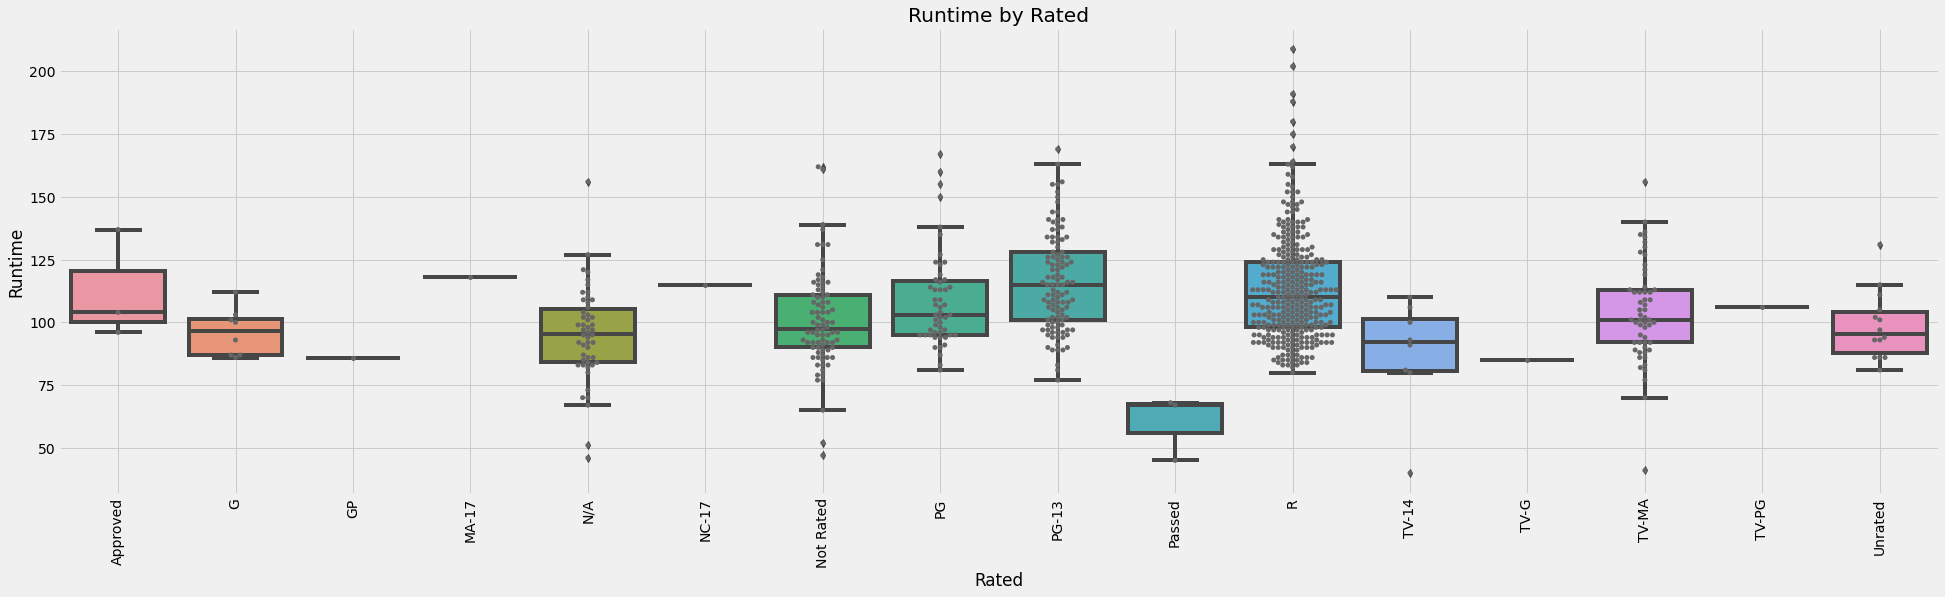

In [100]:
# The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2)
y = 'Runtime'
plot_box_swarm(x, y, df, rated_list)

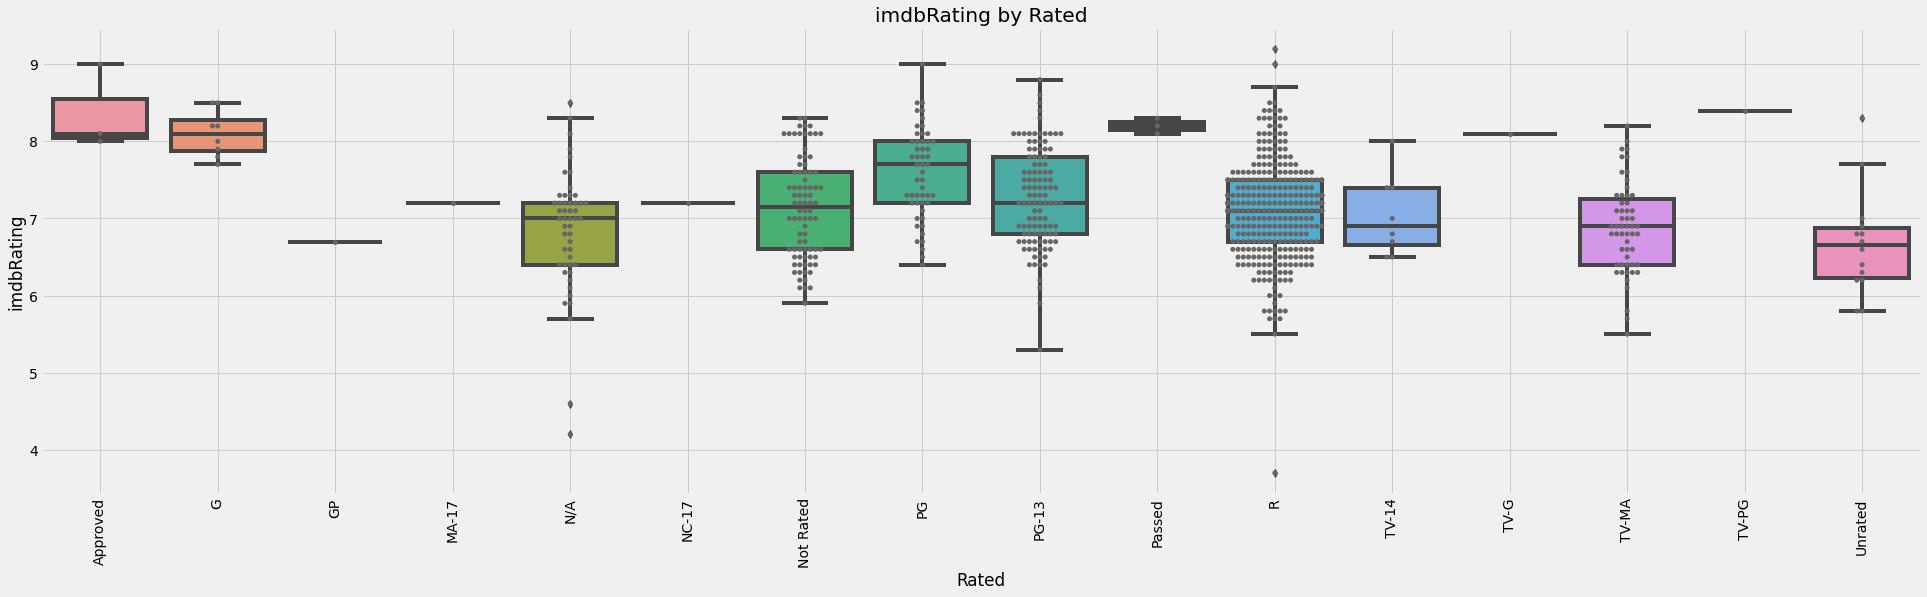

In [101]:
# The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2)
y = 'imdbRating'
plot_box_swarm(x, y, df, rated_list)

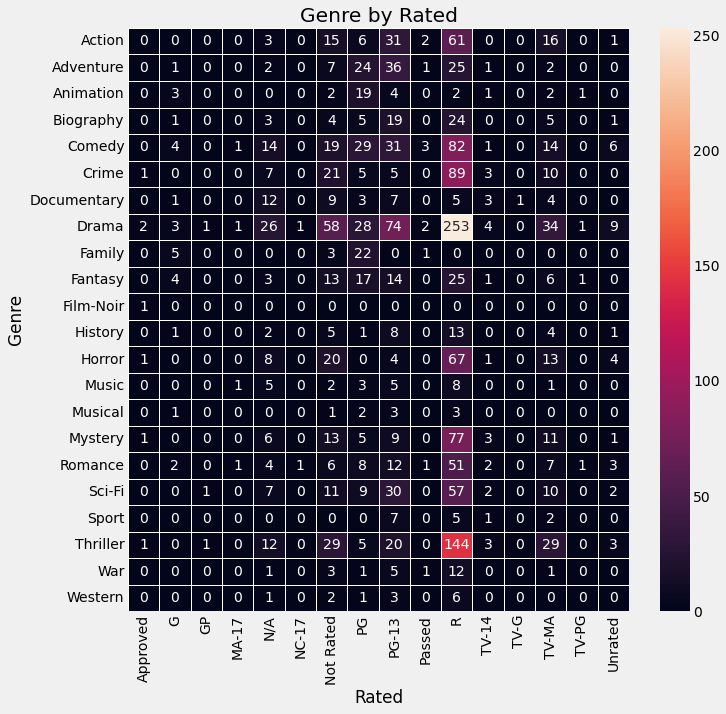

In [102]:
# Genre by Rated
df_explode_genre = df[['Title','Rated','Genre']].copy()

df_explode_genre.Genre = df_explode_genre.Genre.str.split(',').apply(lambda x: [e.strip() for e in x])
df_explode_genre = explode(df_explode_genre, ['Genre'])

ct_rated_genre = pd.crosstab(df_explode_genre.Genre, df_explode_genre.Rated) #, margins=True)

# Plot
_, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(ct_rated_genre, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title('Genre by Rated');

## Runtime

In [103]:
df_runtime = df[['Title','Year','Runtime']].copy()

print('Mean runtime: ' + str(int(round(df_runtime.Runtime.mean(), 0)))) #.quantile(0.5)
print('Median runtime: ' + str(int(round(df_runtime.Runtime.median(), 0)))) 

Mean runtime: 109
Median runtime: 106


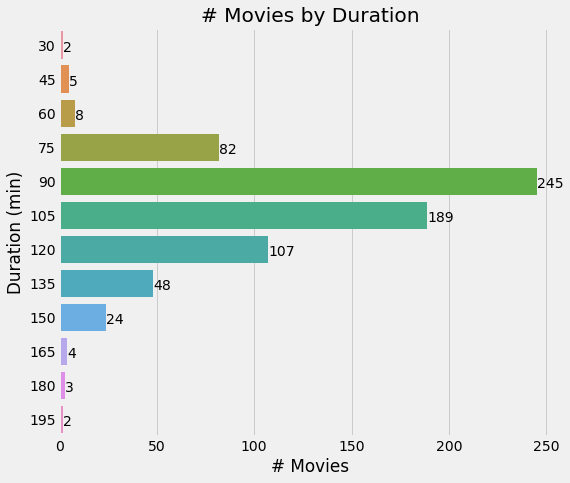

In [104]:
period = 15 # group data in groups of 15 minutes
df_runtime['Duration'] = df.Runtime.floordiv(period) * period 
df_runtime = df_runtime.groupby('Duration').agg({'Title':'count'})

# Plot
plot_duration_movies = df_runtime.reset_index()

plt.figure(figsize=(8,7))
sns.barplot(x='Title', y='Duration', data=plot_duration_movies, orient='h');

plt.title('# Movies by Duration')
plt.xlabel('# Movies')
plt.ylabel('Duration (min)')

for i, rate in enumerate(plot_duration_movies["Title"]):
    plt.text(rate+0.1, i+0.2, rate)

In [105]:
# Longest movies
cols = ['Title','Genre','Runtime','Metascore','imdbRating']

print('Movies over 120 minutes (2 hours):   ', len(df[df.Runtime > 120]))
print('Movies over 150 minutes (2.5 hours): ', len(df[df.Runtime > 150]))
print('Movies over 180 minutes (3 hours):   ', len(df[df.Runtime > 180]))
show_all(df[cols].nlargest(N, 'Runtime', keep='all').drop_duplicates().set_index('Title'))

Movies over 120 minutes (2 hours):    183
Movies over 150 minutes (2.5 hours):  30
Movies over 180 minutes (3 hours):    4


## Genre

In [106]:
# Number of unique genres
print('Unique genres: ' + str(counter_display(df, 'Genre', 'Title').index.nunique()))

# Unique genres
list(counter_display(df, 'Genre', 'Title').index.unique().sort_values())

Unique genres: 22


['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [107]:
# Check genre of recently watched movies 
cols = ['Title','Year','Genre','Runtime','imdbRating']
df[cols].tail(N)

Title  Year                          Genre  \
718              Nightmare Alley  2021         Crime, Drama, Thriller   
719                    Old Henry  2021              Thriller, Western   
720  We Need to Talk About Kevin  2011       Drama, Mystery, Thriller   
721                      Annette  2021        Drama, Musical, Romance   
722               Blue Valentine  2010                 Drama, Romance   
723                      Amadeus  1984        Biography, Drama, Music   
724                    Swan Song  2021         Drama, Romance, Sci-Fi   
725                 King Richard  2021        Biography, Drama, Sport   
726                         Flee  2021  Documentary, Animation, Drama   
727           Last and First Men  2020       Fantasy, Mystery, Sci-Fi   

     Runtime  imdbRating  
718      150         7.3  
719       99         7.3  
720      112         7.5  
721      141         6.4  
722      112         7.3  
723      160         8.3  
724      112         6.8  
725      144         7.6  
726       89         8.1  
727       70         6.7

In [108]:
# Top movie genres
df_explode_genre = df[cols].copy()

# do this for visualization below
df_explode_genre.Genre = df_explode_genre.Genre.str.split(',').apply(lambda x: [e.strip() for e in x])
df_explode_genre = explode(df_explode_genre, ['Genre'])

In [109]:
# Statistic analysis of Runtime by Genre
df_genre_runtime_stats = df_explode_genre.drop('imdbRating', axis=1).groupby('Genre')['Runtime'].describe()

stat_cols = df_genre_runtime_stats.columns.values #['count','mean','std','min','max']
df_genre_runtime_stats[stat_cols] = df_genre_runtime_stats[stat_cols].fillna(0).astype(int)
df_genre_runtime_stats.sort_values('count', inplace=True, ascending=False)
df_genre_runtime_stats

count  mean  std  min  25%  50%  75%  max
Genre                                                 
Drama          497   112   20   51   97  109  124  209
Thriller       247   110   19   51   95  108  121  191
Comedy         204   101   15   41   92  100  111  141
Crime          141   113   23   40   98  110  125  209
Action         135   116   22   45  100  115  132  191
Sci-Fi         129   113   21   70   99  112  129  169
Mystery        126   110   20   70   95  106  121  180
Horror         118   104   17   79   93   99  112  191
Romance         99   109   17   45   97  108  122  163
Adventure       99   115   21   67   99  115  131  169
Fantasy         84   110   19   70   96  106  123  180
Biography       62   121   19   81  112  119  131  209
Documentary     45    89   15   40   83   90   99  119
History         35   114   19   77   99  113  128  152
Animation       34   100   13   81   90   97  106  134
Family          31    97   10   68   93   97  103  119
Music           25   108   18   86   97  104  119  160
War             24   113   20   67   99  112  124  154
Sport           15   113   33   40  105  121  134  152
Western         13   116   16   92  102  122  131  139
Musical         10   112   17   92  100  108  126  141
Film-Noir        1   104    0  104  104  104  104  104

In [110]:
# Statistic analysis of imdbRating by Genre
df_genre_rating_stats = df_explode_genre.drop('Runtime', axis=1).groupby('Genre')['imdbRating'].describe()

stat_cols = df_genre_rating_stats.columns.values #['mean','std']
df_genre_rating_stats[stat_cols] = df_genre_rating_stats[stat_cols].fillna(0).round(1)
df_genre_rating_stats['count'] = df_genre_rating_stats['count'].astype(int)
df_genre_rating_stats.sort_values('count', inplace=True, ascending=False)
df_genre_rating_stats

count  mean  std  min  25%  50%  75%  max
Genre                                                 
Drama          497   7.2  0.6  3.7  6.8  7.2  7.6  9.2
Thriller       247   7.0  0.6  4.2  6.5  7.0  7.4  8.8
Comedy         204   7.1  0.7  4.6  6.6  7.0  7.4  8.5
Crime          141   7.2  0.6  5.7  6.7  7.1  7.5  9.2
Action         135   7.0  0.7  4.2  6.6  7.0  7.4  8.8
Sci-Fi         129   7.0  0.8  4.2  6.5  7.0  7.4  8.8
Mystery        126   7.0  0.7  5.7  6.5  7.0  7.5  8.5
Horror         118   6.7  0.6  5.5  6.3  6.5  7.0  8.4
Romance         99   7.2  0.6  5.8  6.8  7.2  7.6  8.5
Adventure       99   7.2  0.6  5.8  6.7  7.2  7.7  8.8
Fantasy         84   7.2  0.6  5.5  6.7  7.2  7.5  8.4
Biography       62   7.4  0.5  6.4  7.0  7.3  7.8  9.0
Documentary     45   7.7  0.6  5.9  7.4  7.7  8.1  9.0
History         35   7.4  0.5  6.4  7.0  7.4  7.6  8.3
Animation       34   7.7  0.5  6.4  7.3  7.8  8.1  8.4
Family          31   7.6  0.5  6.4  7.2  7.7  8.1  8.5
Music           25   7.4  0.6  6.3  7.0  7.2  7.9  8.3
War             24   7.6  0.6  6.4  7.2  7.6  8.1  8.4
Sport           15   7.5  0.5  6.7  7.2  7.5  7.8  8.5
Western         13   7.1  0.3  6.6  6.9  7.0  7.3  7.6
Musical         10   7.1  0.6  6.3  6.6  7.3  7.6  8.0
Film-Noir        1   8.1  0.0  8.1  8.1  8.1  8.1  8.1

In [111]:
# Genre (runtime and rating mean values)
df_genre_top_stats = pd.DataFrame(index = df_genre_runtime_stats.index)

df_genre_top_stats['count'] = df_genre_runtime_stats['count']
df_genre_top_stats['runtime'] = df_genre_runtime_stats['mean']
df_genre_top_stats['ratings'] = df_genre_rating_stats['mean']
df_genre_top_stats

count  runtime  ratings
Genre                               
Drama          497      112      7.2
Thriller       247      110      7.0
Comedy         204      101      7.1
Crime          141      113      7.2
Action         135      116      7.0
Sci-Fi         129      113      7.0
Mystery        126      110      7.0
Horror         118      104      6.7
Romance         99      109      7.2
Adventure       99      115      7.2
Fantasy         84      110      7.2
Biography       62      121      7.4
Documentary     45       89      7.7
History         35      114      7.4
Animation       34      100      7.7
Family          31       97      7.6
Music           25      108      7.4
War             24      113      7.6
Sport           15      113      7.5
Western         13      116      7.1
Musical         10      112      7.1
Film-Noir        1      104      8.1

In [112]:
# Prepare ploting
x = 'Genre'
# get genre order a-z
genre_list = counter_display(df, 'Genre', 'Title', None).index.unique().sort_values()

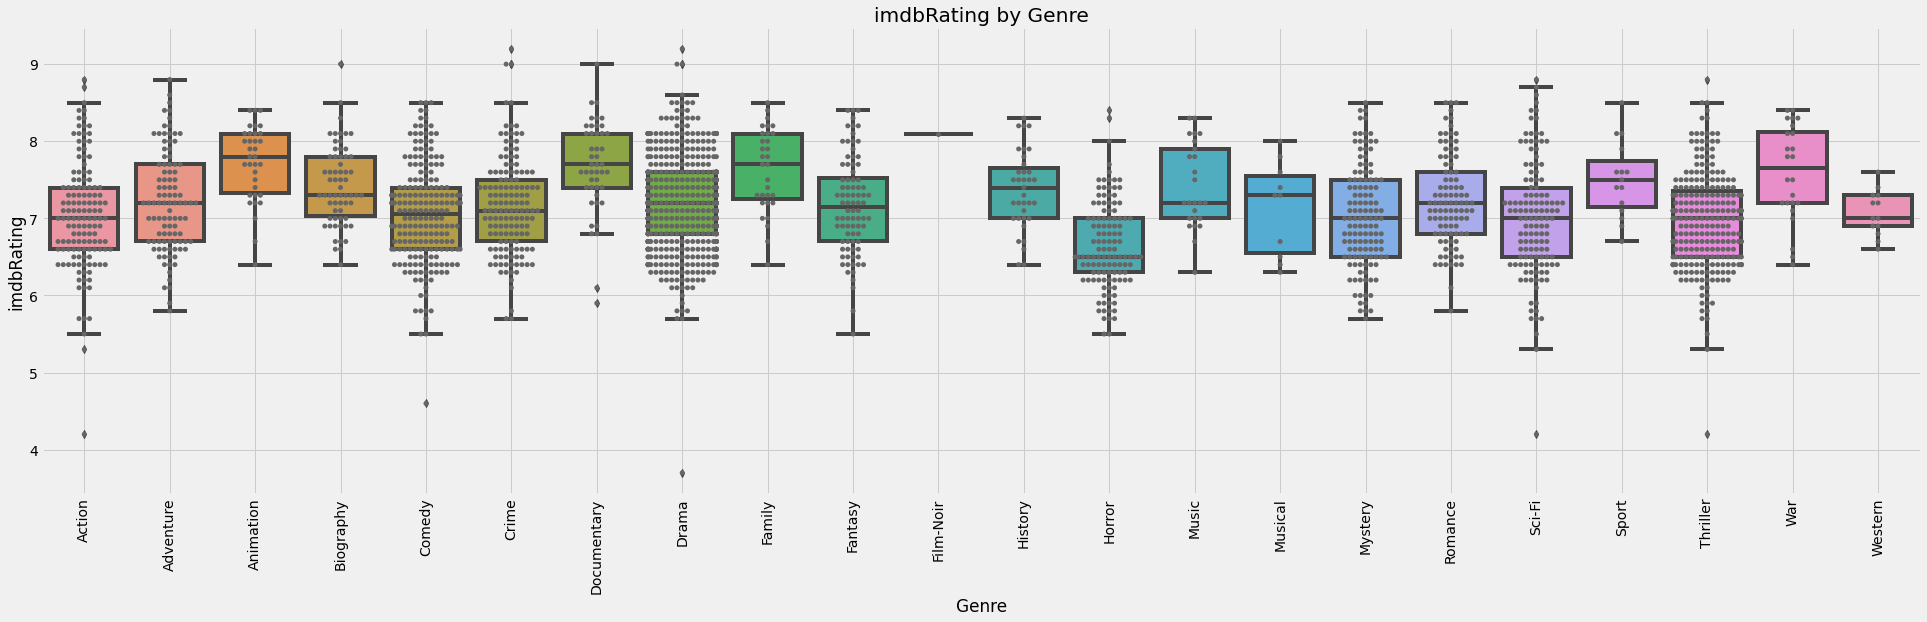

In [113]:
# The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2)
y = 'imdbRating'
plot_box_swarm(x, y, df_explode_genre, genre_list)

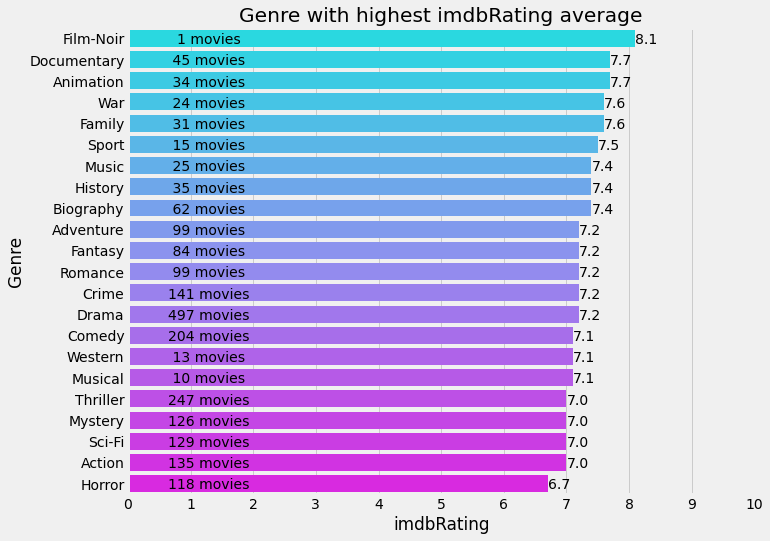

In [114]:
# Genre with highest imdbRating
df_genre_rating_stats.sort_values(by='mean', ascending=False, inplace=True)

# https://medium.com/analytics-vidhya/exploratory-data-analysis-imdb-dataset-cff0c3991ad5
plt.figure(figsize=(10,8))
sns.barplot(y=df_genre_rating_stats.index, x=df_genre_rating_stats["mean"], palette='cool', orient="h")
# plot settings
plt.title('Genre with highest imdbRating average')
plt.xlabel('imdbRating')
plt.xlim((0,10))
plt.xticks(np.arange(0, 11, step=1))

for i, counts in enumerate(df_genre_rating_stats["count"]):
    plt.text(0.5, i+0.25, f"{counts:>5} movies")
    plt.text(df_genre_rating_stats["mean"][i], i+0.25, df_genre_rating_stats["mean"][i])
plt.show()

In [115]:
# Number of unique combination of genres
df[['Genre','Title']].groupby(by='Genre').count().reset_index()['Genre'].nunique()

304

In [116]:
# Top movie genres combination
cols = ['Genre','Title','imdbRating','Date']
df_genre = df[cols].copy()
df_genre['Year'] = df_genre.Date.dt.year

df_genre.drop(columns='Date', inplace=True)
pd.crosstab(df_genre['Genre'], df_genre['Year'], margins=True).nlargest(N+1, 'All', keep='all') # +1 because 'All' takes 1 spot 

Year                             2020  2021  2022  All
Genre                                                 
All                               252   405    62  719
Drama                              21    27     3   51
Comedy, Drama                      12    17     1   30
Crime, Drama, Thriller             11    10     2   23
Documentary                         9     9     2   20
Drama, Romance                      5    11     3   19
Comedy, Drama, Romance              0    12     4   16
Crime, Drama                        4     9     1   14
Crime, Drama, Mystery, Thriller     6     7     1   14
Biography, Drama                    6     6     0   12
Drama, Mystery, Thriller            4     7     1   12

In [117]:
# Genre combination with most movies, showing worst and best rated movies
df_genre_agg = df_genre.groupby(by='Genre').agg({'imdbRating':['min','max','mean'], 
                                                 'Title':['count']})
df_genre_agg.reset_index(inplace=True)

df_genre_agg[('Title','worst')] = df_genre.loc[df_genre.groupby('Genre')['imdbRating'].idxmin().fillna(0).astype(int)].reset_index(drop=True)['Title']
df_genre_agg[('Title','best')] = df_genre.loc[df_genre.groupby('Genre')['imdbRating'].idxmax().fillna(0).astype(int)].reset_index(drop=True)['Title']

df_genre_agg = df_genre_agg.set_index([('Genre','')]).sort_values(by=[('Title','count')], ascending=False).round(1)
df_genre_agg.index.rename('Genre', inplace=True)

df_genre_agg.nlargest(N, [('Title', 'count')], keep='all')

imdbRating           Title  \
                                       min  max mean count   
Genre                                                        
Drama                                  3.7  8.4  7.1    51   
Comedy, Drama                          6.3  7.8  7.0    30   
Crime, Drama, Thriller                 6.4  8.1  7.2    23   
Documentary                            5.9  8.5  7.6    20   
Drama, Romance                         6.1  8.5  7.4    19   
Comedy, Drama, Romance                 6.5  8.5  7.2    16   
Crime, Drama                           6.9  9.2  7.7    14   
Crime, Drama, Mystery, Thriller        6.3  8.5  7.2    14   
Biography, Drama                       6.6  8.1  7.5    12   
Drama, Mystery, Thriller               6.0  8.1  7.2    12   

                                                                               
                                                worst                    best  
Genre                                                                          
Drama                                        The Room               Capernaum  
Comedy, Drama                               Chevalier           Another Round  
Crime, Drama, Thriller                 Run Hide Fight  No Country for Old Men  
Documentary                      Expedition Happiness         Untamed Romania  
Drama, Romance                                   Love         Cinema Paradiso  
Comedy, Drama, Romance                   On the Rocks             City Lights  
Crime, Drama                                Bomb City           The Godfather  
Crime, Drama, Mystery, Thriller          Shimmer Lake      The Usual Suspects  
Biography, Drama                            Rosewater        The Elephant Man  
Drama, Mystery, Thriller                   Horse Girl         The Sixth Sense

In [118]:
# Genre combination with higher imdbRating
df_genre_agg[df_genre_agg[('Title','count')] > 2].nlargest(N, [('imdbRating','mean')], keep='all')

imdbRating           Title  \
                                      min  max mean count   
Genre                                                       
Documentary, History                  7.5  8.2  7.8     3   
Adventure, Drama, Sci-Fi              6.9  8.6  7.8     3   
Crime, Drama                          6.9  9.2  7.7    14   
Documentary                           5.9  8.5  7.6    20   
Mystery, Thriller                     6.7  8.4  7.6     3   
Biography, Drama                      6.6  8.1  7.5    12   
Biography, Crime, Drama               6.6  8.1  7.5     6   
Biography, Drama, History             7.1  7.9  7.5     6   
Drama, Mystery                        6.9  8.3  7.5     3   
Drama, Romance                        6.1  8.5  7.4    19   
Action, Crime, Drama, Thriller        6.5  8.5  7.4     6   

                                                                              
                                               worst                    best  
Genre                                                                         
Documentary, History                One Child Nation               Apollo 11  
Adventure, Drama, Sci-Fi                       Finch            Interstellar  
Crime, Drama                               Bomb City           The Godfather  
Documentary                     Expedition Happiness         Untamed Romania  
Mystery, Thriller                                Run                 Memento  
Biography, Drama                           Rosewater        The Elephant Man  
Biography, Crime, Drama         The Snowtown Murders     Catch Me If You Can  
Biography, Drama, History                    The Dig          Hidden Figures  
Drama, Mystery                            Mr. Holmes              The Father  
Drama, Romance                                  Love         Cinema Paradiso  
Action, Crime, Drama, Thriller           Enforcement  Léon: The Professional

In [119]:
# Genre combination with lower imdbRating
df_genre_agg[df_genre_agg[('Title','count')] > 2].nsmallest(N, [('imdbRating','mean')], keep='all')

imdbRating           Title  \
                                                min  max mean count   
Genre                                                                 
Comedy, Horror                                  5.8  6.6  6.2     4   
Comedy, Horror, Sci-Fi                          5.7  6.5  6.2     3   
Action, Sci-Fi, Thriller                        4.2  7.9  6.3     6   
Horror, Mystery, Sci-Fi, Thriller               5.9  6.8  6.3     5   
Action, Comedy, Horror, Thriller                5.5  6.9  6.4     4   
Comedy, Horror, Thriller                        6.2  6.7  6.4     4   
Drama, Horror, Thriller                         6.2  7.3  6.5     7   
Drama, Sci-Fi, Thriller                         6.1  6.9  6.5     5   
Drama, Horror, Mystery, Sci-Fi, Thriller        6.2  7.1  6.5     4   
Horror, Mystery, Thriller                       5.9  7.5  6.6     3   
Drama, Horror, Mystery                          6.2  6.9  6.6     3   

                                                                        \
                                                                 worst   
Genre                                                                    
Comedy, Horror                            The Babysitter: Killer Queen   
Comedy, Horror, Sci-Fi                                     Fried Barry   
Action, Sci-Fi, Thriller                    Prisoners of the Ghostland   
Horror, Mystery, Sci-Fi, Thriller                             The Void   
Action, Comedy, Horror, Thriller                    Willy's Wonderland   
Comedy, Horror, Thriller                                 The Beta Test   
Drama, Horror, Thriller                         Berberian Sound Studio   
Drama, Sci-Fi, Thriller                                     Fast Color   
Drama, Horror, Mystery, Sci-Fi, Thriller             It Comes at Night   
Horror, Mystery, Thriller                     The Blackcoat's Daughter   
Drama, Horror, Mystery                    Fear Street: Part One - 1994   

                                                                                      
                                                                                best  
Genre                                                                                 
Comedy, Horror                                                           Vicious Fun  
Comedy, Horror, Sci-Fi                                                       Slither  
Action, Sci-Fi, Thriller                                                  District 9  
Horror, Mystery, Sci-Fi, Thriller                                           eXistenZ  
Action, Comedy, Horror, Thriller                                            The Trip  
Comedy, Horror, Thriller                  Behind the Mask: The Rise of Leslie Vernon  
Drama, Horror, Thriller                                                 Dead Ringers  
Drama, Sci-Fi, Thriller                                                       Primer  
Drama, Horror, Mystery, Sci-Fi, Thriller                           The Invisible Man  
Horror, Mystery, Thriller                                             The Wicker Man  
Drama, Horror, Mystery                                                     The Witch

In [120]:
# Most watched genres, with rating and worst/best movie from each genre
cols = ['Title','Year','Genre','imdbRating']
df_top_movies = df[~df.Genre.str.contains('Documentary')][~df.duplicated(['Title','Year'], keep='first')]

[
    [
        print(year),
        # all movies
        most_watched_genre_combo(df_top_movies, N, year),
        most_watched_genre(df_top_movies, N, year),
        print('\n'),
    ]
    for year in years
];

2020




2021




2022


In [121]:
# List of unique genres
unique_genres = list(counter_display(df, 'Genre', 'Title').index) 
unique_genres.sort()

# Best movies by genre
[
    [print(genre), 
     show_all(df_decade[df_decade.Genre.str.contains(genre)].set_index(['Decade','Title']).sort_values(['Decade','imdbRating'], ascending=False).groupby(level=0, as_index=False).apply(lambda x: x.head(1)).reset_index(level=0, drop=True)),
     print('\n'),
     print('***************************************************************\n')
    ]
    for genre in unique_genres
];

Action




***************************************************************

Adventure




***************************************************************

Animation




***************************************************************

Biography




***************************************************************

Comedy




***************************************************************

Crime




***************************************************************

Documentary




***************************************************************

Drama




***************************************************************

Family




***************************************************************

Fantasy




***************************************************************

Film-Noir




***************************************************************

History




***************************************************************

Horror




***************************************************************

Music




***************************************************************

Musical




***************************************************************

Mystery




***************************************************************

Romance




***************************************************************

Sci-Fi




***************************************************************

Sport




***************************************************************

Thriller




***************************************************************

War




***************************************************************

Western




***************************************************************



## Director

In [122]:
# Number of unique Directors (single or multiple)
len(counter_display(df, 'Director', 'Title', None).index)

605

In [123]:
# Directors with most movies wached since 2020
df_nodocs = df[~df.Genre.str.contains('Documentary')].reset_index(drop=True) # no Docs please
df_nodocs = df_nodocs[~df_nodocs.duplicated(['Title','Year'], keep='first')] # no duplicated movies

df_dirrat = get_mean_value(df_nodocs, 'Director', 'imdbRating')
df_dirrat['Runtime'] = get_mean_value(df_nodocs, 'Director', 'Runtime')['Runtime']

# Most watched Directors - no Docs
print('Directors with only 1 movie watched: ' + str(len(df_dirrat[df_dirrat.Total == 1])))
print('Directors with more than 1 movie watched: ' + str(len(df_dirrat[df_dirrat.Total > 1])))
print('Directors with more than 2 movies watched: ' + str(len(df_dirrat[df_dirrat.Total > 2])))

Directors with only 1 movie watched: 447
Directors with more than 1 movie watched: 105
Directors with more than 2 movies watched: 32


In [124]:
# Most watched Directors by Year
[
    [
        print(year),
        show_all(get_mean_value(df_nodocs[df_nodocs.Date.dt.year == year], 'Director', 'imdbRating').query('Total > 1').sort_values(['Total','imdbRating'], ascending=False)),
        print('\n'),
    ]
    for year in years
];

2020




2021




2022


In [125]:
# Directors with most movies watched
show_all(df_dirrat[df_dirrat.Total > 2].sort_values(by=['Total','imdbRating'], ascending=False))

In [126]:
# Highest rating directors (with more than 1 movie watched)
show_all(df_dirrat[df_dirrat.Total > 1].nlargest(N, 'imdbRating', keep='all'))

In [127]:
# Top rated directors with only 1 movie watched
df_dirrat[~df_dirrat['Titles'].apply(pd.Series).duplicated()][df_dirrat.Total == 1].nlargest(N, 'imdbRating', keep='all') # columns with list values # remove duplicated list values

Titles  Total  imdbRating  \
Director                                                                       
Sidney Lumet                               [12 Angry Men]      1         9.0   
Nadine Labaki                                 [Capernaum]      1         8.4   
Peter Ramsey          [Spider-Man: Into the Spider-Verse]      1         8.4   
Makoto Shinkai                               [Your Name.]      1         8.4   
Anand Gandhi                                    [Tumbbad]      1         8.3   
Milos Forman                                    [Amadeus]      1         8.3   
Michel Gondry     [Eternal Sunshine of the Spotless Mind]      1         8.3   
Sam Mendes                                         [1917]      1         8.3   
Florian Zeller                               [The Father]      1         8.3   
Darren Aronofsky                    [Requiem for a Dream]      1         8.3   

                  Runtime  
Director                   
Sidney Lumet           96  
Nadine Labaki         126  
Peter Ramsey          117  
Makoto Shinkai        106  
Anand Gandhi          104  
Milos Forman          160  
Michel Gondry         108  
Sam Mendes            119  
Florian Zeller         97  
Darren Aronofsky      102

In [128]:
# Lowest rating directors
show_all(df_dirrat[df_dirrat.Total > 1].nsmallest(N, 'imdbRating', keep='all'))

In [129]:
# Genre by Director
cols = ['Title','Director','Genre']
df_explode_director = df[cols].copy()
df_explode_director = df_explode_director[~df_explode_director.duplicated(['Title','Director'], keep='first')]

df_explode_director.Genre = df_explode_director.Genre.str.split(',').apply(lambda x: [e.strip() for e in x])
df_explode_director.Director = df_explode_director.Director.str.split(',').apply(lambda x: [e.strip() for e in x])

df_explode_director = explode(df_explode_director, ['Genre'])
df_explode_director = explode(df_explode_director, ['Director'])

director_movies = df_dirrat[df_dirrat.Total > 2].index
ct_director_genre = pd.crosstab(df_explode_director.Director, df_explode_director.Genre).loc[director_movies]

In [130]:
# Top Director by Genre
df_genre_top_director = pd.crosstab(df_explode_director.Director, df_explode_director.Genre)
list_genres = df_genre_top_director.columns

for i in range(len(list_genres)):
    # genre
    gnr = []
    gnr = list_genres[i]
    
    df_genre_temp = pd.DataFrame(df_genre_top_director.nlargest(3, gnr)[gnr])
    df_genre_temp['Movies'] = np.nan
    df_genre_temp['Movies'] = df_genre_temp['Movies'].astype('object') # need to make sure the column you are inserting into has dtype=object
    
    # director
    drctr = []
    drctr = list(df_genre_temp.index)
    for j in range(len(drctr)):
        # movies
        mvs = []
        mvs = list(df[df.Director.str.contains(drctr[j])][df.Genre.str.contains(gnr)]['Title'])
        
        df_genre_temp.at[drctr[j], 'Movies'] = mvs # .at instead of .loc

    show_all(df_genre_temp)
    
    print('\n'),
    print('***************************************************************\n')



***************************************************************





***************************************************************





***************************************************************





***************************************************************





***************************************************************





***************************************************************





***************************************************************





***************************************************************





***************************************************************





***************************************************************





***************************************************************





***************************************************************





***************************************************************





***************************************************************





***************************************************************





***************************************************************





***************************************************************





***************************************************************





***************************************************************





***************************************************************





***************************************************************





***************************************************************



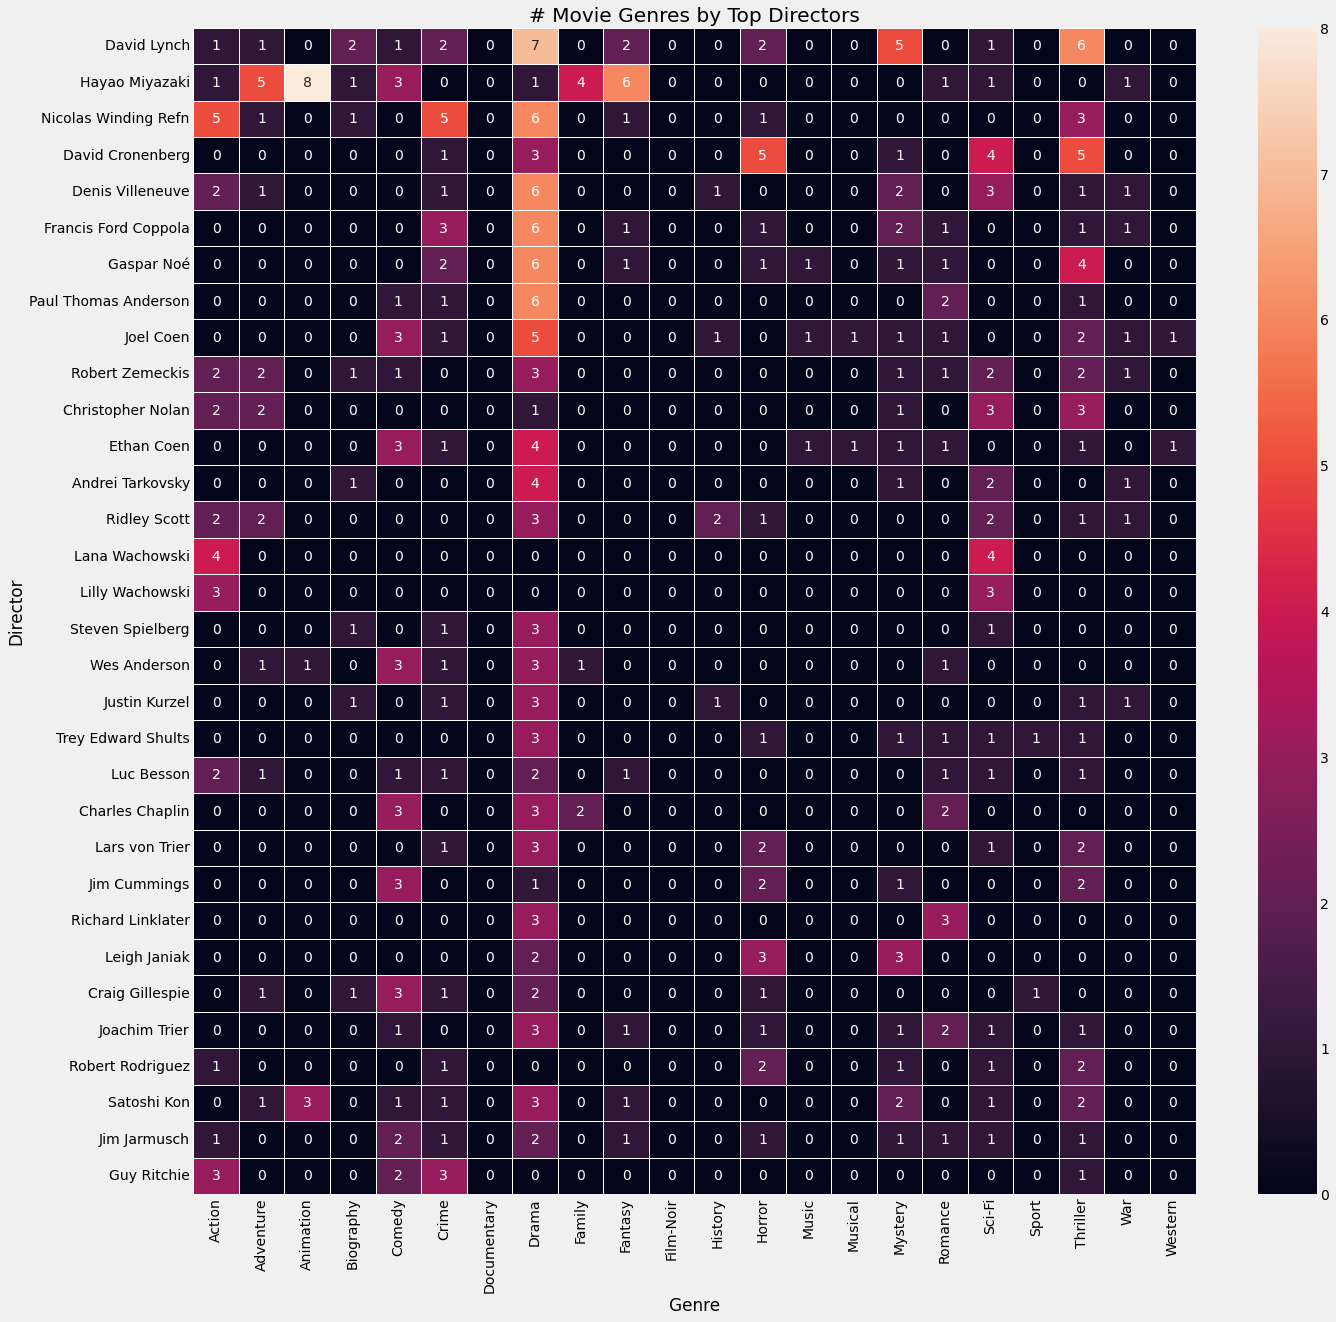

In [131]:
# Plot
_, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(ct_director_genre, annot=True, fmt="d", linewidths=.5, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90) 
plt.title('# Movie Genres by Top Directors');

In [132]:
# search by director
director = 'Joachim Trier'
df[df.Director.str.contains(director)][view_cols].sort_values(by='Timestamp', ascending=False)

Title  Year  Runtime  \
696  The Worst Person in the World  2021      127   
536                        Reprise  2006      105   
296                         Thelma  2017      116   

                                                 Genre       Director  \
696                             Comedy, Drama, Romance  Joachim Trier   
536                                              Drama  Joachim Trier   
296  Drama, Fantasy, Horror, Mystery, Romance, Sci-...  Joachim Trier   

                                                Actors  \
696  Renate Reinsve, Anders Danielsen Lie, Maria Gr...   
536  Anders Danielsen Lie, Espen Klouman Høiner, Vi...   
296  Eili Harboe, Kaya Wilkins, Henrik Rafaelsen, E...   

                                                  Plot            Language  \
696  The chronicles of four years in the life of Ju...           Norwegian   
536  Two competitive friends, fueled by literary as...           Norwegian   
296  A confused religious girl tries to deny her fe...  Norwegian, Swedish   

     Metascore  imdbRating           Timestamp  
696         89         8.0 2022-01-18 23:15:20  
536         79         7.3 2021-09-24 23:05:59  
296         74         7.0 2021-02-01 21:08:00

In [133]:
# Director average votes by movie
cols = ['Title','Director','imdbVotes']
df_director_votes = df[cols].copy()
df_director_votes = df_director_votes[~df_director_votes.duplicated(['Title','Director'], keep='first')]

df_director_votes.Director = df_director_votes.Director.str.split(',').apply(lambda x: [e.strip() for e in x])
df_director_votes = explode(df_director_votes, ['Director'])

df_director_votes = get_mean_value(df_director_votes, 'Director', 'imdbVotes')
df_director_votes['imdbVotes'] = df_director_votes.Total * df_director_votes.imdbVotes

# Most votes
show_all(df_director_votes[df_director_votes.Total > 1].nlargest(N, 'imdbVotes', keep='all'))

In [134]:
# Fewer votes
show_all(df_director_votes[df_director_votes.Total > 1].nsmallest(N, 'imdbVotes', keep='all'))

## Writer

In [135]:
len(counter_display(df,'Writer','Title', None).index)

1095

In [136]:
# Highest rating writers
df_writer = df.copy() #[~df.Genre.str.contains('Documentary')].reset_index(drop=True)
df_writer = df_writer[~df_writer.duplicated(['Title','Writer'], keep='first')]

df_writer.Writer = df_writer.Writer.str.split(',').apply(lambda x: [e.strip() for e in x])
df_writer.Writer = df_writer.Writer.apply(lambda x: list(set(x)))

df_writer_rating = explode(df_writer, ['Writer'])
df_writer_rating = df_writer_rating[~df_writer_rating.Writer.str.startswith('N/A')] # remove 'N/A'

df_writer_rating = get_mean_value(df_writer_rating, 'Writer', 'imdbRating')

# Writer with most movies watched
show_all(df_writer_rating.nlargest(N, 'Total', keep='all'))

In [137]:
# Writer with highest average rating, by movies watched (greater than 2)
show_all(df_writer_rating[df_writer_rating.Total > 2].nlargest(N, 'imdbRating', keep='all'))

In [138]:
df_director_writer = df[~df.Genre.str.contains('Documentary')].copy()

# Number of movies where the director was also the writer 
len(df_director_writer[df_director_writer.Director == df_director_writer.Writer])

180

In [139]:
# Top Director/Writer
df_director_writer = df[['Title','Director','Writer']].copy()
df_director_writer = df_director_writer[~df_director_writer.duplicated(['Title','Writer'], keep='first')]

## solo director/writer
#show_all(df_director_writer[df_director_writer.Director == df_director_writer.Writer].groupby('Director').agg({'Title':['count', list]}).sort_values(('Title','count'), ascending=False).nlargest(10,('Title','count'), keep='all'))

# team work
df_director_writer.Director = df_director_writer.Director.str.split(',').apply(lambda x: [e.strip() for e in x])
df_director_writer = explode(df_director_writer, ['Director'])
df_director_writer.Writer = df_director_writer.Writer.str.split(',').apply(lambda x: [e.strip() for e in x])
df_director_writer = explode(df_director_writer, ['Writer'])

gb_director_writer = df_director_writer[df_director_writer.Director == df_director_writer.Writer].groupby('Director').agg({'Title':['count', list]})
show_all(gb_director_writer.nlargest(N,('Title','count'), keep='all'))

## Cinematographers

In [140]:
## NOTE:
# IMDb request stopped giving information about Cinematographers

In [141]:
len(counter_display(df, 'Cinematographers', 'Title', None).index)

553

In [142]:
# Cinematographers average
cols = ['Title','Cinematographers','imdbRating']
df_cinema = df[cols].copy()
df_cinema = df_cinema[~df_cinema.duplicated(['Title','Cinematographers'], keep='first')]
df_cinema = df_cinema[~df_cinema.Cinematographers.str.startswith('nan')] # remove nan

# Cinematographers / ratings
df_cinema_rating = get_mean_value(df_cinema, 'Cinematographers', 'imdbRating')
df_cinema_rating = df_cinema_rating.drop(index='N/A')

#counter_display(df, 'Cinematographers', 'Title', n)
cin_list = df_cinema_rating.nlargest(N, 'Total', keep='all').index.values
show_all(df_cinema_rating.nlargest(N, 'Total', keep='all'))

In [143]:
# Highest rating Cinematographers
show_all(df_cinema_rating[df_cinema_rating.Total > 2].nlargest(N, 'imdbRating', keep='all'))

In [144]:
# Lowest rating Cinematographers
show_all(df_cinema_rating[df_cinema_rating.Total > 1].nsmallest(N, 'imdbRating', keep='all'))

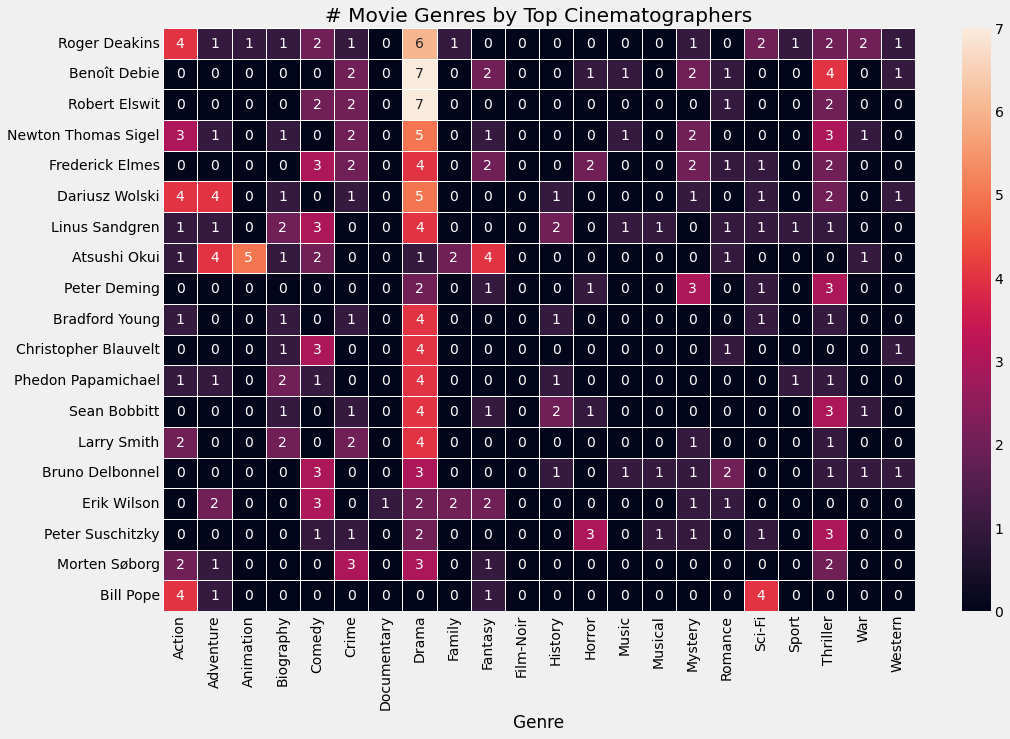

In [145]:
# Genre by Cinematographers
cols = ['Title','Cinematographers','Genre']
df_explode_cinema = df[cols].copy()

df_explode_cinema.Genre = df_explode_cinema.Genre.str.split(',').apply(lambda x: [e.strip() for e in x])
df_explode_cinema.Cinematographers = df_explode_cinema.Cinematographers.str.split(',').apply(lambda x: [e.strip() for e in x])

df_explode_cinema = explode(df_explode_cinema, ['Genre'])
df_explode_cinema = explode(df_explode_cinema, ['Cinematographers'])

cinema_movies = counter_display(df, 'Cinematographers', 'Title', N).index
ct_cinema_genre = pd.crosstab(df_explode_cinema.Cinematographers, df_explode_cinema.Genre).loc[cinema_movies].iloc[1:,:]
#show_all(ct_director_genre.loc[director_movies])

# Plot
_, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(ct_cinema_genre, annot=True, fmt="d", linewidths=.5, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.title('# Movie Genres by Top Cinematographers');

In [146]:
# Most common pair cinematographer - director
cols = ['Title','Director','Cinematographers','imdbRating']
df_cin_dir = df[cols].copy()
df_cin_dir = df_cin_dir[~df_cin_dir.duplicated(['Title','Cinematographers'], keep='first')]
df_cin_dir = df_cin_dir[~df_cin_dir.Cinematographers.str.startswith('nan')] # remove nan

gb_cin_dir = df_cin_dir.groupby(['Cinematographers','Director']).agg({'Title':['count',list]})
show_all(gb_cin_dir.nlargest(N, ('Title','count'),keep='all'))

In [147]:
# More than 1 movie per pair
gb_cin_dir[gb_cin_dir[('Title','count')] > 1]

Title  \
                                                     count   
Cinematographers     Director                                
Aaron Moorhead       Justin Benson, Aaron Moorhead       2   
Adam Arkapaw         Justin Kurzel                       2   
Alan Stewart         Guy Ritchie                         2   
Andrew Droz Palermo  David Lowery                        2   
André Turpin         Denis Villeneuve                    2   
Atsushi Okui         Hayao Miyazaki                      4   
Benoît Debie         Gaspar Noé                          4   
Bill Pope            Lana Wachowski, Lilly Wachowski     3   
Bruno Delbonnel      Ethan Coen, Joel Coen               2   
Caleb Heymann        Leigh Janiak                        3   
Dante Spinotti       Michael Mann                        2   
Dariusz Wolski       Ridley Scott                        2   
Don Burgess          Robert Zemeckis                     2   
Drew Daniels         Trey Edward Shults                  3   
Eric Steelberg       Jason Reitman                       2   
Erik Wilson          Paul King                           2   
Freddie Francis      David Lynch                         3   
Frederick Elmes      David Lynch                         2   
                     Jim Jarmusch                        2   
Giles Nuttgens       David Mackenzie                     2   
Gordon Willis        Francis Ford Coppola                3   
Hoyte Van Hoytema    Christopher Nolan                   2   
Jakob Ihre           Joachim Trier                       2   
Janusz Kaminski      Steven Spielberg                    2   
Jarin Blaschke       Robert Eggers                       2   
Keegan Kuhn          Kip Andersen, Keegan Kuhn           2   
Larry Smith          Nicolas Winding Refn                2   
Laurie Rose          Ben Wheatley                        2   
Lee Daniel           Richard Linklater                   2   
Linus Sandgren       Damien Chazelle                     2   
Mark Irwin           David Cronenberg                    3   
Mauro Fiore          Antoine Fuqua                       2   
Michael McDonough    Debra Granik                        2   
Michael Ragen        Riley Stearns                       2   
Morten Søborg        Nicolas Winding Refn                4   
Newton Thomas Sigel  Bryan Singer                        2   
Nicholas D. Knowland Peter Strickland                    2   
Nicolas Karakatsanis Craig Gillespie                     2   
Peter Deming         David Lynch                         2   
Peter Suschitzky     David Cronenberg                    3   
Robert D. Yeoman     Wes Anderson                        2   
Robert Elswit        Paul Thomas Anderson                5   
Roger Deakins        Ethan Coen, Joel Coen               2   
Ryan Samul           Jim Mickle                          2   
Sayombhu Mukdeeprom  Luca Guadagnino                     2   
Steven Soderbergh    Steven Soderbergh                   2   
Thierry Arbogast     Luc Besson                          2   
Wally Pfister        Christopher Nolan                   2   

                                                                                                         
                                                                                                   list  
Cinematographers     Director                                                                            
Aaron Moorhead       Justin Benson, Aaron Moorhead                            [The Endless, Synchronic]  
Adam Arkapaw         Justin Kurzel                                      [The Snowtown Murders, Macbeth]  
Alan Stewart         Guy Ritchie                                          [The Gentlemen, Wrath of Man]  
Andrew Droz Palermo  David Lowery                                     [A Ghost Story, The Green Knight]  
André Turpin         Denis Villeneuve                                            [Incendies, Maelstrom]  
Atsushi Okui         Hayao Miyazaki       

## Actors

In [148]:
df_actors = counter_display(df, 'Actors', 'Title', None)

# Number of actors
len(df_actors.index)

33126

In [149]:
# Top N actors
df_top_actors = df_actors.copy() #.nlargest(N, 'Title', keep='all')
df_top_actors.head(N)

Title
Mark Falvo                 16
Arnold Montey              15
Willem Dafoe               14
Bill Murray                11
Rosemary Howard            11
Ryan Gosling               11
Jimmy Star                  9
Keanu Reeves                9
Philip Seymour Hoffman      9
Timothée Chalamet           9

In [150]:
start_time = time.time()

# Get list of top n actors
list_top_actors = df_top_actors.index.values

# Filter dataset
cols = ['Title','Year','Genre','Actors','imdbRating']
condition = 'Documentary'
query = "Genre not in '" + condition + "'"

df_top_actors_rat = df[cols].query(query).copy()

## filtering by list of top actors
#df_top_actors_rat = df_top_actors_rat[df_top_actors_rat['Actors'].apply(lambda x: any([person in x for person in list_top_actors]))]
df_top_actors_rat.drop_duplicates(subset=['Title','Year'], keep='first', inplace=True)

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.007001161575317383 seconds ---


In [151]:
start_time = time.time()

df_actor_rating = get_mean_value(df_top_actors_rat, 'Actors', 'imdbRating')

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.5279960632324219 seconds ---


In [152]:
# Actors with most movies watched
show_all(df_actor_rating.nlargest(N, 'Total', keep='all'))

In [153]:
# Highest rating actors
show_all(df_actor_rating[df_actor_rating.Total > 2].nlargest(N, 'imdbRating', keep='all'))

In [154]:
# Lowest rating actors
show_all(df_actor_rating[df_actor_rating.Total > 1].nsmallest(N, 'imdbRating', keep='all'))

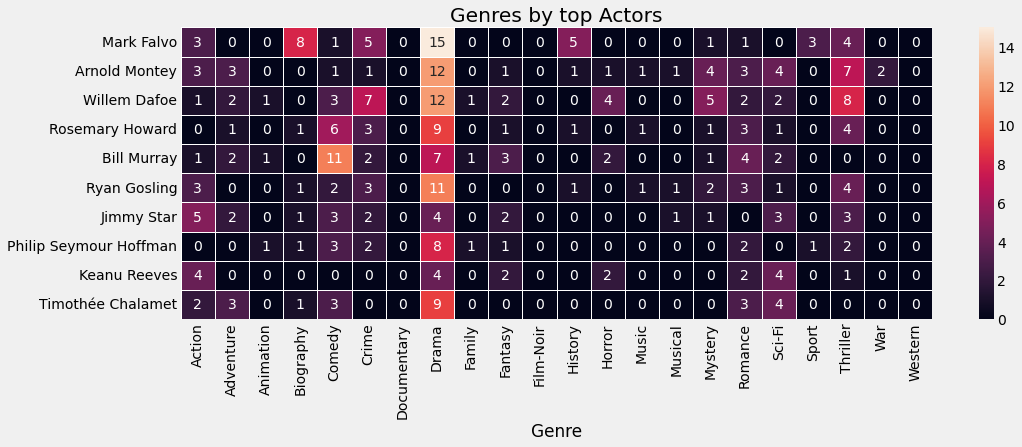

In [155]:
# Genre by Actor
cols = ['Title','Actors','Genre']
df_explode_actor = df[cols].copy()

df_explode_actor.Genre = df_explode_actor.Genre.str.split(',').apply(lambda x: [e.strip() for e in x])
df_explode_actor.Actors = df_explode_actor.Actors.str.split(',').apply(lambda x: [e.strip() for e in x])

df_explode_actor = explode(df_explode_actor, ['Genre'])
df_explode_actor = explode(df_explode_actor, ['Actors'])

actor_movies = counter_display(df, 'Actors', 'Title', N).index
ct_actor_genre = pd.crosstab(df_explode_actor.Actors, df_explode_actor.Genre).loc[actor_movies]
#show_all(ct_director_genre.loc[director_movies])

# Plot
_, ax = plt.subplots(figsize=(15, 5))

plt.title('Genres by top Actors')
ax = sns.heatmap(ct_actor_genre, annot=True, fmt="d", linewidths=.5, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);

In [156]:
# Top actor in each genre
df_genre_top_actor = df_explode_actor.groupby(['Actors','Genre']).agg({'Title':['nunique',list]}).sort_values(('Title','nunique'), ascending=False).reset_index()
df_genre_top_actor = df_genre_top_actor.groupby('Genre').apply(lambda x: x.nlargest(1, ('Title','nunique'), keep='first'))
df_genre_top_actor = df_genre_top_actor.droplevel(1).drop('Genre', axis=1)

show_all(df_genre_top_actor)

In [157]:
## search by specific actor
#df[df.Actors.str.contains('Tom Holland')] # Tom Holland != Tom Hollander

## Country

In [158]:
# Number of different countries
country_counter = counter_display(df, 'Country', 'Title', None)

len(country_counter.index)

61

In [159]:
# Top countries
counter_display(df, 'Country', 'Title', N)

Title
United States     486
United Kingdom    154
France             96
Canada             65
Germany            44
Japan              28
Denmark            26
Spain              23
Australia          21
Sweden             20

In [160]:
# Country average rating
df_country = get_mean_value(df, 'Country', 'imdbRating')

pct50 = country_counter.quantile(0.5)[0]
df_country = df_country[df_country.Total > pct50].nlargest(N, 'imdbRating', keep='all')
show_all(df_country)

In [161]:
# Country of last watched movies
cols = ['Title','Year','Country']
df[cols].tail(N)

Title  Year  \
718              Nightmare Alley  2021   
719                    Old Henry  2021   
720  We Need to Talk About Kevin  2011   
721                      Annette  2021   
722               Blue Valentine  2010   
723                      Amadeus  1984   
724                    Swan Song  2021   
725                 King Richard  2021   
726                         Flee  2021   
727           Last and First Men  2020   

                                               Country  
718                              United States, Mexico  
719                                      United States  
720                      United Kingdom, United States  
721  France, Belgium, Germany, United States, Japan...  
722                                      United States  
723                              United States, France  
724                                      United States  
725                                      United States  
726  Denmark, Sweden, Norway, France, United States...  
727                                            Iceland

## Language

In [162]:
# Number of different languages
language_counter = counter_display(df, 'Language', 'Title', None)

len(language_counter.index)

88

In [163]:
# Top languages
counter_display(df, 'Language', 'Title', N)

Title
English     608
French      107
Spanish      87
German       52
Italian      40
Japanese     40
Russian      30
Arabic       21
Mandarin     20
Latin        19
Korean       19

In [164]:
# Most watched genres, with rating and worst/best movie from each genre
[
    [
        print(year),
        print(str(len(df[df.Date.dt.year == year])) + ' movies'),
        show_all(counter_display(df[df.Date.dt.year == year], 'Language', 'Title', N)),
        print('\n'),
    ]
    for year in years
];

2020
252 movies




2021
405 movies




2022
62 movies


In [165]:
# Language of last watched movies
cols = ['Title','Year','Language']
df[cols].tail(N)

Title  Year  \
718              Nightmare Alley  2021   
719                    Old Henry  2021   
720  We Need to Talk About Kevin  2011   
721                      Annette  2021   
722               Blue Valentine  2010   
723                      Amadeus  1984   
724                    Swan Song  2021   
725                 King Richard  2021   
726                         Flee  2021   
727           Last and First Men  2020   

                                    Language  
718                                  English  
719                         English, Spanish  
720                                  English  
721                                  English  
722                                  English  
723          English, Italian, Latin, German  
724                                  English  
725                                  English  
726  Danish, English, Dari, Russian, Swedish  
727                                  English

## Rating

In [166]:
# Example
# https://codingnomads.co/blog/data-analysis-example-analyzing-movie-ratings-with-python/

In [167]:
df[['imdbRating', 'Metascore']][df.Metascore != 0].describe().round(2)

imdbRating  Metascore
count      632.00     632.00
mean         7.15      71.01
std          0.67      12.69
min          3.70       9.00
25%          6.70      64.00
50%          7.20      72.00
75%          7.60      80.00
max          9.20     100.00

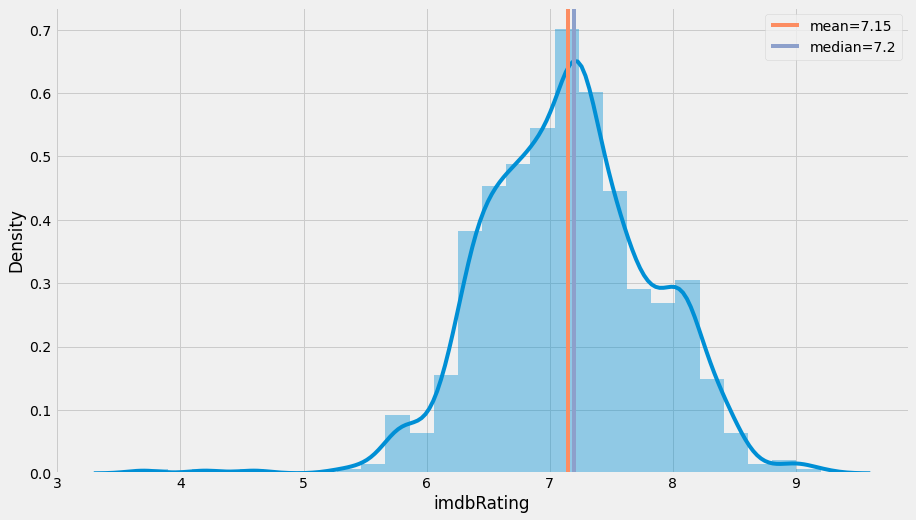

In [168]:
# Plot imdbRating
plt.figure(figsize=(30,8))

plt.subplot(1,2,1)
ax1 = sns.distplot(df.imdbRating, kde_kws=dict(bw=0.2))
ax1.axvline(x=df.imdbRating.mean(), c=sns.color_palette("Set2")[1], label=f"mean={round(df.imdbRating.mean(), 2)}")
ax1.axvline(x=df.imdbRating.median(), c=sns.color_palette("Set2")[2], label=f"median={round(df.imdbRating.median(), 2)}")
plt.legend();

In [169]:
# https://en.wikipedia.org/wiki/Kurtosis
df.imdbRating.kurtosis()

1.1211828987810781

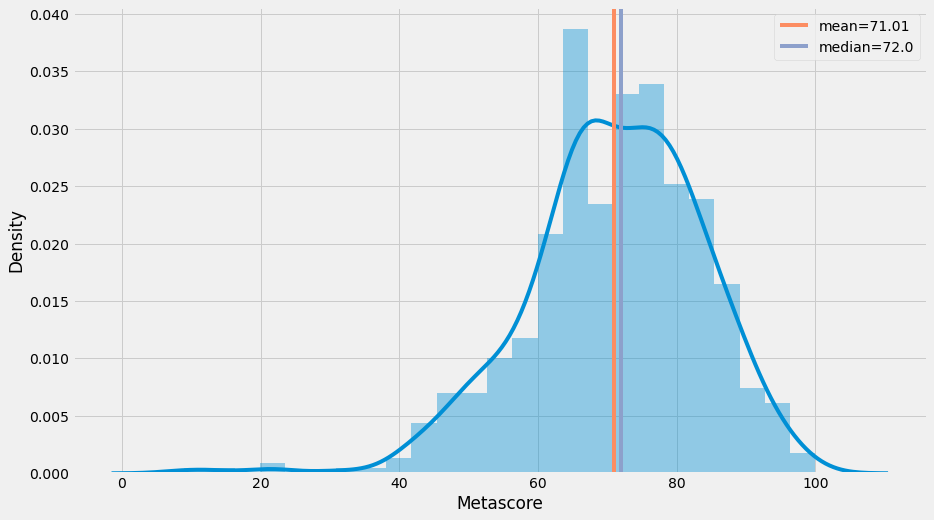

In [170]:
# Plot Metascore
plt.figure(figsize=(30,8))

x_meta = df.Metascore
x_meta.replace('N/A', 0, regex=True, inplace=True)
x_meta = df[df.Metascore != 0].Metascore

plt.subplot(1,2,1)
ax1 = sns.distplot(x_meta) #, kde_kws=dict(bw=0.2))
ax1.axvline(x=x_meta.mean(), c=sns.color_palette("Set2")[1], label=f"mean={round(x_meta.mean(), 2)}")
ax1.axvline(x=x_meta.median(), c=sns.color_palette("Set2")[2], label=f"median={round(x_meta.median(), 2)}")
plt.legend();

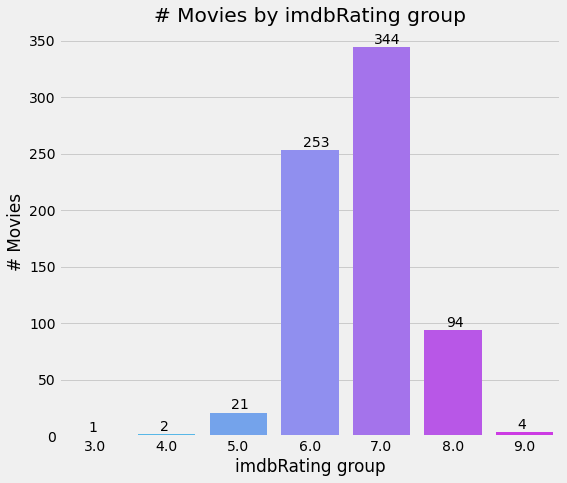

In [171]:
# Number of movies by imdbRating group
df_rating = df[['Title', 'imdbRating']]
df_rating_group = df_rating.groupby((df_rating.imdbRating//1)).agg({'Title': 'count'})
x = df_rating_group.index
y = df_rating_group.Title

plt.figure(figsize=(8,7))
sns.barplot(x=x, y=y, palette="cool");

for i, rate in enumerate(y):
    plt.text(i-0.1, rate+3, rate)

plt.title('# Movies by imdbRating group')
plt.xlabel('imdbRating group')
plt.ylabel('# Movies')
plt.show()

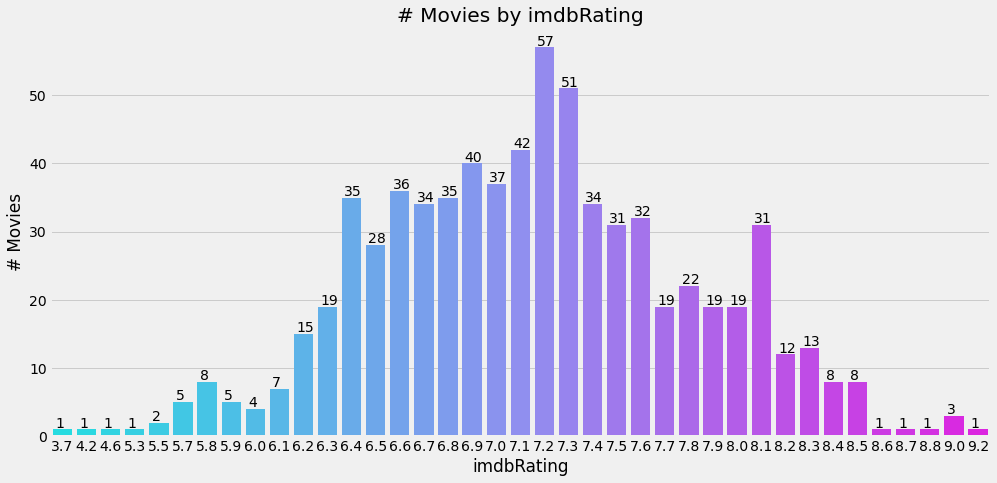

In [172]:
df_rating_float = df_rating.groupby((df_rating.imdbRating)).agg({'Title': 'count'})
x = np.round(df_rating_float.index, 1)
y = df_rating_float.Title

plt.figure(figsize=(15,7))
sns.barplot(x=x, y=y, palette="cool");

for i, rate in enumerate(y):
    plt.text(i-0.3, rate+0.3, rate)

plt.title('# Movies by imdbRating')
plt.ylabel('# Movies')
plt.show()

In [173]:
# search by rating
rating = 6
df[df.imdbRating < rating][['Title','Runtime','imdbRating']].sort_values(by='imdbRating')

Title  Runtime  imdbRating
63                            The Room       99         3.7
711         Prisoners of the Ghostland      103         4.2
74      The First Temptation of Christ       46         4.6
39                            Geostorm      109         5.3
75                  The Dead Don't Die      104         5.5
325                 Willy's Wonderland       88         5.5
659           The Matrix Resurrections      148         5.7
637                  Only God Forgives       90         5.7
559                        Fried Barry       99         5.7
528             A Classic Horror Story       95         5.7
421                   Army of the Dead      148         5.7
684                         Lost River       95         5.8
631                           PVT CHAT       86         5.8
401       The Babysitter: Killer Queen      101         5.8
710               The Greasy Strangler       93         5.8
357                          High Life      113         5.8
330                           Vivarium       97         5.8
203  An Evening with Beverly Luff Linn      108         5.8
72                    The Little Hours       90         5.8
518           The Blackcoat's Daughter       93         5.9
544                         Underwater       95         5.9
386                          Hagazussa      102         5.9
339               Expedition Happiness       95         5.9
511                           The Void       90         5.9

In [174]:
# movies watched this year below rating (see above)
df[df.Date.dt.year == now.year][df.imdbRating < rating][['Title','Runtime','imdbRating']].sort_values(by='imdbRating')

Title  Runtime  imdbRating
711  Prisoners of the Ghostland      103         4.2
684                  Lost River       95         5.8
710        The Greasy Strangler       93         5.8

In [175]:
# Movies with highest rating watched this year
this_year = now.year #df.Date.dt.year.unique()[-1]

df_this_year = df[df.Date.dt.year == this_year][view_cols] #.sort_values('imdbRating', ascending=False)
# no documentaries, no duplicated
df_this_year = df_this_year[~df_this_year.Genre.str.contains('Documentary')][~df.duplicated(['Title','Year'], keep='last')]
df_this_year.nlargest(N, 'imdbRating', keep='all')

Title  Year  Runtime  \
665                   Interstellar  2014      169   
676                    City Lights  1931       87   
680                   Modern Times  1936       87   
671                        The Kid  1921       68   
723                        Amadeus  1984      160   
667                   Sherlock Jr.  1924       45   
668                    The General  1926       67   
681                  The Third Man  1949      104   
678                       Sin City  2005      124   
694                    The Martian  2015      144   
696  The Worst Person in the World  2021      127   

                                     Genre  \
665               Adventure, Drama, Sci-Fi   
676                 Comedy, Drama, Romance   
680         Comedy, Drama, Family, Romance   
671                  Comedy, Drama, Family   
723                Biography, Drama, Music   
667                Action, Comedy, Romance   
668  Action, Adventure, Comedy, Drama, War   
681           Film-Noir, Mystery, Thriller   
678                        Crime, Thriller   
694               Adventure, Drama, Sci-Fi   
696                 Comedy, Drama, Romance   

                                              Director  \
665                                  Christopher Nolan   
676                                    Charles Chaplin   
680                                    Charles Chaplin   
671                                    Charles Chaplin   
723                                       Milos Forman   
667                                      Buster Keaton   
668                      Clyde Bruckman, Buster Keaton   
681                                         Carol Reed   
678  Frank Miller, Quentin Tarantino, Robert Rodriguez   
694                                       Ridley Scott   
696                                      Joachim Trier   

                                                Actors  \
665  Ellen Burstyn, Matthew McConaughey, Mackenzie ...   
676  Virginia Cherrill, Florence Lee, Harry Myers, ...   
680  Charles Chaplin, Paulette Goddard, Henry Bergm...   
671  Charles Chaplin, Jackie Coogan, Carl Miller, E...   
723  F. Murray Abraham, Tom Hulce, Elizabeth Berrid...   
667  Buster Keaton, Kathryn McGuire, Joe Keaton, Er...   
668  Buster Keaton, Marion Mack, Glen Cavender, Jim...   
681  Joseph Cotten, Alida Valli, Orson Welles, Trev...   
678  Jessica Alba, Devon Aoki, Alexis Bledel, Power...   
694  Matt Damon, Jessica Chastain, Kristen Wiig, Je...   
696  Renate Reinsve, Anders Danielsen Lie, Maria Gr...   

                                                  Plot  \
665  A team of explorers travel through a wormhole ...   
676  With the aid of a wealthy erratic tippler, a d...   
680  The Tramp struggles to live in modern industri...   
671  The Tramp cares for an abandoned child, but ev...   
723  The life, success and troubles of Wolfgang Ama...   
667  A film projectionist longs to be a detective, ...   
668  After being rejected by the Confederate milita...   
681  Pulp novelist Holly Martins travels to shadowy...   
678  An exploration of the dark and miserable Basin...   
694  An astronaut becomes stranded on Mars after hi...   
696  The chronicles of four years in the life of Ju...   

                             Language  Metascore  imdbRating  \
665                           English         74         8.6   
676                     None, English         99         8.5   
680                           English         96         8.5   
671                           English          0         8.3   
723   English, Italian, Latin, German         88         8.3   
667                     None, English          0         8.2   
668                           English          0         8.1   
681  English, German, Russian, French         97         8.1   
678                           English         74         8.0   
694                 English, Mandarin         80         8.0   
696                         Norwegian       

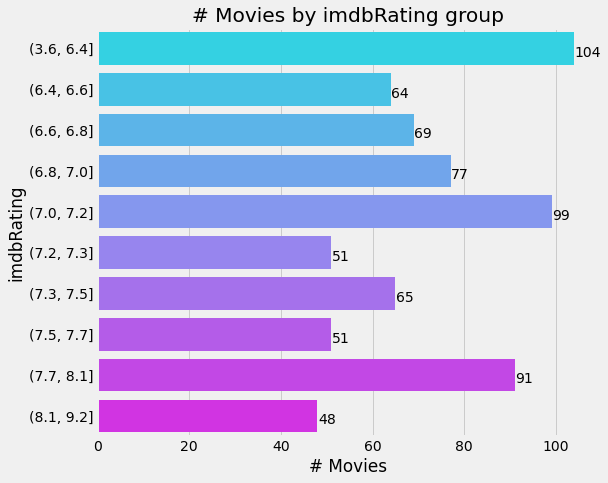

In [176]:
# Number of movies by imdbRating group
df_rating = df[['Title', 'imdbRating']]

# Or check this
# https://medium.com/analytics-vidhya/exploratory-data-analysis-imdb-dataset-cff0c3991ad5
[groups, edges] = pd.qcut(df_rating.imdbRating, 10, precision=1, retbins=True)
ratings_avg = df_rating.groupby(groups).agg({"Title": 'count'})

plt.figure(figsize=(8,7))
sns.barplot(y=ratings_avg.index, x=ratings_avg.Title, palette='cool')
plt.title('# Movies by imdbRating group')
plt.xlabel('# Movies')

for i, rate in enumerate(ratings_avg["Title"]):
    plt.text(rate+0.1, i+0.2, rate)

plt.show()

### Hidden Gems

In [177]:
# Select columns and data
cols = ['Title','Year','Runtime','Genre','Metascore','imdbRating','imdbVotes','Date']
df_hidden_gems = df[cols].copy()

# General filter
df_hidden_gems = df_hidden_gems[df_hidden_gems.Year < now.year-1]
df_hidden_gems = df_hidden_gems[~df_hidden_gems.Genre.str.contains('Documentary')]

df_hidden_gems['Metascore'].replace('N/A', 0, regex=True, inplace=True)
df_hidden_gems['Metascore'] = df_hidden_gems['Metascore'].astype(int)

#
df_hidden_gems['Rate20'] = df_hidden_gems['imdbRating'] + (df_hidden_gems['Metascore'] / 10)
#
df_hidden_gems_stats = df_hidden_gems.describe().round(1)
cols = df_hidden_gems_stats.columns.values
cols = np.delete(cols, [3,5])
df_hidden_gems_stats[cols] = df_hidden_gems_stats[cols].astype(int)
df_hidden_gems_stats

Year  Runtime  Metascore  imdbRating  imdbVotes  Rate20
count   593      593        593       593.0        593   593.0
mean   2008      109         63         7.1     145888    13.5
std      14       21         25         0.7     236272     2.8
min    1921       41          0         3.7        655     4.6
25%    2004       95         60         6.7      18324    12.8
50%    2015      106         69         7.1      64621    14.0
75%    2019      121         79         7.6     167648    15.2
max    2020      209        100         9.2    2220922    19.2

In [178]:
# Filter by number of votes and rating
vote_qtl = df_hidden_gems.imdbVotes.quantile(0.25)
rate20_qtl = df_hidden_gems.Rate20.quantile(0.5)

df_hidden_gems = df_hidden_gems[df_hidden_gems.imdbVotes < vote_qtl][df_hidden_gems.Rate20 > rate20_qtl]

In [179]:
# Hidden gems watched by Year
[
    [
        print(str(year)),
        show_all(df_hidden_gems[df_hidden_gems.Date.dt.year == year].nlargest(20, 'Rate20', keep='all')),
        print('\n')
    ] for year in years
];

2020




2021




2022


### Runtime / imdbRating

In [180]:
# Correlation?
df[['Runtime','imdbRating']].corr(method='pearson').round(2)

Runtime  imdbRating
Runtime        1.00        0.24
imdbRating     0.24        1.00

In [181]:
df_runtime_rating = df[['Runtime','imdbRating']]
df_runtime_rating.describe().round(1)

Runtime  imdbRating
count    719.0       719.0
mean     109.0         7.1
std       21.2         0.7
min       40.0         3.7
25%       95.0         6.7
50%      106.0         7.2
75%      121.0         7.6
max      209.0         9.2

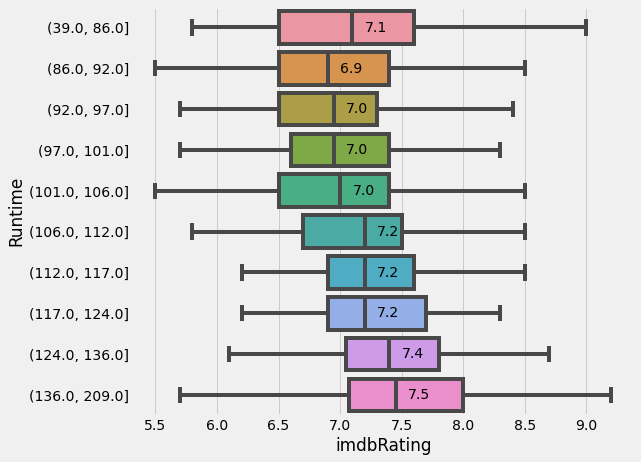

In [182]:
# https://medium.com/analytics-vidhya/exploratory-data-analysis-imdb-dataset-cff0c3991ad5
[groups, edges] = pd.qcut(df_runtime_rating.Runtime, 10, precision=0, retbins=True)
ratings_avg = df_runtime_rating.groupby(groups).agg({"imdbRating": np.median})

plt.figure(figsize=(8,7))
sns.boxplot(y=groups, x="imdbRating", data=df_runtime_rating, orient="h", showfliers=False)

for i, rate in enumerate(ratings_avg["imdbRating"]):
    plt.text(rate+0.1, i+0.1, round(rate,1))

plt.show()

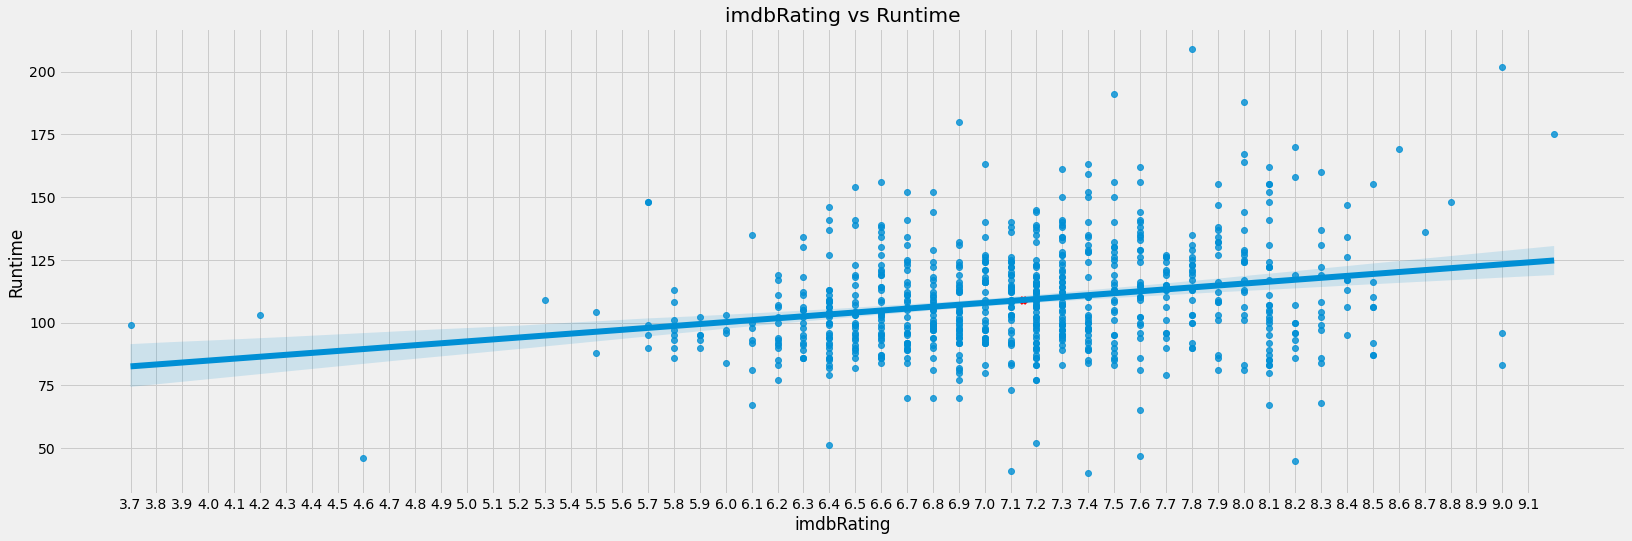

In [183]:
# Movie centroid based on runtime and imdbRating
x = df_runtime_rating.imdbRating
y = df_runtime_rating.Runtime
centroid = df_runtime_rating.mean(axis=0) # centroid

plt.figure(figsize=(25, 8))
plt.title('imdbRating vs Runtime')
    
sns.regplot(x=x, y=y); 
plt.scatter(centroid[1], centroid[0], color='r', marker='x');
plt.xticks(np.arange(x.min(), x.max(), step=0.1))
plt.show()

In [184]:
# https://stackoverflow.com/questions/45418353/get-nearest-coordinates-from-pandas-df-from-centroid-of-coordinates

# The center will just be the average x and y 
# plotme.sub(plotme.mean()).pow(2).sum(1).idxmin()
#df.loc[plotme.loc[[plotme.sub(plotme.mean()).pow(2).sum(1).idxmin()]].index]

centroid

Runtime       108.980529
imdbRating      7.148957
dtype: float64

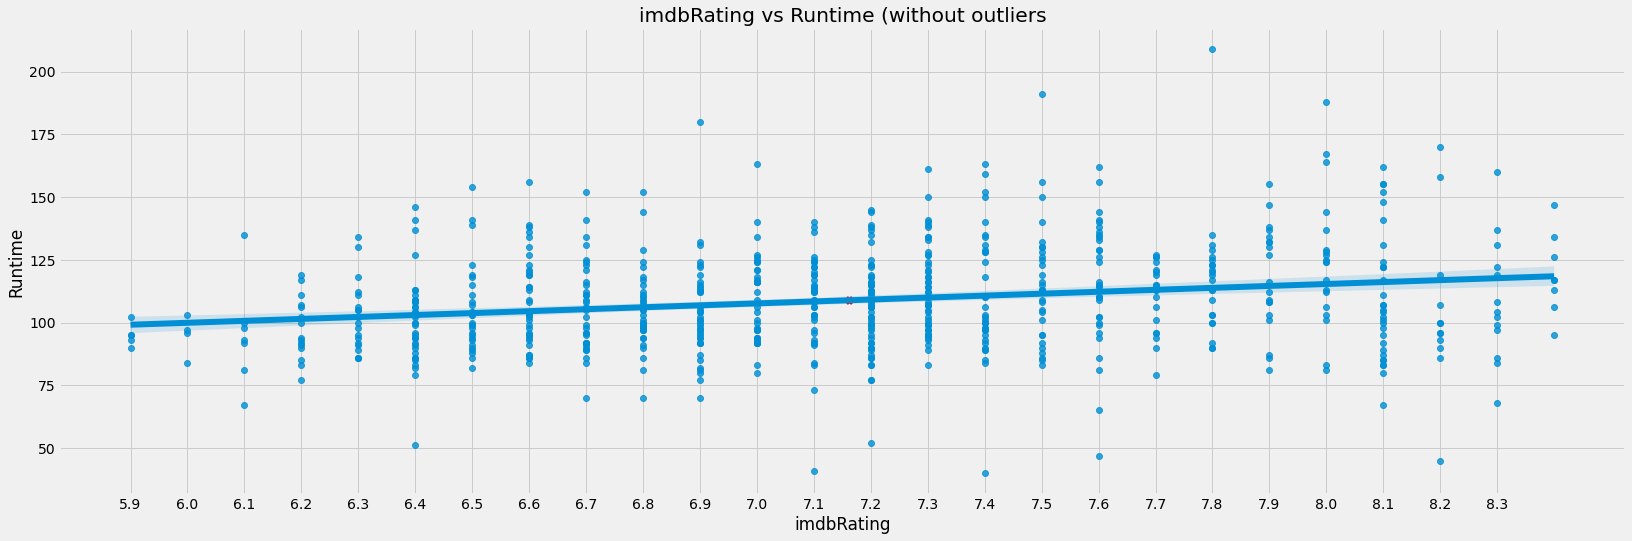

In [185]:
# https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame
# Movie centroid based on runtime and imdbRating
# without outliers
df_runtime_rating = df_runtime_rating[np.abs(df_runtime_rating.imdbRating - df_runtime_rating.imdbRating.mean())
                                      <= (2*df_runtime_rating.imdbRating.std())] # 2 std

x = df_runtime_rating.imdbRating
y = df_runtime_rating.Runtime
centroid = df_runtime_rating.mean(axis=0) # centroid

plt.figure(figsize=(25, 8))
plt.title('imdbRating vs Runtime (without outliers')

sns.regplot(x=x, y=y); 
plt.scatter(centroid[1], centroid[0], color='r', marker='x');
plt.xticks(np.arange(x.min(), x.max(), step=0.1))
plt.show()

In [186]:
# There's no big difference without outliers
centroid

Runtime       108.871533
imdbRating      7.162190
dtype: float64

In [187]:
# Movie closer to centroid, based on runtime and imdbRating
# sub - subtract mean runtime and rating values
# pow - exponential power
# sum - sum both columns (runtime, imdbRating)
# idxmin - get id of min value
id_min_diff = df_runtime_rating.sub(df_runtime_rating.mean()).pow(2).sum(1).idxmin()
df.loc[df_runtime_rating.loc[[id_min_diff]].index]

Title  Year Rated  Runtime             Genre      Director  \
317  Leave No Trace  2018    PG      109  Adventure, Drama  Debra Granik   

                                       Writer   Cinematographers  \
317  Anne Rosellini, Peter Rock, Debra Granik  Michael McDonough   

                                                Actors  \
317  Thomasin McKenzie, Ben Foster, Jeffery Rifflar...   

                                                  Plot  ...  \
317  A father and his thirteen-year-old daughter ar...  ...   

                                            Production           Timestamp  \
317  BRON Studios, Topic Studios, Harrison Producti... 2021-02-19 23:41:05   

          Date      Time  DateYear Month MonthName Weekday WeekdayName  Day  
317 2021-02-19  23:41:05      2021     2  February       4      Friday   19  

[1 rows x 25 columns]

In [188]:
# Three closest movies to centroid (runtime / rating)
id_min_3diff = df_runtime_rating.sub(df_runtime_rating.mean()).pow(2).sum(1).nsmallest(3).index
df.loc[df_runtime_rating.loc[id_min_3diff].index]

Title  Year  Rated  Runtime  \
317             Leave No Trace  2018     PG      109   
362  Variações: Guardian Angel  2019    N/A      109   
56                 Shéhérazade  2018  TV-MA      109   

                                Genre             Director  \
317                  Adventure, Drama         Debra Granik   
362  Biography, Drama, Music, Romance            João Maia   
56           Drama, Romance, Thriller  Jean-Bernard Marlin   

                                       Writer      Cinematographers  \
317  Anne Rosellini, Peter Rock, Debra Granik     Michael McDonough   
362               Karen Sztajnberg, João Maia      André Szankowski   
56      Jean-Bernard Marlin, Catherine Paillé  Jonathan Ricquebourg   

                                                Actors  \
317  Thomasin McKenzie, Ben Foster, Jeffery Rifflar...   
362  Sérgio Praia, Filipe Duarte, Victoria Guerra, ...   
56   Dylan Robert, Kenza Fortas, Idir Azougli, Lisa...   

                                                  Plot  ...  \
317  A father and his thirteen-year-old daughter ar...  ...   
362  A biopic about António Variações, a famous Por...  ...   
56   Zachary, 17 years old, gets out of jail. Rejec...  ...   

                                            Production           Timestamp  \
317  BRON Studios, Topic Studios, Harrison Producti... 2021-02-19 23:41:05   
362                                     DAVID & GOLIAS 2021-03-28 21:48:01   
56   Geko Films, Arte France Cinéma, Canal+, ARTE, ... 2020-04-13 00:14:11   

          Date      Time  DateYear Month MonthName Weekday WeekdayName  Day  
317 2021-02-19  23:41:05      2021     2  February       4      Friday   19  
362 2021-03-28  21:48:01      2021     3     March       6      Sunday   28  
56  2020-04-13  00:14:11      2020     4     April       0      Monday   13  

[3 rows x 25 columns]

### Metascore / imdbRating

In [189]:
cols = ['Title','Year','Genre','Metascore','imdbRating']
df_metaimdb = df[~df.Metascore.isnull()][cols]
df_metaimdb = df_metaimdb[df_metaimdb.Metascore != 0]
df_metaimdb['Metascore'] = df_metaimdb['Metascore'].fillna(0).astype(int)

# Correlation?
df_metaimdb[['Metascore','imdbRating']].corr(method='pearson').round(2)

Metascore  imdbRating
Metascore         1.0         0.5
imdbRating        0.5         1.0

In [190]:
# Convert Metascore to range 0-10
df_metaimdb['Meta10'] = df_metaimdb['Metascore'] / 10
# Difference between imdbRating and normalized Metascore
df_metaimdb['imdbMeta'] = df_metaimdb['imdbRating'] - df_metaimdb['Meta10']

cols = ['Title','Year','Genre','imdbRating','Meta10','imdbMeta']
df_metaimdb = df_metaimdb[cols]
df_metaimdb['Year'] = df_metaimdb.Year.astype(int)

df_metaimdb[['imdbRating','Meta10','imdbMeta']].describe().round(1)

imdbRating  Meta10  imdbMeta
count       632.0   632.0     632.0
mean          7.2     7.1       0.1
std           0.7     1.3       1.1
min           3.7     0.9      -2.4
25%           6.7     6.4      -0.7
50%           7.2     7.2      -0.1
75%           7.6     8.0       0.7
max           9.2    10.0       5.1

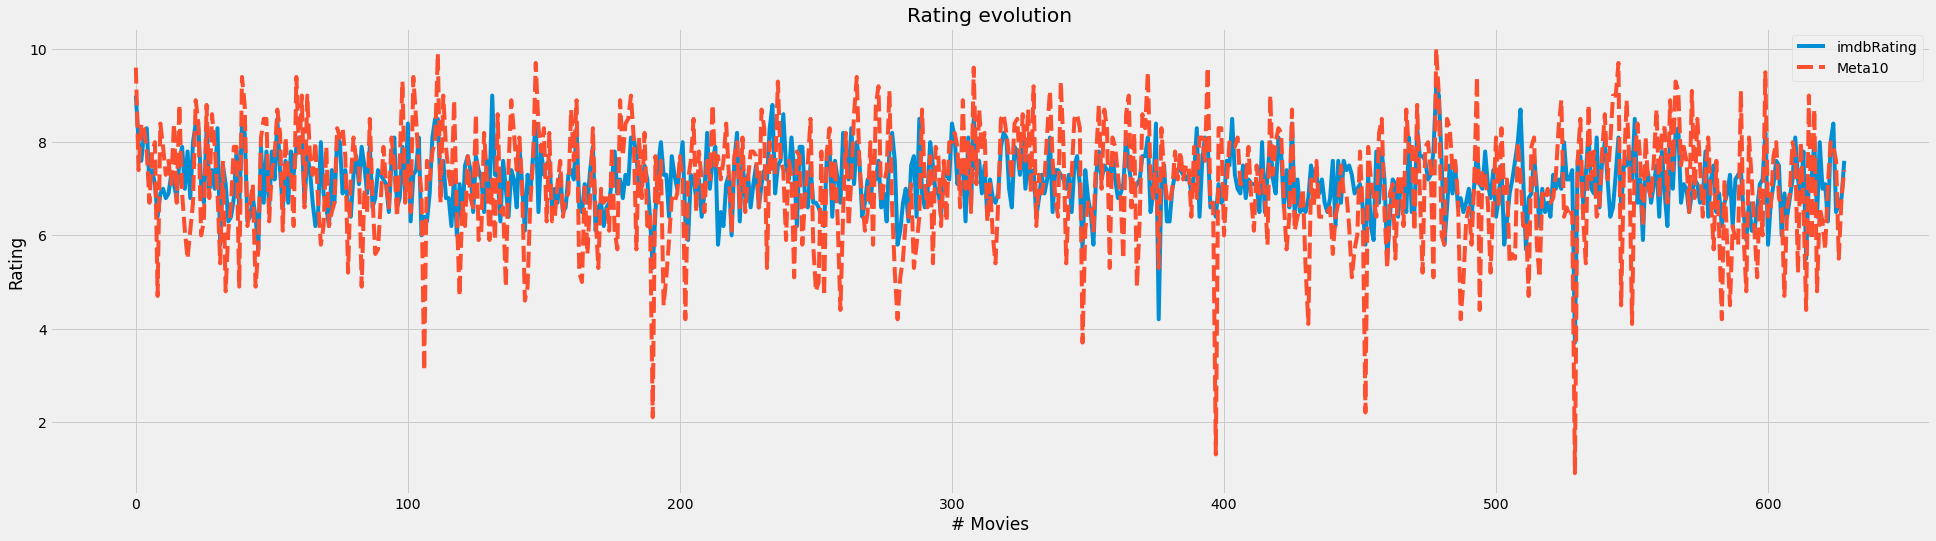

In [191]:
# imdbRating vs Meta10 variance
plot_imdbVSmeta = df_metaimdb[['Title','imdbRating','Meta10']].groupby('Title').mean()
plot_imdbVSmeta = plot_imdbVSmeta.reset_index(drop=True)

plt.figure(figsize=(30,8))
plt.title('Rating evolution')
plt.xlabel('# Movies')
plt.ylabel('Rating')

sns.lineplot(data=plot_imdbVSmeta);

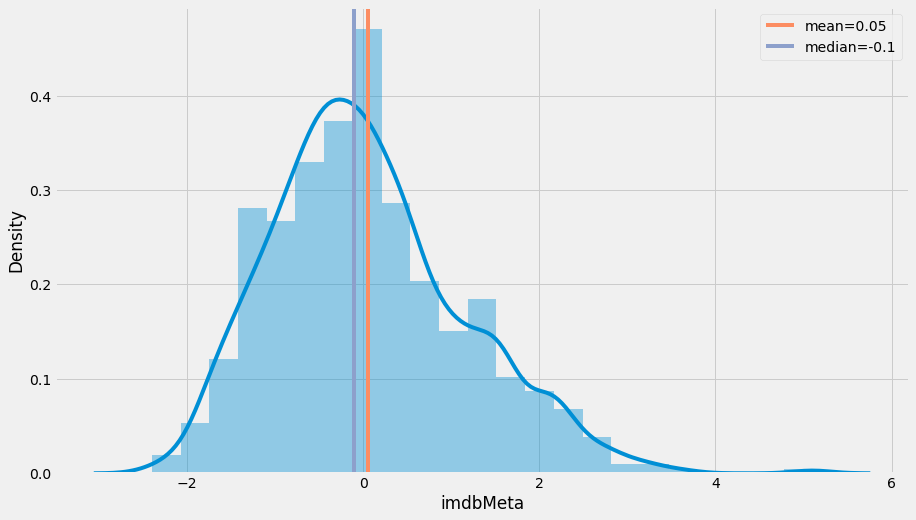

In [192]:
# imdbMeta - difference between imdbRating and Metascore (converted to 0 to 10)
plt.figure(figsize=(30,8))

plt.subplot(1,2,1)
ax1 = sns.distplot(df_metaimdb.imdbMeta, kde_kws=dict(bw=0.2))
ax1.axvline(x=df_metaimdb.imdbMeta.mean(), c=sns.color_palette("Set2")[1], label=f"mean={round(df_metaimdb.imdbMeta.mean(), 2)}")
ax1.axvline(x=df_metaimdb.imdbMeta.median(), c=sns.color_palette("Set2")[2], label=f"median={round(df_metaimdb.imdbMeta.median(), 2)}")
plt.legend();

In [193]:
# Top differences between ratings
df_metaimdb.loc[abs(df_metaimdb.imdbMeta).sort_values(ascending=False).index].nlargest(N, 'imdbMeta', keep='all')

Title  Year  \
483                 Run Hide Fight  2020   
401   The Babysitter: Killer Queen  2020   
182             Charlie Countryman  2013   
39                        Geostorm  2017   
658               The Unforgivable  2021   
360              Bohemian Rhapsody  2018   
63                        The Room  2003   
699        Ghostbusters: Afterlife  2021   
120  Twin Peaks: Fire Walk with Me  1992   
187                  The Gentlemen  2019   
315                           Stay  2005   

                                        Genre  imdbRating  Meta10  imdbMeta  
483                    Crime, Drama, Thriller         6.4     1.3       5.1  
401                            Comedy, Horror         5.8     2.2       3.6  
182  Action, Comedy, Drama, Romance, Thriller         6.4     3.1       3.3  
39                   Action, Sci-Fi, Thriller         5.3     2.1       3.2  
658                              Crime, Drama         7.2     4.1       3.1  
360                   Biography, Drama, Music         7.9     4.9       3.0  
63                                      Drama         3.7     0.9       2.8  
699        Adventure, Comedy, Fantasy, Sci-Fi         7.3     4.5       2.8  
120          Drama, Horror, Mystery, Thriller         7.3     4.5       2.8  
187                     Action, Comedy, Crime         7.8     5.1       2.7  
315                  Drama, Mystery, Thriller         6.8     4.1       2.7

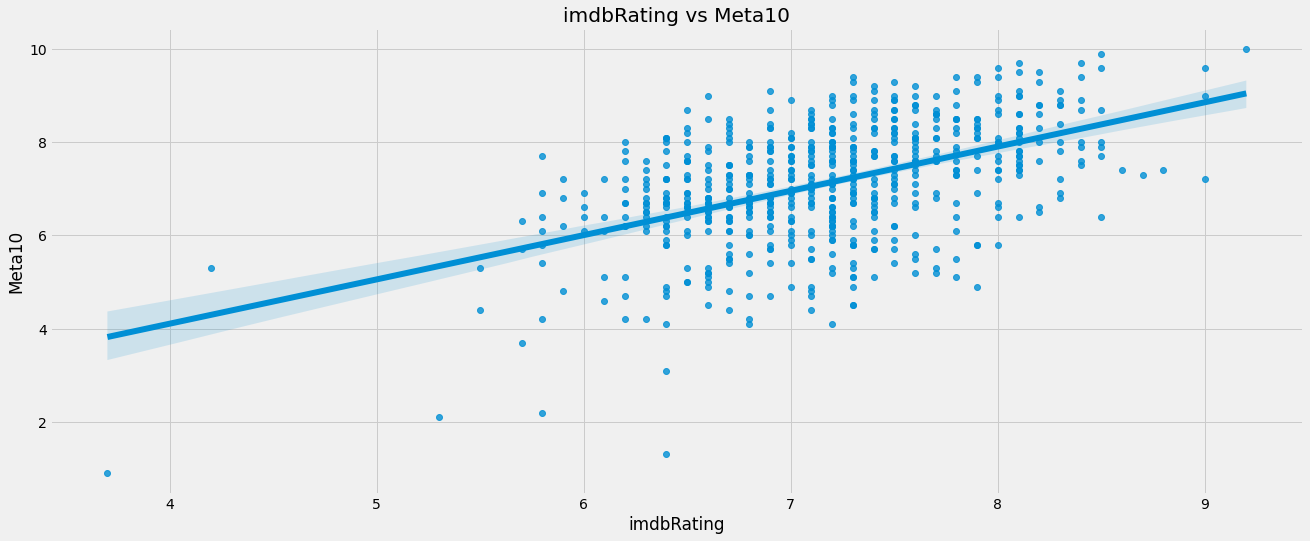

In [194]:
# Relationship between variables (all data)
xx = df_metaimdb.imdbRating
yy = df_metaimdb.Meta10

# https://stackoverflow.com/questions/19068862/how-to-overplot-a-line-on-a-scatter-plot-in-python
plt.figure(figsize=(20, 8))
plt.title('imdbRating vs Meta10')
sns.regplot(x=xx, y=yy); 

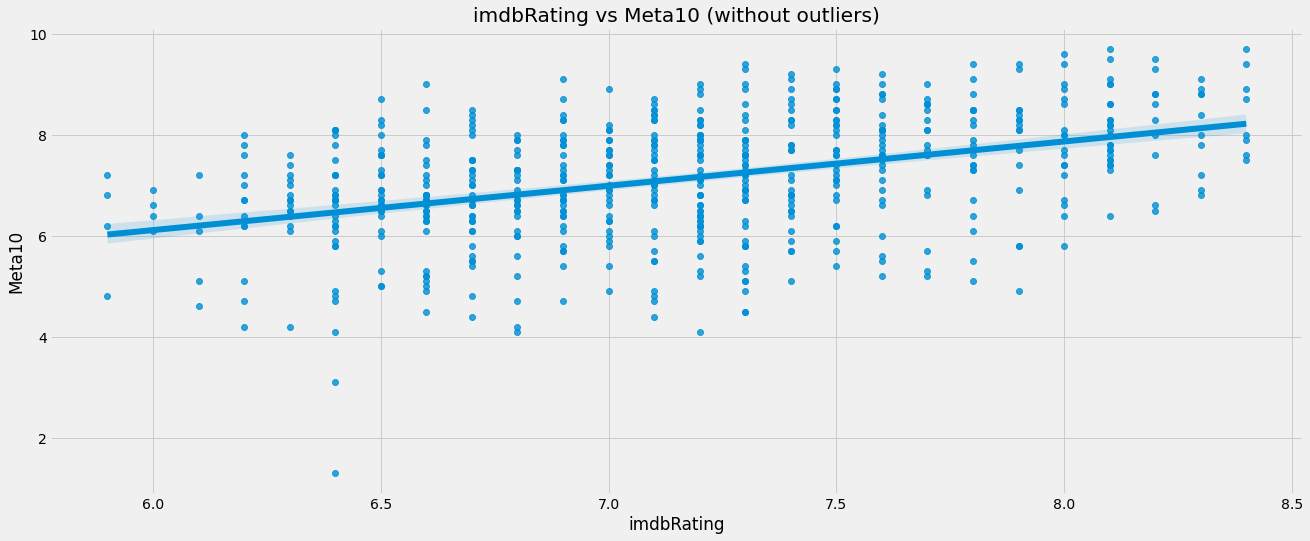

In [195]:
# Without outliers
df_metaimdb_noout = df_metaimdb[np.abs(df_metaimdb.imdbRating - df_metaimdb.imdbRating.mean()) 
                                <= (2*df_metaimdb.imdbRating.std())] # 2 std

xx = df_metaimdb_noout.imdbRating
yy = df_metaimdb_noout.Meta10

# https://stackoverflow.com/questions/19068862/how-to-overplot-a-line-on-a-scatter-plot-in-python
plt.figure(figsize=(20, 8))
plt.title('imdbRating vs Meta10 (without outliers)')

sns.regplot(x=xx, y=yy); 

In [196]:
# better Metascore than imdbRating
print('Movies with better Metascore than imdbRating: ' + str(len(df_metaimdb[df_metaimdb.imdbMeta < 0])))

Movies with better Metascore than imdbRating: 322


In [197]:
# Movies with better Metascore than imdbRating
df_metaimdb[df_metaimdb.imdbMeta < 0].nsmallest(N, 'imdbMeta', keep='all')

Title  Year  \
444            The Swerve  2018   
239  The Duke of Burgundy  2014   
327                  Time  2020   
228                 Carol  2015   
291             Nomadland  2020   
357             High Life  2018   
500      The Green Knight  2021   
660  The Power of the Dog  2021   
198       Drag Me to Hell  2009   
375   Inside Llewyn Davis  2013   

                                                 Genre  imdbRating  Meta10  \
444                                              Drama         6.6     9.0   
239                                     Drama, Romance         6.5     8.7   
327                             Documentary, Biography         6.9     9.1   
228                                     Drama, Romance         7.3     9.4   
291                                              Drama         7.3     9.3   
357  Adventure, Drama, Horror, Mystery, Sci-Fi, Thr...         5.8     7.7   
500                          Adventure, Drama, Fantasy         6.6     8.5   
660                            Drama, Romance, Western         7.0     8.9   
198                                             Horror         6.5     8.3   
375                               Comedy, Drama, Music         7.5     9.3   

     imdbMeta  
444      -2.4  
239      -2.2  
327      -2.2  
228      -2.1  
291      -2.0  
357      -1.9  
500      -1.9  
660      -1.9  
198      -1.8  
375      -1.8

In [198]:
# negative imdbRating and positive Metascore 
print('Movies with negative imdbRating and positive Metascore: ' + str(len(df_metaimdb[df_metaimdb.imdbRating < 5][df_metaimdb.Meta10 > 5])))

Movies with negative imdbRating and positive Metascore: 1


In [199]:
# better imdbRating than Metascore
print('Movies with better imdbRating than Metascore: ' + str(len(df_metaimdb[df_metaimdb.imdbMeta > 0])))

Movies with better imdbRating than Metascore: 282


In [200]:
# Movies with better imdbRating than Metascore
df_metaimdb[df_metaimdb.imdbMeta > 0].nlargest(N, 'imdbMeta', keep='all')

Title  Year  \
483                 Run Hide Fight  2020   
401   The Babysitter: Killer Queen  2020   
182             Charlie Countryman  2013   
39                        Geostorm  2017   
658               The Unforgivable  2021   
360              Bohemian Rhapsody  2018   
63                        The Room  2003   
120  Twin Peaks: Fire Walk with Me  1992   
699        Ghostbusters: Afterlife  2021   
187                  The Gentlemen  2019   
315                           Stay  2005   

                                        Genre  imdbRating  Meta10  imdbMeta  
483                    Crime, Drama, Thriller         6.4     1.3       5.1  
401                            Comedy, Horror         5.8     2.2       3.6  
182  Action, Comedy, Drama, Romance, Thriller         6.4     3.1       3.3  
39                   Action, Sci-Fi, Thriller         5.3     2.1       3.2  
658                              Crime, Drama         7.2     4.1       3.1  
360                   Biography, Drama, Music         7.9     4.9       3.0  
63                                      Drama         3.7     0.9       2.8  
120          Drama, Horror, Mystery, Thriller         7.3     4.5       2.8  
699        Adventure, Comedy, Fantasy, Sci-Fi         7.3     4.5       2.8  
187                     Action, Comedy, Crime         7.8     5.1       2.7  
315                  Drama, Mystery, Thriller         6.8     4.1       2.7

In [201]:
# positive imdbRating and negative Metascore 
print('Movies with positive imdbRating and negative Metascore: ' + str(len(df_metaimdb[df_metaimdb.imdbRating > 5][df_metaimdb.Meta10 < 5])))

Movies with positive imdbRating and negative Metascore: 34


In [202]:
# Movies with positive imdbRating and negative Metascore
df_metaimdb[df_metaimdb.imdbRating > 5][df_metaimdb.Meta10 < 5].nlargest(N, 'imdbMeta', keep='all')

Title  Year  \
483                 Run Hide Fight  2020   
401   The Babysitter: Killer Queen  2020   
182             Charlie Countryman  2013   
39                        Geostorm  2017   
658               The Unforgivable  2021   
360              Bohemian Rhapsody  2018   
120  Twin Peaks: Fire Walk with Me  1992   
699        Ghostbusters: Afterlife  2021   
315                           Stay  2005   
8                       The Jacket  2005   

                                         Genre  imdbRating  Meta10  imdbMeta  
483                     Crime, Drama, Thriller         6.4     1.3       5.1  
401                             Comedy, Horror         5.8     2.2       3.6  
182   Action, Comedy, Drama, Romance, Thriller         6.4     3.1       3.3  
39                    Action, Sci-Fi, Thriller         5.3     2.1       3.2  
658                               Crime, Drama         7.2     4.1       3.1  
360                    Biography, Drama, Music         7.9     4.9       3.0  
120           Drama, Horror, Mystery, Thriller         7.3     4.5       2.8  
699         Adventure, Comedy, Fantasy, Sci-Fi         7.3     4.5       2.8  
315                   Drama, Mystery, Thriller         6.8     4.1       2.7  
8    Drama, Fantasy, Mystery, Sci-Fi, Thriller         7.1     4.4       2.7

In [203]:
# Matching rating
print('Movies with matching rating: ' + str(len(df_metaimdb[df_metaimdb.imdbMeta == 0])))

Movies with matching rating: 28


In [204]:
# Movies with matching rating (imdbRating = Meta10)
df_metaimdb[df_metaimdb.imdbMeta == 0]

Title  Year  \
6                   Exotica  1994   
40                  Bronson  2008   
98           Ford v Ferrari  2019   
111               Tigertail  2020   
148               Honey Boy  2019   
195                 Swallow  2019   
221            Fright Night  2011   
229                     Una  2016   
237    The Snowtown Murders  2011   
238     Journey to the West  2013   
268               Black Box  2020   
288          Corpus Christi  2019   
310                     Run  2020   
421        Army of the Dead  2021   
428  The Godfather: Part II  1974   
437          Public Enemies  2009   
467              Inside Man  2006   
468             Black Widow  2021   
488       The Suicide Squad  2021   
506      Young Frankenstein  1974   
509         Valhalla Rising  2009   
553    The Royal Tenenbaums  2001   
596               Idiocracy  2006   
643                eXistenZ  1999   
647                   Drive  2011   
694             The Martian  2015   
710    The Greasy Strangler  2016   
725            King Richard  2021   

                                           Genre  imdbRating  Meta10  imdbMeta  
6                                          Drama         7.1     7.1       0.0  
40               Action, Biography, Crime, Drama         7.1     7.1       0.0  
98               Action, Biography, Drama, Sport         8.1     8.1       0.0  
111                                        Drama         6.5     6.5       0.0  
148                                        Drama         7.3     7.3       0.0  
195                     Drama, Mystery, Thriller         6.5     6.5       0.0  
221                               Comedy, Horror         6.4     6.4       0.0  
229                                        Drama         6.2     6.2       0.0  
237                      Biography, Crime, Drama         6.6     6.6       0.0  
238  Action, Adventure, Comedy, Fantasy, Romance         6.8     6.8       0.0  
268            Horror, Mystery, Sci-Fi, Thriller         6.2     6.2       0.0  
288                                        Drama         7.7     7.7       0.0  
310                            Mystery, Thriller         6.7     6.7       0.0  
421      Action, Crime, Horror, Sci-Fi, Thriller         5.7     5.7       0.0  
428                                 Crime, Drama         9.0     9.0       0.0  
437     Action, Biography, Crime, Drama, History         7.0     7.0       0.0  
467              Crime, Drama, Mystery, Thriller         7.6     7.6       0.0  
468                    Action, Adventure, Sci-Fi         6.7     6.7       0.0  
488            Action, Adventure, Comedy, Sci-Fi         7.2     7.2       0.0  
506                                       Comedy         8.0     8.0       0.0  
509            Action, Adventure, Drama, Fantasy         6.1     6.1       0.0  
553                                Comedy, Drama         7.6     7.6       0.0  
596          Adventure, Comedy, Sci-Fi, Thriller         6.6     6.6       0.0  
643            Horror, Mystery, Sci-Fi, Thriller         6.8     6.8       0.0  
647                                Action, Drama         7.8     7.8       0.0  
694                     Adventure, Drama, Sci-Fi         8.0     8.0       0.0  
710                               Comedy, Horror         5.8     5.8       0.0  
725                      Biography, Drama, Sport         7.6     7.6       0.0

In [205]:
# Movies with most balanced reviews (minor difference between imdb and metascore rating, considering movies with a rating over the 75th quantile)
df_best_movies = df_metaimdb[abs(df_metaimdb.imdbMeta) < 1][df_metaimdb.imdbRating > df_metaimdb.imdbRating.quantile(0.75)]
df_best_movies.imdbMeta = abs(df_best_movies.imdbMeta).round(1)

show_all(df_best_movies.nsmallest(N, 'imdbMeta', keep='all').sort_values(['imdbRating','imdbMeta'], ascending=False))

In [206]:
# Top movies by total rating (imdbRating + *Metascore)
df_metaimdb['Rate20'] = df_metaimdb['imdbRating'] + df_metaimdb['Meta10']

df_metaimdb[df_metaimdb.Rate20 > df_metaimdb.Rate20.quantile(0.75)].nlargest(N, 'Rate20', keep='all')

Title  Year  \
119                                      The Godfather  1972   
613                                       12 Angry Men  1957   
676                                        City Lights  1931   
542  Dr. Strangelove or: How I Learned to Stop Worr...  1964   
680                                       Modern Times  1936   
428                             The Godfather: Part II  1974   
582                                     Apocalypse Now  1979   
681                                      The Third Man  1949   
350                                            Virunga  2014   
287                         Portrait of a Lady on Fire  2019   
493                                    Rosemary's Baby  1968   

                              Genre  imdbRating  Meta10  imdbMeta  Rate20  
119                    Crime, Drama         9.2    10.0      -0.8    19.2  
613                    Crime, Drama         9.0     9.6      -0.6    18.6  
676          Comedy, Drama, Romance         8.5     9.9      -1.4    18.4  
542                     Comedy, War         8.4     9.7      -1.3    18.1  
680  Comedy, Drama, Family, Romance         8.5     9.6      -1.1    18.1  
428                    Crime, Drama         9.0     9.0       0.0    18.0  
582             Drama, Mystery, War         8.4     9.4      -1.0    17.8  
681    Film-Noir, Mystery, Thriller         8.1     9.7      -1.6    17.8  
350                Documentary, War         8.2     9.5      -1.3    17.7  
287                  Drama, Romance         8.1     9.5      -1.4    17.6  
493                   Drama, Horror         8.0     9.6      -1.6    17.6

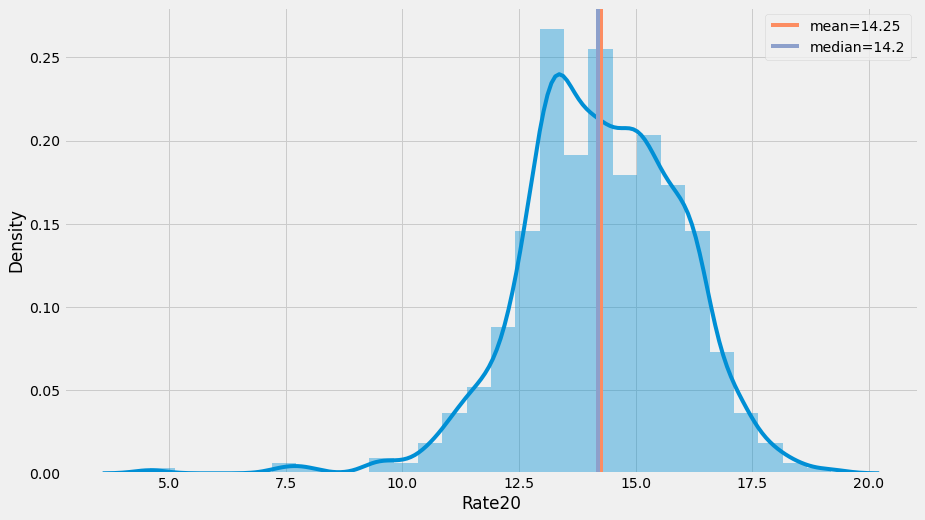

In [207]:
# Plot Rate20
plt.figure(figsize=(30,8))

x20 = df_metaimdb.Rate20
plt.subplot(1,2,1)
ax1 = sns.distplot(x20, kde_kws=dict(bw=0.2))
ax1.axvline(x=x20.mean(), c=sns.color_palette("Set2")[1], label=f"mean={round(x20.mean(), 2)}")
ax1.axvline(x=x20.median(), c=sns.color_palette("Set2")[2], label=f"median={round(x20.median(), 2)}")
plt.legend();

### Weighted average rating

In [208]:
# https://www.datacamp.com/community/tutorials/recommender-systems-python

# WeightedRating (WR) = (v/v+m * R) + (m/v+m * C)

# v is the number of votes for the movie;
# m is the minimum votes required to be listed in the chart;
# R is the average rating of the movie;
# C is the mean vote across the whole report.

In [209]:
df.shape

(719, 25)

In [210]:
df.imdbVotes.describe()

count    7.190000e+02
mean     1.306346e+05
std      2.201962e+05
min      8.600000e+01
25%      1.582100e+04
50%      5.530300e+04
75%      1.528845e+05
max      2.220922e+06
Name: imdbVotes, dtype: float64

In [211]:
# Calculate mean of imdbRating column
C = df.imdbRating.mean()
print(C)

# Calculate the minimum number of votes required to be in the chart, m
m = df.imdbVotes.quantile(0.25).astype(int) # 50th percentile
print(m)

7.14895688456189
15821


In [212]:
# Filter out all qualified movies into a new DataFrame
q_movies = df.copy().loc[df['imdbVotes'] > m]
q_movies.shape

(538, 25)

In [213]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
#q_movies['Score'] = q_movies.apply(weighted_rating(q_movies, m, C), axis=1)
v = q_movies['imdbVotes']
R = q_movies['imdbRating']
q_movies['Score'] = weighted_rating(v, R, m, C)

#Print the top n movies based on score
cols = ['Title', 'Year', 'imdbVotes', 'imdbRating', 'Score']
q_movies[cols].nlargest(N, 'Score', keep='all')

Title  Year  imdbVotes  imdbRating     Score
119           The Godfather  1972    1739464         9.2  9.181077
428  The Godfather: Part II  1974    1206908         9.0  8.976548
613            12 Angry Men  1957     746161         9.0  8.961133
159               Inception  2010    2220922         8.8  8.788756
620              The Matrix  1999    1822260         8.7  8.687116
665            Interstellar  2014    1673048         8.6  8.586437
657      Back to the Future  1985    1136980         8.5  8.481346
603  Léon: The Professional  1994    1104488         8.5  8.480963
109      The Usual Suspects  1995    1044969         8.5  8.480228
143         Cinema Paradiso  1988     250078         8.5  8.419250

In [214]:
# Without weighted average
cols = ['Title', 'Year', 'imdbVotes', 'imdbRating']
df[cols].nlargest(N, 'imdbRating', keep='all')

Title  Year  imdbVotes  imdbRating
119                             The Godfather  1972    1739464         9.2
186  David Attenborough: A Life on Our Planet  2020      30373         9.0
428                    The Godfather: Part II  1974    1206908         9.0
613                              12 Angry Men  1957     746161         9.0
159                                 Inception  2010    2220922         8.8
620                                The Matrix  1999    1822260         8.7
665                              Interstellar  2014    1673048         8.6
73                                      Senna  2010      68893         8.5
109                        The Usual Suspects  1995    1044969         8.5
143                           Cinema Paradiso  1988     250078         8.5
414                           Untamed Romania  2018       1729         8.5
603                    Léon: The Professional  1994    1104488         8.5
657                        Back to the Future  1985    1136980         8.5
676                               City Lights  1931     178803         8.5
680                              Modern Times  1936     232868         8.5

## Votes

In [215]:
df.imdbVotes.describe()

count    7.190000e+02
mean     1.306346e+05
std      2.201962e+05
min      8.600000e+01
25%      1.582100e+04
50%      5.530300e+04
75%      1.528845e+05
max      2.220922e+06
Name: imdbVotes, dtype: float64

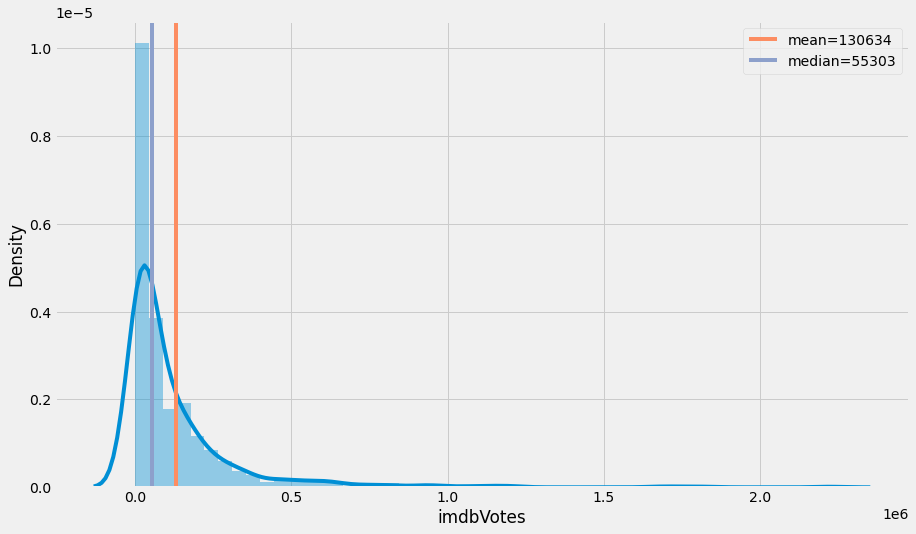

In [216]:
# Plot imdbVotes
plt.figure(figsize=(30,8))

xvotes = df.imdbVotes
plt.subplot(1,2,1)
ax1 = sns.distplot(xvotes, kde_kws=dict(bw=0.2))
ax1.axvline(x=xvotes.mean(), c=sns.color_palette("Set2")[1], label=f"mean={int(xvotes.mean())}")
ax1.axvline(x=xvotes.median(), c=sns.color_palette("Set2")[2], label=f"median={int(xvotes.median())}")
plt.legend();

In [217]:
# https://en.wikipedia.org/wiki/Kurtosis
# Kurtosis is a measure of the "tailedness" of the probability distribution of a real-valued random variable. 
df.imdbVotes.kurtosis()

26.178686607676298

## Production

In [218]:
# Number of production companies
len(counter_display(df, 'Production', 'Title', None).index)

2100

In [219]:
# List of production companies with most movies
counter_display(df, 'Production', 'Title', N)

Title
Canal+                 36
Warner Bros.           30
Netflix                28
Columbia Pictures      20
TSG Entertainment      20
Paramount Pictures     20
Film4                  19
Film i Väst            17
Arte France Cinéma     16
StudioCanal            16

In [220]:
# Production / ratings
df_production_rating = get_mean_value(df, 'Production', 'imdbRating')

In [221]:
# Top producton companies 
show_all(df_production_rating.nlargest(N, 'Total', keep='all'))

In [222]:
# Production compnaies with highest imdbRating average
show_all(df_production_rating[df_production_rating.Total > 2].nlargest(N, 'imdbRating', keep='all'))

In [223]:
# Search by production company
prod_company = 'A24' #'Canal+'
show_all(pd.DataFrame(df_production_rating.loc[prod_company]).T)

## Box Office

In [224]:
# NOT INCLUDED IN THE DATASET